In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [42]:
data =np.array([["Romanos_1", "'paul', ',', 'servant', 'jesus', 'christ', ',', 'called', 'apostle', ',', 'separated', 'gospel', 'god', ',', '(', 'promised', 'prophets', 'holy', 'scriptures', ',', ')', 'concerning', 'son', 'jesus', 'christ', 'lord', ',', 'made', 'seed', 'david', 'according', 'flesh', ';', 'declared', 'son', 'god', 'power', ',', 'according', 'spirit', 'holiness', ',', 'resurrection', 'dead', ':', 'received', 'grace', 'apostleship', ',', 'obedience', 'faith', 'among', 'nations', ',', 'name', ':', 'among', 'also', 'called', 'jesus', 'christ', ':', 'rome', ',', 'beloved', 'god', ',', 'called', 'saints', ':', 'grace', 'peace', 'god', 'father', ',', 'lord', 'jesus', 'christ.first', ',', 'thank', 'god', 'jesus', 'christ', ',', 'faith', 'spoken', 'throughout', 'whole', 'world.for', 'god', 'witness', ',', 'serve', 'spirit', 'gospel', 'son', ',', 'without', 'ceasing', 'make', 'mention', 'always', 'prayers', ';', 'making', 'request', ',', 'means', 'length', 'might', 'prosperous', 'journey', 'god', 'come', 'you.for', 'long', 'see', ',', 'may', 'impart', 'spiritual', 'gift', ',', 'end', 'may', 'established', ';', ',', 'may', 'comforted', 'together', 'mutual', 'faith', 'me.now', 'would', 'ignorant', ',', 'brothers', ',', 'oftentimes', 'purposed', 'come', ',', '(', 'let', 'till', ',', ')', 'might', 'fruit', 'among', 'also', ',', 'even', 'among', 'gentiles.i', 'debtor', 'greeks', ',', 'barbarians', ';', 'wise', ',', 'unwise.so', ',', 'much', ',', 'ready', 'preach', 'gospel', 'rome', 'also.for', 'ashamed', 'gospel', 'christ', ':', 'power', 'god', 'salvation', 'every', 'one', 'believes', ';', 'jew', 'first', ',', 'also', 'greek.for', 'therein', 'righteousness', 'god', 'revealed', 'faith', 'faith', ':', 'written', ',', 'shall', 'live', 'faith.for', 'wrath', 'god', 'revealed', 'heaven', 'ungodliness', 'unrighteousness', 'men', ',', 'hold', 'truth', 'unrighteousness', ';', 'may', 'known', 'god', 'manifest', ';', 'god', 'showed', 'them.for', 'invisible', 'things', 'creation', 'world', 'clearly', 'seen', ',', 'understood', 'things', 'made', ',', 'even', 'eternal', 'power', 'godhead', ';', 'without', 'excuse', ':', ',', 'knew', 'god', ',', 'glorified', 'god', ',', 'neither', 'thankful', ';', 'became', 'vain', 'imaginations', ',', 'foolish', 'heart', 'darkened.professing', 'wise', ',', 'became', 'fools', ',', 'changed', 'glory', 'incorruptible', 'god', 'image', 'made', 'like', 'corruptible', 'man', ',', 'birds', ',', 'four', 'footed', 'beasts', ',', 'creeping', 'things.why', 'god', 'also', 'gave', 'uncleanness', 'lusts', 'hearts', ',', 'dishonor', 'bodies', ':', 'changed', 'truth', 'god', 'lie', ',', 'worshipped', 'served', 'creature', 'creator', ',', 'blessed', 'ever', '.', 'amen.for', 'cause', 'god', 'gave', 'vile', 'affections', ':', 'even', 'women', 'change', 'natural', 'use', 'nature', ':', 'likewise', 'also', 'men', ',', 'leaving', 'natural', 'use', 'woman', ',', 'burned', 'lust', 'one', 'toward', 'another', ';', 'men', 'men', 'working', 'unseemly', ',', 'receiving', 'recompense', 'error', 'meet.and', 'even', 'like', 'retain', 'god', 'knowledge', ',', 'god', 'gave', 'reprobate', 'mind', ',', 'things', 'convenient', ';', 'filled', 'unrighteousness', ',', 'fornication', ',', 'wickedness', ',', 'covetousness', ',', 'maliciousness', ';', 'full', 'envy', ',', 'murder', ',', 'debate', ',', 'deceit', ',', 'malignity', ';', 'whisperers', ',', 'backbiters', ',', 'haters', 'god', ',', 'despiteful', ',', 'proud', ',', 'boasters', ',', 'inventors', 'evil', 'things', ',', 'disobedient', 'parents', ',', 'without', 'understanding', ',', 'covenant', 'breakers', ',', 'without', 'natural', 'affection', ',', 'implacable', ',', 'unmerciful', ':', 'knowing', 'judgment', 'god', ',', 'commit', 'things', 'worthy', 'death', ',', ',', 'pleasure', '.'"],
               ["Romanos_2", "'therefore', 'inexcusable', ',', 'man', ',', 'whoever', 'judge', ':', 'wherein', 'judge', 'another', ',', 'condemn', ';', 'judge', 'things.but', 'sure', 'judgment', 'god', 'according', 'truth', 'commit', 'things.and', 'think', ',', 'man', ',', 'judge', 'things', ',', ',', 'shall', 'escape', 'judgment', 'god', '?', 'despise', 'riches', 'goodness', 'forbearance', 'long-suffering', ';', 'knowing', 'goodness', 'god', 'leads', 'repentance', '?', 'hardness', 'impenitent', 'heart', 'treasure', 'wrath', 'day', 'wrath', 'revelation', 'righteous', 'judgment', 'god', ';', 'render', 'every', 'man', 'according', 'deeds', ':', 'patient', 'continuance', 'well', 'seek', 'glory', 'honor', 'immortality', ',', 'eternal', 'life', ':', 'contentious', ',', 'obey', 'truth', ',', 'obey', 'unrighteousness', ',', 'indignation', 'wrath', ',', 'tribulation', 'anguish', ',', 'every', 'soul', 'man', 'evil', ',', 'jew', 'first', ',', 'also', 'gentile', ';', 'glory', ',', 'honor', ',', 'peace', ',', 'every', 'man', 'works', 'good', ',', 'jew', 'first', ',', 'also', 'gentile', ':', 'respect', 'persons', 'god.for', 'many', 'sinned', 'without', 'law', 'shall', 'also', 'perish', 'without', 'law', ':', 'many', 'sinned', 'law', 'shall', 'judged', 'law', ';', '(', 'hearers', 'law', 'god', ',', 'doers', 'law', 'shall', 'justified.for', 'gentiles', ',', 'law', ',', 'nature', 'things', 'contained', 'law', ',', ',', 'law', ',', 'law', ':', 'show', 'work', 'law', 'written', 'hearts', ',', 'conscience', 'also', 'bearing', 'witness', ',', 'thoughts', 'mean', 'accusing', 'else', 'excusing', 'one', 'another', ';', ')', 'day', 'god', 'shall', 'judge', 'secrets', 'men', 'jesus', 'christ', 'according', 'gospel.behold', ',', 'called', 'jew', ',', 'rest', 'law', ',', 'make', 'boast', 'god', ',', 'know', ',', 'approve', 'things', 'excellent', ',', 'instructed', 'law', ';', 'confident', 'guide', 'blind', ',', 'light', 'darkness', ',', 'instructor', 'foolish', ',', 'teacher', 'babes', ',', 'form', 'knowledge', 'truth', 'law.you', 'therefore', 'teach', 'another', ',', 'teach', '?', 'preach', 'man', 'steal', ',', 'steal', '?', 'say', 'man', 'commit', 'adultery', ',', 'commit', 'adultery', '?', 'abhor', 'idols', ',', 'commit', 'sacrilege', '?', 'make', 'boast', 'law', ',', 'breaking', 'law', 'dishonor', 'god', '?', 'name', 'god', 'blasphemed', 'among', 'gentiles', ',', 'written.for', 'circumcision', 'truly', 'profits', ',', 'keep', 'law', ':', 'breaker', 'law', ',', 'circumcision', 'made', 'uncircumcision.therefore', 'uncircumcision', 'keep', 'righteousness', 'law', ',', 'shall', 'uncircumcision', 'counted', 'circumcision', '?', 'shall', 'uncircumcision', 'nature', ',', 'fulfill', 'law', ',', 'judge', ',', 'letter', 'circumcision', 'transgress', 'law', '?', 'jew', ',', 'one', 'outwardly', ';', 'neither', 'circumcision', ',', 'outward', 'flesh', ':', 'jew', ',', 'one', 'inwardly', ';', 'circumcision', 'heart', ',', 'spirit', ',', 'letter', ';', 'whose', 'praise', 'men', ',', 'god', '.'"],
               ["Romanos_3", "'advantage', 'jew', '?', 'profit', 'circumcision', '?', 'much', 'every', 'way', ':', 'chiefly', ',', 'committed', 'oracles', 'god.for', 'believe', '?', 'shall', 'unbelief', 'make', 'faith', 'god', 'without', 'effect', '?', 'god', 'forbid', ':', 'yes', ',', 'let', 'god', 'true', ',', 'every', 'man', 'liar', ';', 'written', ',', 'might', 'justified', 'sayings', ',', 'might', 'overcome', 'judged.but', 'unrighteousness', 'commend', 'righteousness', 'god', ',', 'shall', 'say', '?', 'god', 'unrighteous', 'takes', 'vengeance', '?', '(', 'speak', 'man', ')', 'god', 'forbid', ':', 'shall', 'god', 'judge', 'world', '?', 'truth', 'god', 'abounded', 'lie', 'glory', ';', 'yet', 'also', 'judged', 'sinner', '?', 'rather', ',', '(', 'slanderously', 'reported', ',', 'affirm', 'say', ',', ')', 'let', 'us', 'evil', ',', 'good', 'may', 'come', '?', 'whose', 'damnation', 'just.what', '?', 'better', '?', ',', 'wise', ':', 'proved', 'jews', 'gentiles', ',', 'sin', ';', 'written', ',', 'none', 'righteous', ',', ',', 'one', ':', 'none', 'understands', ',', 'none', 'seeks', 'god.they', 'gone', 'way', ',', 'together', 'become', 'unprofitable', ';', 'none', 'good', ',', ',', 'one.their', 'throat', 'open', 'sepulcher', ';', 'tongues', 'used', 'deceit', ';', 'poison', 'asps', 'lips', ':', 'whose', 'mouth', 'full', 'cursing', 'bitterness', ':', 'feet', 'swift', 'shed', 'blood', ':', 'destruction', 'misery', 'ways', ':', 'way', 'peace', 'known', ':', 'fear', 'god', 'eyes.now', 'know', 'things', 'soever', 'law', 'said', ',', 'said', 'law', ':', 'every', 'mouth', 'may', 'stopped', ',', 'world', 'may', 'become', 'guilty', 'god.therefore', 'deeds', 'law', 'shall', 'flesh', 'justified', 'sight', ':', 'law', 'knowledge', 'sin.but', 'righteousness', 'god', 'without', 'law', 'manifested', ',', 'witnessed', 'law', 'prophets', ';', 'even', 'righteousness', 'god', 'faith', 'jesus', 'christ', 'believe', ':', 'difference', ':', 'sinned', ',', 'come', 'short', 'glory', 'god', ';', 'justified', 'freely', 'grace', 'redemption', 'christ', 'jesus', ':', 'god', 'set', 'forth', 'propitiation', 'faith', 'blood', ',', 'declare', 'righteousness', 'remission', 'sins', 'past', ',', 'forbearance', 'god', ';', 'declare', ',', 'say', ',', 'time', 'righteousness', ':', 'might', ',', 'justifier', 'believes', 'jesus.where', 'boasting', '?', 'excluded', '.', 'law', '?', 'works', '?', ':', 'law', 'faith.therefore', 'conclude', 'man', 'justified', 'faith', 'without', 'deeds', 'law.is', 'god', 'jews', '?', 'also', 'gentiles', '?', 'yes', ',', 'gentiles', 'also', ':', 'seeing', 'one', 'god', ',', 'shall', 'justify', 'circumcision', 'faith', ',', 'uncircumcision', 'faith.do', 'make', 'void', 'law', 'faith', '?', 'god', 'forbid', ':', 'yes', ',', 'establish', 'law', '.'"],
               ["Romanos_4", "'shall', 'say', 'abraham', 'father', ',', 'pertaining', 'flesh', ',', 'found', '?', 'abraham', 'justified', 'works', ',', 'whereof', 'glory', ';', 'god.for', 'said', 'scripture', '?', 'abraham', 'believed', 'god', ',', 'counted', 'righteousness.now', 'works', 'reward', 'reckoned', 'grace', ',', 'debt.but', 'works', ',', 'believes', 'justifies', 'ungodly', ',', 'faith', 'counted', 'righteousness.even', 'david', 'also', 'describes', 'blessedness', 'man', ',', 'god', 'imputes', 'righteousness', 'without', 'works', ',', 'saying', ',', 'blessed', 'whose', 'iniquities', 'forgiven', ',', 'whose', 'sins', 'covered.blessed', 'man', 'lord', 'impute', 'sin.comes', 'blessedness', 'circumcision', ',', 'uncircumcision', 'also', '?', 'say', 'faith', 'reckoned', 'abraham', 'righteousness.how', 'reckoned', '?', 'circumcision', ',', 'uncircumcision', '?', 'circumcision', ',', 'uncircumcision.and', 'received', 'sign', 'circumcision', ',', 'seal', 'righteousness', 'faith', 'yet', 'uncircumcised', ':', 'might', 'father', 'believe', ',', 'though', 'circumcised', ';', 'righteousness', 'might', 'imputed', 'also', ':', 'father', 'circumcision', 'circumcision', ',', 'also', 'walk', 'steps', 'faith', 'father', 'abraham', ',', 'yet', 'uncircumcised.for', 'promise', ',', 'heir', 'world', ',', 'abraham', ',', 'seed', ',', 'law', ',', 'righteousness', 'faith.for', 'law', 'heirs', ',', 'faith', 'made', 'void', ',', 'promise', 'made', 'none', 'effect', ':', 'law', 'works', 'wrath', ':', 'law', ',', 'transgression.therefore', 'faith', ',', 'might', 'grace', ';', 'end', 'promise', 'might', 'sure', 'seed', ';', 'law', ',', 'also', 'faith', 'abraham', ';', 'father', 'us', ',', '(', 'written', ',', 'made', 'father', 'many', 'nations', ',', ')', 'believed', ',', 'even', 'god', ',', 'vivifies', 'dead', ',', 'calls', 'things', 'though', 'were.who', 'hope', 'believed', 'hope', ',', 'might', 'become', 'father', 'many', 'nations', ',', 'according', 'spoken', ',', 'shall', 'seed', 'be.and', 'weak', 'faith', ',', 'considered', 'body', 'dead', ',', 'hundred', 'years', 'old', ',', 'neither', 'yet', 'deadness', 'sarah', ', 'womb', ':', 'staggered', 'promise', 'god', 'unbelief', ';', 'strong', 'faith', ',', 'giving', 'glory', 'god', ';', 'fully', 'persuaded', ',', 'promised', ',', 'able', 'also', 'perform.and', 'therefore', 'imputed', 'righteousness.now', 'written', 'sake', 'alone', ',', 'imputed', ';', 'us', 'also', ',', 'shall', 'imputed', ',', 'believe', 'raised', 'jesus', 'lord', 'dead', ';', 'delivered', 'offenses', ',', 'raised', 'justification', '.'"],
               ["Romanos_5", "'therefore', 'justified', 'faith', ',', 'peace', 'god', 'lord', 'jesus', 'christ', ':', 'also', 'access', 'faith', 'grace', 'wherein', 'stand', ',', 'rejoice', 'hope', 'glory', 'god.and', ',', 'glory', 'tribulations', 'also', ':', 'knowing', 'tribulation', 'works', 'patience', ';', 'patience', ',', 'experience', ';', 'experience', ',', 'hope', ':', 'hope', 'makes', 'ashamed', ';', 'love', 'god', 'shed', 'abroad', 'hearts', 'holy', 'ghost', 'given', 'us.for', 'yet', 'without', 'strength', ',', 'due', 'time', 'christ', 'died', 'ungodly.for', 'scarcely', 'righteous', 'man', 'one', 'die', ':', 'yet', 'peradventure', 'good', 'man', 'would', 'even', 'dare', 'die.but', 'god', 'commends', 'love', 'toward', 'us', ',', ',', 'yet', 'sinners', ',', 'christ', 'died', 'us.much', ',', 'justified', 'blood', ',', 'shall', 'saved', 'wrath', 'him.for', ',', 'enemies', ',', 'reconciled', 'god', 'death', 'son', ',', 'much', ',', 'reconciled', ',', 'shall', 'saved', 'life.and', ',', 'also', 'joy', 'god', 'lord', 'jesus', 'christ', ',', 'received', 'atonement.why', ',', 'one', 'man', 'sin', 'entered', 'world', ',', 'death', 'sin', ';', 'death', 'passed', 'men', ',', 'sinned', ':', '(', 'law', 'sin', 'world', ':', 'sin', 'imputed', 'law.nevertheless', 'death', 'reigned', 'adam', 'moses', ',', 'even', 'sinned', 'similitude', 'adam', ', 'transgression', ',', 'figure', 'come.but', 'offense', ',', 'also', 'free', 'gift', '.', 'offense', 'one', 'many', 'dead', ',', 'much', 'grace', 'god', ',', 'gift', 'grace', ',', 'one', 'man', ',', 'jesus', 'christ', ',', 'abounded', 'many.and', 'one', 'sinned', ',', 'gift', ':', 'judgment', 'one', 'condemnation', ',', 'free', 'gift', 'many', 'offenses', 'justification.for', 'one', 'man', ', 'offense', 'death', 'reigned', 'one', ';', 'much', 'receive', 'abundance', 'grace', 'gift', 'righteousness', 'shall', 'reign', 'life', 'one', ',', 'jesus', 'christ', '.', ')', 'therefore', 'offense', 'one', 'judgment', 'came', 'men', 'condemnation', ';', 'even', 'righteousness', 'one', 'free', 'gift', 'came', 'men', 'justification', 'life.for', 'one', 'man', ', 'disobedience', 'many', 'made', 'sinners', ',', 'obedience', 'one', 'shall', 'many', 'made', 'righteous.moreover', 'law', 'entered', ',', 'offense', 'might', 'abound', '.', 'sin', 'abounded', ',', 'grace', 'much', 'abound', ':', 'sin', 'reigned', 'death', ',', 'even', 'might', 'grace', 'reign', 'righteousness', 'eternal', 'life', 'jesus', 'christ', 'lord', '.'"],
               ["Romanos_6", "'shall', 'say', '?', 'shall', 'continue', 'sin', ',', 'grace', 'may', 'abound', '?', 'god', 'forbid', '.', 'shall', ',', 'dead', 'sin', ',', 'live', 'longer', 'therein', '?', 'know', ',', 'many', 'us', 'baptized', 'jesus', 'christ', 'baptized', 'death', '?', 'therefore', 'buried', 'baptism', 'death', ':', 'like', 'christ', 'raised', 'dead', 'glory', 'father', ',', 'even', 'also', 'walk', 'newness', 'life.for', 'planted', 'together', 'likeness', 'death', ',', 'shall', 'also', 'likeness', 'resurrection', ':', 'knowing', ',', 'old', 'man', 'crucified', ',', 'body', 'sin', 'might', 'destroyed', ',', 'serve', 'sin.for', 'dead', 'freed', 'sin.now', 'dead', 'christ', ',', 'believe', 'shall', 'also', 'live', ':', 'knowing', 'christ', 'raised', 'dead', 'dies', ';', 'death', 'dominion', 'him.for', 'died', ',', 'died', 'sin', ':', 'lives', ',', 'lives', 'god.likewise', 'reckon', 'also', 'dead', 'indeed', 'sin', ',', 'alive', 'god', 'jesus', 'christ', 'lord.let', 'sin', 'therefore', 'reign', 'mortal', 'body', ',', 'obey', 'lusts', 'thereof.neither', 'yield', 'members', 'instruments', 'unrighteousness', 'sin', ':', 'yield', 'god', ',', 'alive', 'dead', ',', 'members', 'instruments', 'righteousness', 'god.for', 'sin', 'shall', 'dominion', ':', 'law', ',', 'grace.what', '?', 'shall', 'sin', ',', 'law', ',', 'grace', '?', 'god', 'forbid.know', ',', 'yield', 'servants', 'obey', ',', 'servants', 'obey', ';', 'whether', 'sin', 'death', ',', 'obedience', 'righteousness', '?', 'god', 'thanked', ',', 'servants', 'sin', ',', 'obeyed', 'heart', 'form', 'doctrine', 'delivered', 'you.being', 'made', 'free', 'sin', ',', 'became', 'servants', 'righteousness.i', 'speak', 'manner', 'men', 'infirmity', 'flesh', ':', 'yielded', 'members', 'servants', 'uncleanness', 'iniquity', 'iniquity', ';', 'even', 'yield', 'members', 'servants', 'righteousness', 'holiness.for', 'servants', 'sin', ',', 'free', 'righteousness.what', 'fruit', 'things', 'whereof', 'ashamed', '?', 'end', 'things', 'death.but', 'made', 'free', 'sin', ',', 'become', 'servants', 'god', ',', 'fruit', 'holiness', ',', 'end', 'everlasting', 'life.for', 'wages', 'sin', 'death', ';', 'gift', 'god', 'eternal', 'life', 'jesus', 'christ', 'lord', '.'"],
               ["Romanos_7", "'know', ',', 'brothers', ',', '(', 'speak', 'know', 'law', ',', ')', 'law', 'dominion', 'man', 'long', 'lives', '?', 'woman', 'husband', 'bound', 'law', 'husband', 'long', 'lives', ';', 'husband', 'dead', ',', 'loosed', 'law', 'husband.so', ',', 'husband', 'lives', ',', 'married', 'another', 'man', ',', 'shall', 'called', 'adulteress', ':', 'husband', 'dead', ',', 'free', 'law', ';', 'adulteress', ',', 'though', 'married', 'another', 'man.why', ',', 'brothers', ',', 'also', 'become', 'dead', 'law', 'body', 'christ', ';', 'married', 'another', ',', 'even', 'raised', 'dead', ',', 'bring', 'forth', 'fruit', 'god.for', 'flesh', ',', 'motions', 'sins', ',', 'law', ',', 'work', 'members', 'bring', 'forth', 'fruit', 'death.but', 'delivered', 'law', ',', 'dead', 'wherein', 'held', ';', 'serve', 'newness', 'spirit', ',', 'oldness', 'letter.what', 'shall', 'say', '?', 'law', 'sin', '?', 'god', 'forbid', '.', ',', 'known', 'sin', ',', 'law', ':', 'known', 'lust', ',', 'except', 'law', 'said', ',', 'shall', 'covet.but', 'sin', ',', 'taking', 'occasion', 'commandment', ',', 'worked', 'manner', 'concupiscence', '.', 'without', 'law', 'sin', 'dead.for', 'alive', 'without', 'law', ':', 'commandment', 'came', ',', 'sin', 'revived', ',', 'died.and', 'commandment', ',', 'ordained', 'life', ',', 'found', 'death.for', 'sin', ',', 'taking', 'occasion', 'commandment', ',', 'deceived', ',', 'slew', 'me.why', 'law', 'holy', ',', 'commandment', 'holy', ',', ',', 'good.was', 'good', 'made', 'death', '?', 'god', 'forbid', '.', 'sin', ',', 'might', 'appear', 'sin', ',', 'working', 'death', 'good', ';', 'sin', 'commandment', 'might', 'become', 'exceeding', 'sinful.for', 'know', 'law', 'spiritual', ':', 'carnal', ',', 'sold', 'sin.for', 'allow', ':', 'would', ',', ';', 'hate', ',', 'i.if', 'would', ',', 'consent', 'law', 'good.now', ',', 'sin', 'dwells', 'me.for', 'know', '(', ',', 'flesh', ',', ')', 'dwells', 'good', 'thing', ':', 'present', ';', 'perform', 'good', 'find', 'not.for', 'good', 'would', ':', 'evil', 'would', ',', 'do.now', 'would', ',', ',', 'sin', 'dwells', 'me.i', 'find', 'law', ',', ',', 'would', 'good', ',', 'evil', 'present', 'me.for', 'delight', 'law', 'god', 'inward', 'man', ':', 'see', 'another', 'law', 'members', ',', 'warring', 'law', 'mind', ',', 'bringing', 'captivity', 'law', 'sin', 'members.o', 'wretched', 'man', '!', 'shall', 'deliver', 'body', 'death', '?', 'thank', 'god', 'jesus', 'christ', 'lord', '.', 'mind', 'serve', 'law', 'god', ';', 'flesh', 'law', 'sin', '.'"],
               ["Romanos_8", "'therefore', 'condemnation', 'christ', 'jesus', ',', 'walk', 'flesh', ',', 'spirit.for', 'law', 'spirit', 'life', 'christ', 'jesus', 'made', 'free', 'law', 'sin', 'death.for', 'law', 'could', ',', 'weak', 'flesh', ',', 'god', 'sending', 'son', 'likeness', 'sinful', 'flesh', ',', 'sin', ',', 'condemned', 'sin', 'flesh', ':', 'righteousness', 'law', 'might', 'fulfilled', 'us', ',', 'walk', 'flesh', ',', 'spirit.for', 'flesh', 'mind', 'things', 'flesh', ';', 'spirit', 'things', 'spirit.for', 'carnally', 'minded', 'death', ';', 'spiritually', 'minded', 'life', 'peace.because', 'carnal', 'mind', 'enmity', 'god', ':', 'subject', 'law', 'god', ',', 'neither', 'indeed', 'be.so', 'flesh', 'please', 'god.but', 'flesh', ',', 'spirit', ',', 'spirit', 'god', 'dwell', '.', 'man', 'spirit', 'christ', ',', 'none', 'his.and', 'christ', ',', 'body', 'dead', 'sin', ';', 'spirit', 'life', 'righteousness.but', 'spirit', 'raised', 'jesus', 'dead', 'dwell', ',', 'raised', 'christ', 'dead', 'shall', 'also', 'quicken', 'mortal', 'bodies', 'spirit', 'dwells', 'you.therefore', ',', 'brothers', ',', 'debtors', ',', 'flesh', ',', 'live', 'flesh.for', 'live', 'flesh', ',', 'shall', 'die', ':', 'spirit', 'mortify', 'deeds', 'body', ',', 'shall', 'live.for', 'many', 'led', 'spirit', 'god', ',', 'sons', 'god.for', 'received', 'spirit', 'bondage', 'fear', ';', 'received', 'spirit', 'adoption', ',', 'whereby', 'cry', ',', 'abba', ',', 'father.the', 'spirit', 'bears', 'witness', 'spirit', ',', 'children', 'god', ':', 'children', ',', 'heirs', ';', 'heirs', 'god', ',', 'joint-heirs', 'christ', ';', 'suffer', ',', 'may', 'also', 'glorified', 'together.for', 'reckon', 'sufferings', 'present', 'time', 'worthy', 'compared', 'glory', 'shall', 'revealed', 'us.for', 'earnest', 'expectation', 'creature', 'waits', 'manifestation', 'sons', 'god.for', 'creature', 'made', 'subject', 'vanity', ',', 'willingly', ',', 'reason', 'subjected', 'hope', ',', 'creature', 'also', 'shall', 'delivered', 'bondage', 'corruption', 'glorious', 'liberty', 'children', 'god.for', 'know', 'whole', 'creation', 'groans', 'travails', 'pain', 'together', 'now.and', ',', 'also', ',', 'first', 'fruits', 'spirit', ',', 'even', 'groan', 'within', ',', 'waiting', 'adoption', ',', 'wit', ',', 'redemption', 'body.for', 'saved', 'hope', ':', 'hope', 'seen', 'hope', ':', 'man', 'sees', ',', 'yet', 'hope', '?', 'hope', 'see', ',', 'patience', 'wait', 'it.likewise', 'spirit', 'also', 'helps', 'infirmities', ':', 'know', 'pray', 'ought', ':', 'spirit', 'makes', 'intercession', 'us', 'groanings', 'uttered.and', 'searches', 'hearts', 'knows', 'mind', 'spirit', ',', 'makes', 'intercession', 'saints', 'according', 'god.and', 'know', 'things', 'work', 'together', 'good', 'love', 'god', ',', 'called', 'according', 'purpose.for', 'foreknow', ',', 'also', 'predestinate', 'conformed', 'image', 'son', ',', 'might', 'firstborn', 'among', 'many', 'brothers.moreover', 'predestinate', ',', 'also', 'called', ':', 'called', ',', 'also', 'justified', ':', 'justified', ',', 'also', 'glorified.what', 'shall', 'say', 'things', '?', 'god', 'us', ',', 'us', '?', 'spared', 'son', ',', 'delivered', 'us', ',', 'shall', 'also', 'freely', 'give', 'us', 'things', '?', 'shall', 'lay', 'thing', 'charge', 'god', ', 'elect', '?', 'god', 'justifies.who', 'comdemns', '?', 'christ', 'died', ',', 'yes', 'rather', ',', 'risen', ',', 'even', 'right', 'hand', 'god', ',', 'also', 'makes', 'intercession', 'us.who', 'shall', 'separate', 'us', 'love', 'christ', '?', 'shall', 'tribulation', ',', 'distress', ',', 'persecution', ',', 'famine', ',', 'nakedness', ',', 'peril', ',', 'sword', '?', 'written', ',', 'sake', 'killed', 'day', 'long', ';', 'accounted', 'sheep', 'slaughter.no', ',', 'things', 'conquerors', 'loved', 'us.for', 'persuaded', ',', 'neither', 'death', ',', 'life', ',', 'angels', ',', 'principalities', ',', 'powers', ',', 'things', 'present', ',', 'things', 'come', ',', 'height', ',', 'depth', ',', 'creature', ',', 'shall', 'able', 'separate', 'us', 'love', 'god', ',', 'christ', 'jesus', 'lord', '.'"],
               ["Romanos_9", "'say', 'truth', 'christ', ',', 'lie', ',', 'conscience', 'also', 'bearing', 'witness', 'holy', 'ghost', ',', 'great', 'heaviness', 'continual', 'sorrow', 'heart.for', 'could', 'wish', 'accursed', 'christ', 'brothers', ',', 'kinsmen', 'according', 'flesh', ':', 'israelites', ';', 'pertains', 'adoption', ',', 'glory', ',', 'covenants', ',', 'giving', 'law', ',', 'service', 'god', ',', 'promises', ';', 'whose', 'fathers', ',', 'concerning', 'flesh', 'christ', 'came', ',', ',', 'god', 'blessed', 'ever', '.', 'amen.not', 'though', 'word', 'god', 'taken', 'none', 'effect', '.', 'israel', ',', 'israel', ':', 'neither', ',', 'seed', 'abraham', ',', 'children', ':', ',', 'isaac', 'shall', 'seed', 'called.that', ',', 'children', 'flesh', ',', 'children', 'god', ':', 'children', 'promise', 'counted', 'seed.for', 'word', 'promise', ',', 'time', 'come', ',', 'sarah', 'shall', 'son.and', ';', 'rebecca', 'also', 'conceived', 'one', ',', 'even', 'father', 'isaac', ';', '(', 'children', 'yet', 'born', ',', 'neither', 'done', 'good', 'evil', ',', 'purpose', 'god', 'according', 'election', 'might', 'stand', ',', 'works', ',', 'calls', ';', ')', 'said', ',', 'elder', 'shall', 'serve', 'younger.as', 'written', ',', 'jacob', 'loved', ',', 'esau', 'hated.what', 'shall', 'say', '?', 'unrighteousness', 'god', '?', 'god', 'forbid.for', 'said', 'moses', ',', 'mercy', 'mercy', ',', 'compassion', 'compassion.so', 'wills', ',', 'runs', ',', 'god', 'shows', 'mercy.for', 'scripture', 'said', 'pharaoh', ',', 'even', 'purpose', 'raised', ',', 'might', 'show', 'power', ',', 'name', 'might', 'declared', 'throughout', 'earth.therefore', 'mercy', 'mercy', ',', 'hardens.you', 'say', ',', 'yet', 'find', 'fault', '?', 'resisted', '?', ',', 'man', ',', 'reply', 'god', '?', 'shall', 'thing', 'formed', 'say', 'formed', ',', 'made', 'thus', '?', 'potter', 'power', 'clay', ',', 'lump', 'make', 'one', 'vessel', 'honor', ',', 'another', 'dishonor', '?', 'god', ',', 'willing', 'show', 'wrath', ',', 'make', 'power', 'known', ',', 'endured', 'much', 'long-suffering', 'vessels', 'wrath', 'fitted', 'destruction', ':', 'might', 'make', 'known', 'riches', 'glory', 'vessels', 'mercy', ',', 'prepared', 'glory', ',', 'even', 'us', ',', 'called', ',', 'jews', ',', 'also', 'gentiles', '?', 'said', 'also', 'osee', ',', 'call', 'people', ',', 'people', ';', 'beloved', ',', 'beloved.and', 'shall', 'come', 'pass', ',', 'place', 'said', ',', 'people', ';', 'shall', 'called', 'children', 'living', 'god.esaias', 'also', 'cries', 'concerning', 'israel', ',', 'though', 'number', 'children', 'israel', 'sand', 'sea', ',', 'remnant', 'shall', 'saved', ':', 'finish', 'work', ',', 'cut', 'short', 'righteousness', ':', 'short', 'work', 'lord', 'make', 'earth.and', 'esaias', 'said', ',', 'except', 'lord', 'sabaoth', 'left', 'us', 'seed', ',', 'sodoma', ',', 'made', 'like', 'gomorrha.what', 'shall', 'say', '?', 'gentiles', ',', 'followed', 'righteousness', ',', 'attained', 'righteousness', ',', 'even', 'righteousness', 'faith.but', 'israel', ',', 'followed', 'law', 'righteousness', ',', 'attained', 'law', 'righteousness.why', '?', 'sought', 'faith', ',', 'works', 'law', '.', 'stumbled', 'stumbling', 'stone', ';', 'written', ',', 'behold', ',', 'lay', 'sion', 'stumbling', 'stone', 'rock', 'offense', ':', 'whoever', 'believes', 'shall', 'ashamed', '.'"],
               ["Romanos_10", "'brothers', ',', 'heart', ', 'desire', 'prayer', 'god', 'israel', ',', 'might', 'saved.for', 'bear', 'record', 'zeal', 'god', ',', 'according', 'knowledge.for', 'ignorant', 'god', ', 'righteousness', ',', 'going', 'establish', 'righteousness', ',', 'submitted', 'righteousness', 'god.for', 'christ', 'end', 'law', 'righteousness', 'every', 'one', 'believes.for', 'moses', 'describes', 'righteousness', 'law', ',', 'man', 'things', 'shall', 'live', 'them.but', 'righteousness', 'faith', 'speaks', 'wise', ',', 'say', 'heart', ',', 'shall', 'ascend', 'heaven', '?', '(', ',', 'bring', 'christ', ':', ')', ',', 'shall', 'descend', 'deep', '?', '(', ',', 'bring', 'christ', 'dead', '.', ')', 'said', '?', 'word', 'near', ',', 'even', 'mouth', ',', 'heart', ':', ',', 'word', 'faith', ',', 'preach', ';', 'shall', 'confess', 'mouth', 'lord', 'jesus', ',', 'shall', 'believe', 'heart', 'god', 'raised', 'dead', ',', 'shall', 'saved.for', 'heart', 'man', 'believes', 'righteousness', ';', 'mouth', 'confession', 'made', 'salvation.for', 'scripture', 'said', ',', 'whoever', 'believes', 'shall', 'ashamed.for', 'difference', 'jew', 'greek', ':', 'lord', 'rich', 'call', 'him.for', 'whoever', 'shall', 'call', 'name', 'lord', 'shall', 'saved.how', 'shall', 'call', 'believed', '?', 'shall', 'believe', 'heard', '?', 'shall', 'hear', 'without', 'preacher', '?', 'shall', 'preach', ',', 'except', 'sent', '?', 'written', ',', 'beautiful', 'feet', 'preach', 'gospel', 'peace', ',', 'bring', 'glad', 'tidings', 'good', 'things', '!', 'obeyed', 'gospel', '.', 'esaias', 'said', ',', 'lord', ',', 'believed', 'report', '?', 'faith', 'comes', 'hearing', ',', 'hearing', 'word', 'god.but', 'say', ',', 'heard', '?', 'yes', 'truly', ',', 'sound', 'went', 'earth', ',', 'words', 'ends', 'world.but', 'say', ',', 'israel', 'know', '?', 'first', 'moses', 'said', ',', 'provoke', 'jealousy', 'people', ',', 'foolish', 'nation', 'anger', 'you.but', 'esaias', 'bold', ',', 'said', ',', 'found', 'sought', ';', 'made', 'manifest', 'asked', 'me.but', 'israel', 'said', ',', 'day', 'long', 'stretched', 'forth', 'hands', 'disobedient', 'gainsaying', 'people', '.'"],
               ["Romanos_11", "'say', ',', 'god', 'cast', 'away', 'people', '?', 'god', 'forbid', '.', 'also', 'israelite', ',', 'seed', 'abraham', ',', 'tribe', 'benjamin.god', 'cast', 'away', 'people', 'foreknew', '.', 'know', 'scripture', 'said', 'elias', '?', 'makes', 'intercession', 'god', 'israel', 'saying', ',', 'lord', ',', 'killed', 'prophets', ',', 'dig', 'altars', ';', 'left', 'alone', ',', 'seek', 'life.but', 'said', 'answer', 'god', '?', 'reserved', 'seven', 'thousand', 'men', ',', 'bowed', 'knee', 'image', 'baal.even', 'present', 'time', 'also', 'remnant', 'according', 'election', 'grace.and', 'grace', ',', 'works', ':', 'otherwise', 'grace', 'grace', '.', 'works', ',', 'grace', ':', 'otherwise', 'work', 'work.what', '?', 'israel', 'obtained', 'seeks', ';', 'election', 'obtained', ',', 'rest', 'blinded', '.', '(', 'according', 'written', ',', 'god', 'given', 'spirit', 'slumber', ',', 'eyes', 'see', ',', 'ears', 'hear', ';', ')', 'day.and', 'david', 'said', ',', 'let', 'table', 'made', 'snare', ',', 'trap', ',', 'stumbling', 'block', ',', 'recompense', ':', 'let', 'eyes', 'darkened', ',', 'may', 'see', ',', 'bow', 'back', 'always.i', 'say', ',', 'stumbled', 'fall', '?', 'god', 'forbid', ':', 'rather', 'fall', 'salvation', 'come', 'gentiles', ',', 'provoke', 'jealousy.now', 'fall', 'riches', 'world', ',', 'diminishing', 'riches', 'gentiles', ';', 'much', 'fullness', '?', 'speak', 'gentiles', ',', 'inasmuch', 'apostle', 'gentiles', ',', 'magnify', 'office', ':', 'means', 'may', 'provoke', 'emulation', 'flesh', ',', 'might', 'save', 'them.for', 'casting', 'away', 'reconciling', 'world', ',', 'shall', 'receiving', ',', 'life', 'dead', '?', 'first', 'fruit', 'holy', ',', 'lump', 'also', 'holy', ':', 'root', 'holy', ',', 'branches.and', 'branches', 'broken', ',', ',', 'wild', 'olive', 'tree', ',', 'grafted', 'among', ',', 'partake', 'root', 'fatness', 'olive', 'tree', ';', 'boast', 'branches', '.', 'boast', ',', 'bore', 'root', ',', 'root', 'you.you', 'say', ',', 'branches', 'broken', ',', 'might', 'grafted', 'in.well', ';', 'unbelief', 'broken', ',', 'stand', 'faith', '.', 'high', 'minded', ',', 'fear', ':', 'god', 'spared', 'natural', 'branches', ',', 'take', 'heed', 'lest', 'also', 'spare', 'you.behold', 'therefore', 'goodness', 'severity', 'god', ':', 'fell', ',', 'severity', ';', 'toward', ',', 'goodness', ',', 'continue', 'goodness', ':', 'otherwise', 'also', 'shall', 'cut', 'off.and', 'also', ',', 'abide', 'still', 'unbelief', ',', 'shall', 'grafted', ':', 'god', 'able', 'graft', 'again.for', 'cut', 'olive', 'tree', 'wild', 'nature', ',', 'grafted', 'contrary', 'nature', 'good', 'olive', 'tree', ':', 'much', 'shall', ',', 'natural', 'branches', ',', 'grafted', 'olive', 'tree', '?', 'would', ',', 'brothers', ',', 'ignorant', 'mystery', ',', 'lest', 'wise', 'conceits', ';', 'blindness', 'part', 'happened', 'israel', ',', 'fullness', 'gentiles', 'come', 'in.and', 'israel', 'shall', 'saved', ':', 'written', ',', 'shall', 'come', 'sion', 'deliverer', ',', 'shall', 'turn', 'away', 'ungodliness', 'jacob', ':', 'covenant', ',', 'shall', 'take', 'away', 'sins.as', 'concerning', 'gospel', ',', 'enemies', 'sakes', ':', 'touching', 'election', ',', 'beloved', 'father', ', 'sakes.for', 'gifts', 'calling', 'god', 'without', 'repentance.for', 'times', 'past', 'believed', 'god', ',', 'yet', 'obtained', 'mercy', 'unbelief', ':', 'even', 'also', 'believed', ',', 'mercy', 'also', 'may', 'obtain', 'mercy.for', 'god', 'concluded', 'unbelief', ',', 'might', 'mercy', 'all.o', 'depth', 'riches', 'wisdom', 'knowledge', 'god', '!', 'unsearchable', 'judgments', ',', 'ways', 'past', 'finding', '!', 'known', 'mind', 'lord', '?', 'counselor', '?', 'first', 'given', ',', 'shall', 'recompensed', '?', ',', ',', ',', 'things', ':', 'glory', 'ever', '.', 'amen', '.'"],
               ["Romanos_12", "'beseech', 'therefore', ',', 'brothers', ',', 'mercies', 'god', ',', 'present', 'bodies', 'living', 'sacrifice', ',', 'holy', ',', 'acceptable', 'god', ',', 'reasonable', 'service.and', 'conformed', 'world', ':', 'transformed', 'renewing', 'mind', ',', 'may', 'prove', 'good', ',', 'acceptable', ',', 'perfect', ',', 'god.for', 'say', ',', 'grace', 'given', ',', 'every', 'man', 'among', ',', 'think', 'highly', 'ought', 'think', ';', 'think', 'soberly', ',', 'according', 'god', 'dealt', 'every', 'man', 'measure', 'faith.for', 'many', 'members', 'one', 'body', ',', 'members', 'office', ':', ',', 'many', ',', 'one', 'body', 'christ', ',', 'every', 'one', 'members', 'one', 'another.having', 'gifts', 'differing', 'according', 'grace', 'given', 'us', ',', 'whether', 'prophecy', ',', 'let', 'us', 'prophesy', 'according', 'proportion', 'faith', ';', 'ministry', ',', 'let', 'us', 'wait', 'ministering', ':', 'teaches', ',', 'teaching', ';', 'exhorts', ',', 'exhortation', ':', 'gives', ',', 'let', 'simplicity', ';', 'rules', ',', 'diligence', ';', 'shows', 'mercy', ',', 'cheerfulness.let', 'love', 'without', 'dissimulation', '.', 'abhor', 'evil', ';', 'hold', 'good.be', 'kindly', 'affectionate', 'one', 'another', 'brotherly', 'love', ';', 'honor', 'preferring', 'one', 'another', ';', 'slothful', 'business', ';', 'fervent', 'spirit', ';', 'serving', 'lord', ';', 'rejoicing', 'hope', ';', 'patient', 'tribulation', ';', 'continuing', 'instant', 'prayer', ';', 'distributing', 'necessity', 'saints', ';', 'given', 'hospitality.bless', 'persecute', ':', 'bless', ',', 'curse', 'not.rejoice', 'rejoice', ',', 'weep', 'weep.be', 'mind', 'one', 'toward', 'another', '.', 'mind', 'high', 'things', ',', 'condescend', 'men', 'low', 'estate', '.', 'wise', 'conceits.recompense', 'man', 'evil', 'evil', '.', 'provide', 'things', 'honest', 'sight', 'men.if', 'possible', ',', 'much', 'lies', ',', 'live', 'peaceably', 'men.dearly', 'beloved', ',', 'avenge', ',', 'rather', 'give', 'place', 'wrath', ':', 'written', ',', 'vengeance', 'mine', ';', 'repay', ',', 'said', 'lord.therefore', 'enemy', 'hunger', ',', 'feed', ';', 'thirst', ',', 'give', 'drink', ':', 'shall', 'heap', 'coals', 'fire', 'head.be', 'overcome', 'evil', ',', 'overcome', 'evil', 'good', '.'"],
               ["Romanos_13", "'let', 'every', 'soul', 'subject', 'higher', 'powers', '.', 'power', 'god', ':', 'powers', 'ordained', 'god.whoever', 'therefore', 'resists', 'power', ',', 'resists', 'ordinance', 'god', ':', 'resist', 'shall', 'receive', 'damnation.for', 'rulers', 'terror', 'good', 'works', ',', 'evil', '.', 'afraid', 'power', '?', 'good', ',', 'shall', 'praise', ':', 'minister', 'god', 'good', '.', 'evil', ',', 'afraid', ';', 'bears', 'sword', 'vain', ':', 'minister', 'god', ',', 'revenger', 'execute', 'wrath', 'evil.why', 'must', 'needs', 'subject', ',', 'wrath', ',', 'also', 'conscience', 'sake.for', 'cause', 'pay', 'tribute', 'also', ':', 'god', ', 'ministers', ',', 'attending', 'continually', 'thing.render', 'therefore', 'dues', ':', 'tribute', 'tribute', 'due', ';', 'custom', 'custom', ';', 'fear', 'fear', ';', 'honor', 'honor.owe', 'man', 'thing', ',', 'love', 'one', 'another', ':', 'loves', 'another', 'fulfilled', 'law.for', ',', 'shall', 'commit', 'adultery', ',', 'shall', 'kill', ',', 'shall', 'steal', ',', 'shall', 'bear', 'false', 'witness', ',', 'shall', 'covet', ';', 'commandment', ',', 'briefly', 'comprehended', 'saying', ',', 'namely', ',', 'shall', 'love', 'neighbor', 'yourself.love', 'works', 'ill', 'neighbor', ':', 'therefore', 'love', 'fulfilling', 'law.and', ',', 'knowing', 'time', ',', 'high', 'time', 'awake', 'sleep', ':', 'salvation', 'nearer', 'believed.the', 'night', 'far', 'spent', ',', 'day', 'hand', ':', 'let', 'us', 'therefore', 'cast', 'works', 'darkness', ',', 'let', 'us', 'put', 'armor', 'light.let', 'us', 'walk', 'honestly', ',', 'day', ';', 'rioting', 'drunkenness', ',', 'chambering', 'wantonness', ',', 'strife', 'envying.but', 'put', 'lord', 'jesus', 'christ', ',', 'make', 'provision', 'flesh', ',', 'fulfill', 'lusts', 'thereof', '.'"],
               ["Romanos_14", "'weak', 'faith', 'receive', ',', 'doubtful', 'disputations.for', 'one', 'believes', 'may', 'eat', 'things', ':', 'another', ',', 'weak', ',', 'eats', 'herbs.let', 'eats', 'despise', 'eats', ';', 'let', 'eats', 'judge', 'eats', ':', 'god', 'received', 'him.who', 'judge', 'another', 'man', ', 'servant', '?', 'master', 'stands', 'falls', '.', 'yes', ',', 'shall', 'held', ':', 'god', 'able', 'make', 'stand.one', 'man', 'esteems', 'one', 'day', 'another', ':', 'another', 'esteems', 'every', 'day', 'alike', '.', 'let', 'every', 'man', 'fully', 'persuaded', 'mind.he', 'regards', 'day', ',', 'regards', 'lord', ';', 'regards', 'day', ',', 'lord', 'regard', '.', 'eats', ',', 'eats', 'lord', ',', 'gives', 'god', 'thanks', ';', 'eats', ',', 'lord', 'eats', ',', 'gives', 'god', 'thanks.for', 'none', 'us', 'lives', ',', 'man', 'dies', 'himself.for', 'whether', 'live', ',', 'live', 'lord', ';', 'whether', 'die', ',', 'die', 'lord', ':', 'whether', 'live', 'therefore', ',', 'die', ',', lord'.for, 'end', 'christ', 'died', ',', 'rose', ',', 'revived', ',', 'might', 'lord', 'dead', 'living.but', 'judge', 'brother', '?', 'set', 'nothing', 'brother', '?', 'shall', 'stand', 'judgment', 'seat', 'christ.for', 'written', ',', 'live', ',', 'said', 'lord', ',', 'every', 'knee', 'shall', 'bow', ',', 'every', 'tongue', 'shall', 'confess', 'god.so', 'every', 'one', 'us', 'shall', 'give', 'account', 'god.let', 'us', 'therefore', 'judge', 'one', 'another', ':', 'judge', 'rather', ',', 'man', 'put', 'stumbling', 'block', 'occasion', 'fall', 'brother', ', 'way.i', 'know', ',', 'persuaded', 'lord', 'jesus', ',', 'nothing', 'unclean', ':', 'esteems', 'thing', 'unclean', ',', 'unclean.but', 'brother', 'grieved', 'meat', ',', 'walk', 'charitably', '.', 'destroy', 'meat', ',', 'christ', 'died.let', 'good', 'evil', 'spoken', ':', 'kingdom', 'god', 'meat', 'drink', ';', 'righteousness', ',', 'peace', ',', 'joy', 'holy', 'ghost.for', 'things', 'serves', 'christ', 'acceptable', 'god', ',', 'approved', 'men.let', 'us', 'therefore', 'follow', 'things', 'make', 'peace', ',', 'things', 'one', 'may', 'edify', 'another.for', 'meat', 'destroy', 'work', 'god', '.', 'things', 'indeed', 'pure', ';', 'evil', 'man', 'eats', 'offense.it', 'good', 'neither', 'eat', 'flesh', ',', 'drink', 'wine', ',', 'thing', 'whereby', 'brother', 'stumbles', ',', 'offended', ',', 'made', 'weak.have', 'faith', '?', 'god', '.', 'happy', 'comdemns', 'thing', 'allows.and', 'doubts', 'damned', 'eat', ',', 'eats', 'faith', ':', 'whatever', 'faith', 'sin', '.'"],
               ["Romanos_15", "'strong', 'ought', 'bear', 'infirmities', 'weak', ',', 'please', 'ourselves.let', 'every', 'one', 'us', 'please', 'neighbor', 'good', 'edification.for', 'even', 'christ', 'pleased', ';', ',', 'written', ',', 'reproaches', 'reproached', 'fell', 'me.for', 'whatever', 'things', 'written', 'aforetime', 'written', 'learning', ',', 'patience', 'comfort', 'scriptures', 'might', 'hope.now', 'god', 'patience', 'consolation', 'grant', 'like', 'minded', 'one', 'toward', 'another', 'according', 'christ', 'jesus', ':', 'may', 'one', 'mind', 'one', 'mouth', 'glorify', 'god', ',', 'even', 'father', 'lord', 'jesus', 'christ.why', 'receive', 'one', 'another', ',', 'christ', 'also', 'received', 'us', 'glory', 'god.now', 'say', 'jesus', 'christ', 'minister', 'circumcision', 'truth', 'god', ',', 'confirm', 'promises', 'made', 'fathers', ':', 'gentiles', 'might', 'glorify', 'god', 'mercy', ';', 'written', ',', 'cause', 'confess', 'among', 'gentiles', ',', 'sing', 'name.and', 'said', ',', 'rejoice', ',', 'gentiles', ',', 'people.and', ',', 'praise', 'lord', ',', 'gentiles', ';', 'laud', ',', 'people.and', ',', 'esaias', 'said', ',', 'shall', 'root', 'jesse', ',', 'shall', 'rise', 'reign', 'gentiles', ';', 'shall', 'gentiles', 'trust.now', 'god', 'hope', 'fill', 'joy', 'peace', 'believing', ',', 'may', 'abound', 'hope', ',', 'power', 'holy', 'ghost.and', 'also', 'persuaded', ',', 'brothers', ',', 'also', 'full', 'goodness', ',', 'filled', 'knowledge', ',', 'able', 'also', 'admonish', 'one', 'another.nevertheless', ',', 'brothers', ',', 'written', 'boldly', 'sort', ',', 'putting', 'mind', ',', 'grace', 'given', 'god', ',', 'minister', 'jesus', 'christ', 'gentiles', ',', 'ministering', 'gospel', 'god', ',', 'offering', 'gentiles', 'might', 'acceptable', ',', 'sanctified', 'holy', 'ghost.i', 'therefore', 'whereof', 'may', 'glory', 'jesus', 'christ', 'things', 'pertain', 'god.for', 'dare', 'speak', 'things', 'christ', 'worked', ',', 'make', 'gentiles', 'obedient', ',', 'word', 'deed', ',', 'mighty', 'signs', 'wonders', ',', 'power', 'spirit', 'god', ';', 'jerusalem', ',', 'round', 'illyricum', ',', 'fully', 'preached', 'gospel', 'christ.yes', ',', 'strived', 'preach', 'gospel', ',', 'christ', 'named', ',', 'lest', 'build', 'another', 'man', ', 'foundation', ':', 'written', ',', 'spoken', ',', 'shall', 'see', ':', 'heard', 'shall', 'understand.for', 'cause', 'also', 'much', 'hindered', 'coming', 'you.but', 'place', 'parts', ',', 'great', 'desire', 'many', 'years', 'come', ';', 'whenever', 'take', 'journey', 'spain', ',', 'come', ':', 'trust', 'see', 'journey', ',', 'brought', 'way', 'thitherward', ',', 'first', 'somewhat', 'filled', 'company.but', 'go', 'jerusalem', 'minister', 'saints.for', 'pleased', 'macedonia', 'achaia', 'make', 'certain', 'contribution', 'poor', 'saints', 'jerusalem.it', 'pleased', 'truly', ';', 'debtors', '.', 'gentiles', 'made', 'partakers', 'spiritual', 'things', ',', 'duty', 'also', 'minister', 'carnal', 'things.when', 'therefore', 'performed', ',', 'sealed', 'fruit', ',', 'come', 'spain.and', 'sure', ',', 'come', ',', 'shall', 'come', 'fullness', 'blessing', 'gospel', 'christ.now', 'beseech', ',', 'brothers', ',', 'lord', 'jesus', 'christ', ', 'sake', ',', 'love', 'spirit', ',', 'strive', 'together', 'prayers', 'god', ';', 'may', 'delivered', 'believe', 'judaea', ';', 'service', 'jerusalem', 'may', 'accepted', 'saints', ';', 'may', 'come', 'joy', 'god', ',', 'may', 'refreshed.now', 'god', 'peace', '.', 'amen', '.'"],
               ["Romanos_16", "'commend', 'phebe', 'sister', ',', 'servant', 'church', 'cenchrea', ':', 'receive', 'lord', ',', 'becomes', 'saints', ',', 'assist', 'whatever', 'business', 'need', ':', 'succorer', 'many', ',', 'also.greet', 'priscilla', 'aquila', 'helpers', 'christ', 'jesus', ':', 'life', 'laid', 'necks', ':', 'give', 'thanks', ',', 'also', 'churches', 'gentiles.likewise', 'greet', 'church', 'house', '.', 'salute', 'well-beloved', 'epaenetus', ',', 'first', 'fruits', 'achaia', 'christ.greet', 'mary', ',', 'bestowed', 'much', 'labor', 'us.salute', 'andronicus', 'junia', ',', 'kinsmen', ',', 'fellow-prisoners', ',', 'note', 'among', 'apostles', ',', 'also', 'christ', 'me.greet', 'amplias', 'beloved', 'lord.salute', 'urbane', ',', 'helper', 'christ', ',', 'stachys', 'beloved.salute', 'apelles', 'approved', 'christ', '.', 'salute', aristobulus'household.salute, 'herodion', 'kinsman', '.', 'greet', 'household', 'narcissus', ',', 'lord.salute', 'tryphena', 'tryphosa', ',', 'labor', 'lord', '.', 'salute', 'beloved', 'persis', ',', 'labored', 'much', 'lord.salute', 'rufus', 'chosen', 'lord', ',', 'mother', 'mine.salute', 'asyncritus', ',', 'phlegon', ',', 'hermas', ',', 'patrobas', ',', 'hermes', ',', 'brothers', 'them.salute', 'philologus', ',', 'julia', ',', 'nereus', ',', 'sister', ',', 'olympas', ',', 'saints', 'them.salute', 'one', 'another', 'holy', 'kiss', '.', 'churches', 'christ', 'salute', 'you.now', 'beseech', ',', 'brothers', ',', 'mark', 'cause', 'divisions', 'offenses', 'contrary', 'doctrine', 'learned', ';', 'avoid', 'them.for', 'serve', 'lord', 'jesus', 'christ', ',', 'belly', ';', 'good', 'words', 'fair', 'speeches', 'deceive', 'hearts', 'simple.for', 'obedience', 'come', 'abroad', 'men', '.', 'glad', 'therefore', 'behalf', ':', 'yet', 'would', 'wise', 'good', ',', 'simple', 'concerning', 'evil.and', 'god', 'peace', 'shall', 'bruise', 'satan', 'feet', 'shortly', '.', 'grace', 'lord', 'jesus', 'christ', '.', 'amen.timotheus', 'workfellow', ',', 'lucius', ',', 'jason', ',', 'sosipater', ',', 'kinsmen', ',', 'salute', 'you.i', 'tertius', ',', 'wrote', 'letter', ',', 'salute', 'lord.gaius', 'host', ',', 'whole', 'church', ',', 'salutes', '.', 'erastus', 'chamberlain', 'city', 'salutes', ',', 'quartus', 'brother.the', 'grace', 'lord', 'jesus', 'christ', '.', 'amen.now', 'power', 'establish', 'according', 'gospel', ',', 'preaching', 'jesus', 'christ', ',', 'according', 'revelation', 'mystery', ',', 'kept', 'secret', 'since', 'world', 'began', ',', 'made', 'manifest', ',', 'scriptures', 'prophets', ',', 'according', 'commandment', 'everlasting', 'god', ',', 'made', 'known', 'nations', 'obedience', 'faith', ':', 'god', 'wise', ',', 'glory', 'jesus', 'christ', 'ever', '.', 'amen', '.'"],
               ["I_Corintios", "'paul', 'called', 'apostle', 'jesus', 'christ', 'god', ',', 'sosthenes', 'brother', ',', 'church', 'god', 'corinth', ',', 'sanctified', 'christ', 'jesus', ',', 'called', 'saints', ',', 'every', 'place', 'call', 'name', 'jesus', 'christ', 'lord', ',', "'", "'", ':', 'grace', ',', 'peace', ',', 'god', 'father', ',', 'lord', 'jesus', 'christ.i', 'thank', 'god', 'always', 'behalf', ',', 'grace', 'god', 'given', 'jesus', 'christ', ';', 'every', 'thing', 'enriched', ',', 'utterance', ',', 'knowledge', ';', 'even', 'testimony', 'christ', 'confirmed', ':', 'come', 'behind', 'gift', ';', 'waiting', 'coming', 'lord', 'jesus', 'christ', ':', 'shall', 'also', 'confirm', 'end', ',', 'may', 'blameless', 'day', 'lord', 'jesus', 'christ.god', 'faithful', ',', 'called', 'fellowship', 'son', 'jesus', 'christ', 'lord.now', 'beseech', ',', 'brothers', ',', 'name', 'lord', 'jesus', 'christ', ',', 'speak', 'thing', ',', 'divisions', 'among', ';', 'perfectly', 'joined', 'together', 'mind', 'judgment.for', 'declared', ',', 'brothers', ',', 'house', 'chloe', ',', 'contentions', 'among', 'you.now', 'say', ',', 'every', 'one', 'said', ',', 'paul', ';', 'apollos', ';', 'cephas', ';', 'christ.is', 'christ', 'divided', '?', 'paul', 'crucified', '?', 'baptized', 'name', 'paul', '?', 'thank', 'god', 'baptized', 'none', ',', 'crispus', 'gaius', ';', 'lest', 'say', 'baptized', 'name.and', 'baptized', 'also', 'household', 'stephanas', ':', 'besides', ',', 'know', 'whether', 'baptized', 'other.for', 'christ', 'sent', 'baptize', ',', 'preach', 'gospel', ':', 'wisdom', 'words', ',', 'lest', 'cross', 'christ', 'made', 'none', 'effect.for', 'preaching', 'cross', 'perish', 'foolishness', ';', 'us', 'saved', 'power', 'god.for', 'written', ',', 'destroy', 'wisdom', 'wise', ',', 'bring', 'nothing', 'understanding', 'prudent.where', 'wise', '?', 'scribe', '?', 'disputer', 'world', '?', 'god', 'made', 'foolish', 'wisdom', 'world', '?', 'wisdom', 'god', 'world', 'wisdom', 'knew', 'god', ',', 'pleased', 'god', 'foolishness', 'preaching', 'save', 'believe.for', 'jews', 'require', 'sign', ',', 'greeks', 'seek', 'wisdom', ':', 'preach', 'christ', 'crucified', ',', 'jews', 'stumbling', 'block', ',', 'greeks', 'foolishness', ';', 'called', ',', 'jews', 'greeks', ',', 'christ', 'power', 'god', ',', 'wisdom', 'god.because', 'foolishness', 'god', 'wiser', 'men', ';', 'weakness', 'god', 'stronger', 'men.for', 'see', 'calling', ',', 'brothers', ',', 'many', 'wise', 'men', 'flesh', ',', 'many', 'mighty', ',', 'many', 'noble', ',', 'called', ':', 'god', 'chosen', 'foolish', 'things', 'world', 'confound', 'wise', ';', 'god', 'chosen', 'weak', 'things', 'world', 'confound', 'things', 'mighty', ';', 'base', 'things', 'world', ',', 'things', 'despised', ',', 'god', 'chosen', ',', 'yes', ',', 'things', ',', 'bring', 'nothing', 'things', ':', 'flesh', 'glory', 'presence.but', 'christ', 'jesus', ',', 'god', 'made', 'us', 'wisdom', ',', 'righteousness', ',', 'sanctification', ',', 'redemption', ':', ',', 'according', 'written', ',', 'glories', ',', 'let', 'glory', 'lord', '.'"],
               ["I_Corintios_2", "',', 'brothers', ',', 'came', ',', 'came', 'excellency', 'speech', 'wisdom', ',', 'declaring', 'testimony', 'god.for', 'determined', 'know', 'thing', 'among', ',', 'save', 'jesus', 'christ', ',', 'crucified.and', 'weakness', ',', 'fear', ',', 'much', 'trembling.and', 'speech', 'preaching', 'enticing', 'words', 'man', ', 'wisdom', ',', 'demonstration', 'spirit', 'power', ':', 'faith', 'stand', 'wisdom', 'men', ',', 'power', 'god.however', ',', 'speak', 'wisdom', 'among', 'perfect', ':', 'yet', 'wisdom', 'world', ',', 'princes', 'world', ',', 'come', 'nothing', ':', 'speak', 'wisdom', 'god', 'mystery', ',', 'even', 'hidden', 'wisdom', ',', 'god', 'ordained', 'world', 'glory', ':', 'none', 'princes', 'world', 'knew', ':', 'known', ',', 'would', 'crucified', 'lord', 'glory.but', 'written', ',', 'eye', 'seen', ',', 'ear', 'heard', ',', 'neither', 'entered', 'heart', 'man', ',', 'things', 'god', 'prepared', 'love', 'him.but', 'god', 'revealed', 'us', 'spirit', ':', 'spirit', 'searches', 'things', ',', 'yes', ',', 'deep', 'things', 'god.for', 'man', 'knows', 'things', 'man', ',', 'save', 'spirit', 'man', '?', 'even', 'things', 'god', 'knows', 'man', ',', 'spirit', 'god.now', 'received', ',', 'spirit', 'world', ',', 'spirit', 'god', ';', 'might', 'know', 'things', 'freely', 'given', 'us', 'god.which', 'things', 'also', 'speak', ',', 'words', 'man', ', 'wisdom', 'teaches', ',', 'holy', 'ghost', 'teaches', ';', 'comparing', 'spiritual', 'things', 'spiritual.but', 'natural', 'man', 'receives', 'things', 'spirit', 'god', ':', 'foolishness', ':', 'neither', 'know', ',', 'spiritually', 'discerned.but', 'spiritual', 'judges', 'things', ',', 'yet', 'judged', 'man.for', 'known', 'mind', 'lord', ',', 'may', 'instruct', '?', 'mind', 'christ', '.'"],
               ["I_Corintios_3", "',', 'brothers', ',', 'could', 'speak', 'spiritual', ',', 'carnal', ',', 'even', 'babes', 'christ.i', 'fed', 'milk', ',', 'meat', ':', 'till', 'able', 'bear', ',', 'neither', 'yet', 'able.for', 'yet', 'carnal', ':', 'whereas', 'among', 'envying', ',', 'strife', ',', 'divisions', ',', 'carnal', ',', 'walk', 'men', '?', 'one', 'said', ',', 'paul', ';', 'another', ',', 'apollos', ';', 'carnal', '?', 'paul', ',', 'apollos', ',', 'ministers', 'believed', ',', 'even', 'lord', 'gave', 'every', 'man', '?', 'planted', ',', 'apollos', 'watered', ';', 'god', 'gave', 'increase.so', 'neither', 'plants', 'thing', ',', 'neither', 'waters', ';', 'god', 'gives', 'increase.now', 'plants', 'waters', 'one', ':', 'every', 'man', 'shall', 'receive', 'reward', 'according', 'labor.for', 'laborers', 'together', 'god', ':', 'god', ', 'husbandry', ',', 'god', ', 'building.according', 'grace', 'god', 'given', ',', 'wise', 'master', 'builder', ',', 'laid', 'foundation', ',', 'another', 'builds', 'thereon', '.', 'let', 'every', 'man', 'take', 'heed', 'builds', 'thereupon.for', 'foundation', 'man', 'lay', 'laid', ',', 'jesus', 'christ.now', 'man', 'build', 'foundation', 'gold', ',', 'silver', ',', 'precious', 'stones', ',', 'wood', ',', 'hay', ',', 'stubble', ';', 'every', 'man', ', 'work', 'shall', 'made', 'manifest', ':', 'day', 'shall', 'declare', ',', 'shall', 'revealed', 'fire', ';', 'fire', 'shall', 'try', 'every', 'man', ', 'work', 'sort', 'is.if', 'man', ', 'work', 'abide', 'built', 'thereupon', ',', 'shall', 'receive', 'reward.if', 'man', ', 'work', 'shall', 'burned', ',', 'shall', 'suffer', 'loss', ':', 'shall', 'saved', ';', 'yet', 'fire.know', 'temple', 'god', ',', 'spirit', 'god', 'dwells', '?', 'man', 'defile', 'temple', 'god', ',', 'shall', 'god', 'destroy', ';', 'temple', 'god', 'holy', ',', 'temple', 'are.let', 'man', 'deceive', '.', 'man', 'among', 'seems', 'wise', 'world', ',', 'let', 'become', 'fool', ',', 'may', 'wise.for', 'wisdom', 'world', 'foolishness', 'god', '.', 'written', ',', 'takes', 'wise', 'craftiness.and', ',', 'lord', 'knows', 'thoughts', 'wise', ',', 'vain.therefore', 'let', 'man', 'glory', 'men', '.', 'things', ', ';', 'whether', 'paul', ',', 'apollos', ',', 'cephas', ',', 'world', ',', 'life', ',', 'death', ',', 'things', 'present', ',', 'things', 'come', ';', ', ';', 'christ', ', ';', 'christ', 'god', ', '.'"],
               ["I_Corintios_4", "'let', 'man', 'account', 'us', ',', 'ministers', 'christ', ',', 'stewards', 'mysteries', 'god.moreover', 'required', 'stewards', ',', 'man', 'found', 'faithful.but', 'small', 'thing', 'judged', ',', 'man', ', 'judgment', ':', 'yes', ',', 'judge', 'self.for', 'know', 'nothing', ';', 'yet', 'hereby', 'justified', ':', 'judges', 'lord.therefore', 'judge', 'nothing', 'time', ',', 'lord', 'come', ',', 'bring', 'light', 'hidden', 'things', 'darkness', ',', 'make', 'manifest', 'counsels', 'hearts', ':', 'shall', 'every', 'man', 'praise', 'god.and', 'things', ',', 'brothers', ',', 'figure', 'transferred', 'apollos', 'sakes', ';', 'might', 'learn', 'us', 'think', 'men', 'written', ',', 'one', 'puffed', 'one', 'another.for', 'makes', 'differ', 'another', '?', 'receive', '?', 'receive', ',', 'glory', ',', 'received', '?', 'full', ',', 'rich', ',', 'reigned', 'kings', 'without', 'us', ':', 'would', 'god', 'reign', ',', 'also', 'might', 'reign', 'you.for', 'think', 'god', 'set', 'forth', 'us', 'apostles', 'last', ',', 'appointed', 'death', ':', 'made', 'spectacle', 'world', ',', 'angels', ',', 'men.we', 'fools', 'christ', ', 'sake', ',', 'wise', 'christ', ';', 'weak', ',', 'strong', ';', 'honorable', ',', 'despised.even', 'present', 'hour', 'hunger', ',', 'thirst', ',', 'naked', ',', 'buffeted', ',', 'certain', 'dwelling', 'place', ';', 'labor', ',', 'working', 'hands', ':', 'reviled', ',', 'bless', ';', 'persecuted', ',', 'suffer', ':', 'defamed', ',', 'entreat', ':', 'made', 'filth', 'world', ',', 'offscouring', 'things', 'day.i', 'write', 'things', 'shame', ',', 'beloved', 'sons', 'warn', 'you.for', 'though', 'ten', 'thousand', 'instructors', 'christ', ',', 'yet', 'many', 'fathers', ':', 'christ', 'jesus', 'begotten', 'gospel.why', 'beseech', ',', 'followers', 'me.for', 'cause', 'sent', 'timotheus', ',', 'beloved', 'son', ',', 'faithful', 'lord', ',', 'shall', 'bring', 'remembrance', 'ways', 'christ', ',', 'teach', 'every', 'every', 'church.now', 'puffed', ',', 'though', 'would', 'come', 'you.but', 'come', 'shortly', ',', 'lord', ',', 'know', ',', 'speech', 'puffed', ',', 'power.for', 'kingdom', 'god', 'word', ',', 'power.what', '?', 'shall', 'come', 'rod', ',', 'love', ',', 'spirit', 'meekness', '?'"],
               ["I_Corintios_5", "'reported', 'commonly', 'fornication', 'among', ',', 'fornication', 'much', 'named', 'among', 'gentiles', ',', 'one', 'father', ', 'wife.and', 'puffed', ',', 'rather', 'mourned', ',', 'done', 'deed', 'might', 'taken', 'away', 'among', 'you.for', 'truly', ',', 'absent', 'body', ',', 'present', 'spirit', ',', 'judged', 'already', ',', 'though', 'present', ',', 'concerning', 'done', 'deed', ',', 'name', 'lord', 'jesus', 'christ', ',', 'gathered', 'together', ',', 'spirit', ',', 'power', 'lord', 'jesus', 'christ', ',', 'deliver', 'one', 'satan', 'destruction', 'flesh', ',', 'spirit', 'may', 'saved', 'day', 'lord', 'jesus.your', 'glorying', 'good', '.', 'know', 'little', 'leaven', 'leavens', 'whole', 'lump', '?', 'purge', 'therefore', 'old', 'leaven', ',', 'may', 'new', 'lump', ',', 'unleavened', '.', 'even', 'christ', 'passover', 'sacrificed', 'us', ':', 'therefore', 'let', 'us', 'keep', 'feast', ',', 'old', 'leaven', ',', 'neither', 'leaven', 'malice', 'wickedness', ';', 'unleavened', 'bread', 'sincerity', 'truth.i', 'wrote', 'letter', 'company', 'fornicators', ':', 'yet', 'altogether', 'fornicators', 'world', ',', 'covetous', ',', 'extortionists', ',', 'idolaters', ';', 'must', 'needs', 'go', 'world.but', 'written', 'keep', 'company', ',', 'man', 'called', 'brother', 'fornicator', ',', 'covetous', ',', 'idolater', ',', 'reviler', ',', 'drunkard', ',', 'extortionist', ';', 'one', 'eat.for', 'judge', 'also', 'without', '?', 'judge', 'within', '?', 'without', 'god', 'judges', '.', 'therefore', 'put', 'away', 'among', 'wicked', 'person', '.'"],
               ["I_Corintios_6", "'dare', ',', 'matter', 'another', ',', 'go', 'law', 'unjust', ',', 'saints', '?', 'know', 'saints', 'shall', 'judge', 'world', '?', 'world', 'shall', 'judged', ',', 'unworthy', 'judge', 'smallest', 'matters', '?', 'know', 'shall', 'judge', 'angels', '?', 'much', 'things', 'pertain', 'life', '?', 'judgments', 'things', 'pertaining', 'life', ',', 'set', 'judge', 'least', 'esteemed', 'church.i', 'speak', 'shame', '.', ',', 'wise', 'man', 'among', '?', ',', 'one', 'shall', 'able', 'judge', 'brothers', '?', 'brother', 'goes', 'law', 'brother', ',', 'unbelievers.now', 'therefore', 'utterly', 'fault', 'among', ',', 'go', 'law', 'one', 'another', '.', 'rather', 'take', 'wrong', '?', 'rather', 'suffer', 'defrauded', '?', ',', 'wrong', ',', 'defraud', ',', 'brothers.know', 'unrighteous', 'shall', 'inherit', 'kingdom', 'god', '?', 'deceived', ':', 'neither', 'fornicators', ',', 'idolaters', ',', 'adulterers', ',', 'effeminate', ',', 'abusers', 'mankind', ',', 'thieves', ',', 'covetous', ',', 'drunkards', ',', 'revilers', ',', 'extortionists', ',', 'shall', 'inherit', 'kingdom', 'god.and', ':', 'washed', ',', 'sanctified', ',', 'justified', 'name', 'lord', 'jesus', ',', 'spirit', 'god.all', 'things', 'lawful', ',', 'things', 'expedient', ':', 'things', 'lawful', ',', 'brought', 'power', 'any.meats', 'belly', ',', 'belly', 'meats', ':', 'god', 'shall', 'destroy', '.', 'body', 'fornication', ',', 'lord', ';', 'lord', 'body.and', 'god', 'raised', 'lord', ',', 'also', 'raise', 'us', 'power.know', 'bodies', 'members', 'christ', '?', 'shall', 'take', 'members', 'christ', ',', 'make', 'members', 'harlot', '?', 'god', 'forbid.what', '?', 'know', 'joined', 'harlot', 'one', 'body', '?', 'two', ',', 'said', ',', 'shall', 'one', 'flesh.but', 'joined', 'lord', 'one', 'spirit.flee', 'fornication', '.', 'every', 'sin', 'man', 'without', 'body', ';', 'commits', 'fornication', 'sins', 'body.what', '?', 'know', 'body', 'temple', 'holy', 'ghost', ',', 'god', ',', '?', 'bought', 'price', ':', 'therefore', 'glorify', 'god', 'body', ',', 'spirit', ',', 'god', ', '.'"],
               ["I_Corintios_7", "'concerning', 'things', 'whereof', 'wrote', ':', 'good', 'man', 'touch', 'woman.nevertheless', ',', 'avoid', 'fornication', ',', 'let', 'every', 'man', 'wife', ',', 'let', 'every', 'woman', 'husband.let', 'husband', 'render', 'wife', 'due', 'benevolence', ':', 'likewise', 'also', 'wife', 'husband.the', 'wife', 'power', 'body', ',', 'husband', ':', 'likewise', 'also', 'husband', 'power', 'body', ',', 'wife.defraud', 'one', ',', 'except', 'consent', 'time', ',', 'may', 'give', 'fasting', 'prayer', ';', 'come', 'together', ',', 'satan', 'tempt', 'incontinency.but', 'speak', 'permission', ',', 'commandment.for', 'would', 'men', 'even', '.', 'every', 'man', 'proper', 'gift', 'god', ',', 'one', 'manner', ',', 'another', 'that.i', 'say', 'therefore', 'unmarried', 'widows', ',', 'good', 'abide', 'even', 'i.but', 'contain', ',', 'let', 'marry', ':', 'better', 'marry', 'burn.and', 'married', 'command', ',', 'yet', ',', 'lord', ',', 'let', 'wife', 'depart', 'husband', ':', 'depart', ',', 'let', 'remain', 'unmarried', 'reconciled', 'husband', ':', 'let', 'husband', 'put', 'away', 'wife.but', 'rest', 'speak', ',', 'lord', ':', 'brother', 'wife', 'believes', ',', 'pleased', 'dwell', ',', 'let', 'put', 'away.and', 'woman', 'husband', 'believes', ',', 'pleased', 'dwell', ',', 'let', 'leave', 'him.for', 'unbelieving', 'husband', 'sanctified', 'wife', ',', 'unbelieving', 'wife', 'sanctified', 'husband', ':', 'else', 'children', 'unclean', ';', 'holy.but', 'unbelieving', 'depart', ',', 'let', 'depart', '.', 'brother', 'sister', 'bondage', 'cases', ':', 'god', 'called', 'us', 'peace.for', 'know', ',', 'wife', ',', 'whether', 'shall', 'save', 'husband', '?', 'know', ',', 'man', ',', 'whether', 'shall', 'save', 'wife', '?', 'god', 'distributed', 'every', 'man', ',', 'lord', 'called', 'every', 'one', ',', 'let', 'walk', '.', 'ordain', 'churches.is', 'man', 'called', 'circumcised', '?', 'let', 'become', 'uncircumcised', '.', 'called', 'uncircumcision', '?', 'let', 'circumcised.circumcision', 'nothing', ',', 'uncircumcision', 'nothing', ',', 'keeping', 'commandments', 'god.let', 'every', 'man', 'abide', 'calling', 'wherein', 'called.are', 'called', 'servant', '?', 'care', ':', 'may', 'made', 'free', ',', 'use', 'rather.for', 'called', 'lord', ',', 'servant', ',', 'lord', ', 'freeman', ':', 'likewise', 'also', 'called', ',', 'free', ',', 'christ', ', 'servant.you', 'bought', 'price', ';', 'servants', 'men.brothers', ',', 'let', 'every', 'man', ',', 'wherein', 'called', ',', 'therein', 'abide', 'god.now', 'concerning', 'virgins', 'commandment', 'lord', ':', 'yet', 'give', 'judgment', ',', 'one', 'obtained', 'mercy', 'lord', 'faithful.i', 'suppose', 'therefore', 'good', 'present', 'distress', ',', 'say', ',', 'good', 'man', 'be.are', 'bound', 'wife', '?', 'seek', 'loosed', '.', 'loosed', 'wife', '?', 'seek', 'wife.but', 'marry', ',', 'sinned', ';', 'virgin', 'marry', ',', 'sinned', '.', 'nevertheless', 'shall', 'trouble', 'flesh', ':', 'spare', 'you.but', 'say', ',', 'brothers', ',', 'time', 'short', ':', 'remains', ',', 'wives', 'though', 'none', ';', 'weep', ',', 'though', 'wept', ';', 'rejoice', ',', 'though', 'rejoiced', ';', 'buy', ',', 'though', 'possessed', ';', 'use', 'world', ',', 'abusing', ':', 'fashion', 'world', 'passes', 'away.but', 'would', 'without', 'carefulness', '.', 'unmarried', 'cares', 'things', 'belong', 'lord', ',', 'may', 'please', 'lord', ':', 'married', 'cares', 'things', 'world', ',', 'may', 'please', 'wife.there', 'difference', 'also', 'wife', 'virgin', '.', 'unmarried', 'woman', 'cares', 'things', 'lord', ',', 'may', 'holy', 'body', 'spirit', ':', 'married', 'cares', 'things', 'world', ',', 'may', 'please', 'husband.and', 'speak', 'profit', ';', 'may', 'cast', 'snare', ',', 'comely', ',', 'may', 'attend', 'lord', 'without', 'distraction.but', 'man', 'think', 'behaves', 'uncomely', 'toward', 'virgin', ',', 'pass', 'flower', 'age', ',', 'need', 'require', ',', 'let', ',', 'sins', ':', 'let', 'marry.nevertheless', 'stands', 'steadfast', 'heart', ',', 'necessity', ',', 'power', ',', 'decreed', 'heart', 'keep', 'virgin', ',', 'well.so', 'gives', 'marriage', 'well', ';', 'gives', 'marriage', 'better.the', 'wife', 'bound', 'law', 'long', 'husband', 'lives', ';', 'husband', 'dead', ',', 'liberty', 'married', ';', 'lord.but', 'happier', 'abide', ',', 'judgment', ':', 'think', 'also', 'spirit', 'god', '.'"],
               ["I_Corintios_8","'touching', 'things', 'offered', 'idols', ',', 'know', 'knowledge', '.', 'knowledge', 'puffs', ',', 'charity', 'edifies.and', 'man', 'think', 'knows', 'thing', ',', 'knows', 'nothing', 'yet', 'ought', 'know.but', 'man', 'love', 'god', ',', 'known', 'him.as', 'concerning', 'therefore', 'eating', 'things', 'offered', 'sacrifice', 'idols', ',', 'know', 'idol', 'nothing', 'world', ',', 'none', 'god', 'one.for', 'though', 'called', 'gods', ',', 'whether', 'heaven', 'earth', ',', '(', 'gods', 'many', ',', 'lords', 'many', ',', ')', 'us', 'one', 'god', ',', 'father', ',', 'things', ',', ';', 'one', 'lord', 'jesus', 'christ', ',', 'things', ',', 'him.however', ',', 'every', 'man', 'knowledge', ':', 'conscience', 'idol', 'hour', 'eat', 'thing', 'offered', 'idol', ';', 'conscience', 'weak', 'defiled.but', 'meat', 'commends', 'us', 'god', ':', 'neither', ',', 'eat', ',', 'better', ';', 'neither', ',', 'eat', ',', 'worse.but', 'take', 'heed', 'lest', 'means', 'liberty', ', 'become', 'stumbling', 'block', 'weak.for', 'man', 'see', 'knowledge', 'sit', 'meat', 'idol', ', 'temple', ',', 'shall', 'conscience', 'weak', 'emboldened', 'eat', 'things', 'offered', 'idols', ';', 'knowledge', 'shall', 'weak', 'brother', 'perish', ',', 'christ', 'died', '?', 'sin', 'brothers', ',', 'wound', 'weak', 'conscience', ',', 'sin', 'christ.why', ',', 'meat', 'make', 'brother', 'offend', ',', 'eat', 'flesh', 'world', 'stands', ',', 'lest', 'make', 'brother', 'offend', '.'"],
               ["I_Corintios_9", "'apostle', '?', 'free', '?', 'seen', 'jesus', 'christ', 'lord', '?', 'work', 'lord', '?', 'apostle', 'others', ',', 'yet', 'doubtless', ':', 'seal', 'apostleship', 'lord.my', 'answer', 'examine', ',', 'power', 'eat', 'drink', '?', 'power', 'lead', 'sister', ',', 'wife', ',', 'well', 'apostles', ',', 'brothers', 'lord', ',', 'cephas', '?', 'barnabas', ',', 'power', 'forbear', 'working', '?', 'goes', 'warfare', 'time', 'charges', '?', 'plants', 'vineyard', ',', 'eats', 'fruit', 'thereof', '?', 'feeds', 'flock', ',', 'eats', 'milk', 'flock', '?', 'say', 'things', 'man', '?', 'said', 'law', 'also', '?', 'written', 'law', 'moses', ',', 'shall', 'muzzle', 'mouth', 'ox', 'treads', 'corn', '.', 'god', 'take', 'care', 'oxen', '?', 'said', 'altogether', 'sakes', '?', 'sakes', ',', 'doubt', ',', 'written', ':', 'plows', 'plow', 'hope', ';', 'threshes', 'hope', 'partaker', 'hope.if', 'sown', 'spiritual', 'things', ',', 'great', 'thing', 'shall', 'reap', 'carnal', 'things', '?', 'others', 'partakers', 'power', ',', 'rather', '?', 'nevertheless', 'used', 'power', ';', 'suffer', 'things', ',', 'lest', 'hinder', 'gospel', 'christ.do', 'know', 'minister', 'holy', 'things', 'live', 'things', 'temple', '?', 'wait', 'altar', 'partakers', 'altar', '?', 'even', 'lord', 'ordained', 'preach', 'gospel', 'live', 'gospel.but', 'used', 'none', 'things', ':', 'neither', 'written', 'things', ',', 'done', ':', 'better', 'die', ',', 'man', 'make', 'glorying', 'void.for', 'though', 'preach', 'gospel', ',', 'nothing', 'glory', ':', 'necessity', 'laid', ';', 'yes', ',', 'woe', ',', 'preach', 'gospel', '!', 'thing', 'willingly', ',', 'reward', ':', ',', 'dispensation', 'gospel', 'committed', 'me.what', 'reward', '?', 'truly', ',', 'preach', 'gospel', ',', 'may', 'make', 'gospel', 'christ', 'without', 'charge', ',', 'abuse', 'power', 'gospel.for', 'though', 'free', 'men', ',', 'yet', 'made', 'servant', ',', 'might', 'gain', 'more.and', 'jews', 'became', 'jew', ',', 'might', 'gain', 'jews', ';', 'law', ',', 'law', ',', 'might', 'gain', 'law', ';', 'without', 'law', ',', 'without', 'law', ',', '(', 'without', 'law', 'god', ',', 'law', 'christ', ',', ')', 'might', 'gain', 'without', 'law.to', 'weak', 'became', 'weak', ',', 'might', 'gain', 'weak', ':', 'made', 'things', 'men', ',', 'might', 'means', 'save', 'some.and', 'gospel', ', 'sake', ',', 'might', 'partaker', 'thereof', 'you.know', 'run', 'race', 'run', ',', 'one', 'receives', 'prize', '?', 'run', ',', 'may', 'obtain.and', 'every', 'man', 'strives', 'mastery', 'temperate', 'things', '.', 'obtain', 'corruptible', 'crown', ';', 'incorruptible.i', 'therefore', 'run', ',', 'uncertainly', ';', 'fight', ',', 'one', 'beats', 'air', ':', 'keep', 'body', ',', 'bring', 'subjection', ':', 'lest', 'means', ',', 'preached', 'others', ',', 'castaway', '.'"],
               ["I_Corintios_10", "'moreover', ',', 'brothers', ',', 'would', 'ignorant', ',', 'fathers', 'cloud', ',', 'passed', 'sea', ';', 'baptized', 'moses', 'cloud', 'sea', ';', 'eat', 'spiritual', 'meat', ';', 'drink', 'spiritual', 'drink', ':', 'drank', 'spiritual', 'rock', 'followed', ':', 'rock', 'christ.but', 'many', 'god', 'well', 'pleased', ':', 'overthrown', 'wilderness.now', 'things', 'examples', ',', 'intent', 'lust', 'evil', 'things', ',', 'also', 'lusted.neither', 'idolaters', ',', ';', 'written', ',', 'people', 'sat', 'eat', 'drink', ',', 'rose', 'play.neither', 'let', 'us', 'commit', 'fornication', ',', 'committed', ',', 'fell', 'one', 'day', 'three', 'twenty', 'thousand.neither', 'let', 'us', 'tempt', 'christ', ',', 'also', 'tempted', ',', 'destroyed', 'serpents.neither', 'murmur', ',', 'also', 'murmured', ',', 'destroyed', 'destroyer.now', 'things', 'happened', 'ensamples', ':', 'written', 'admonition', ',', 'ends', 'world', 'come.why', 'let', 'thinks', 'stands', 'take', 'heed', 'lest', 'fall.there', 'temptation', 'taken', 'common', 'man', ':', 'god', 'faithful', ',', 'suffer', 'tempted', 'able', ';', 'temptation', 'also', 'make', 'way', 'escape', ',', 'may', 'able', 'bear', 'it.why', ',', 'dearly', 'beloved', ',', 'flee', 'idolatry.i', 'speak', 'wise', 'men', ';', 'judge', 'say.the', 'cup', 'blessing', 'bless', ',', 'communion', 'blood', 'christ', '?', 'bread', 'break', ',', 'communion', 'body', 'christ', '?', 'many', 'one', 'bread', ',', 'one', 'body', ':', 'partakers', 'one', 'bread.behold', 'israel', 'flesh', ':', 'eat', 'sacrifices', 'partakers', 'altar', '?', 'say', '?', 'idol', 'thing', ',', 'offered', 'sacrifice', 'idols', 'thing', '?', 'say', ',', 'things', 'gentiles', 'sacrifice', ',', 'sacrifice', 'devils', ',', 'god', ':', 'would', 'fellowship', 'devils.you', 'drink', 'cup', 'lord', ',', 'cup', 'devils', ':', 'partakers', 'lord', ', 'table', ',', 'table', 'devils.do', 'provoke', 'lord', 'jealousy', '?', 'stronger', '?', 'things', 'lawful', ',', 'things', 'expedient', ':', 'things', 'lawful', ',', 'things', 'edify', 'not.let', 'man', 'seek', ',', 'every', 'man', 'another', ', 'wealth.whatever', 'sold', 'shambles', ',', 'eat', ',', 'asking', 'question', 'conscience', 'sake', ':', 'earth', 'lord', ', ',', 'fullness', 'thereof.if', 'believe', 'bid', 'feast', ',', 'disposed', 'go', ';', 'whatever', 'set', ',', 'eat', ',', 'asking', 'question', 'conscience', 'sake.but', 'man', 'say', ',', 'offered', 'sacrifice', 'idols', ',', 'eat', 'sake', 'showed', ',', 'conscience', 'sake', ':', 'earth', 'lord', ', ',', 'fullness', 'thereof', ':', 'conscience', ',', 'say', ',', ',', ':', 'liberty', 'judged', 'another', 'man', ', 'conscience', '?', 'grace', 'partaker', ',', 'evil', 'spoken', 'give', 'thanks', '?', 'whether', 'therefore', 'eat', ',', 'drink', ',', 'whatever', ',', 'glory', 'god.give', 'none', 'offense', ',', 'neither', 'jews', ',', 'gentiles', ',', 'church', 'god', ':', 'even', 'please', 'men', 'things', ',', 'seeking', 'profit', ',', 'profit', 'many', ',', 'may', 'saved', '.'"],
               ["I_Corintios_11", "'followers', ',', 'even', 'also', 'christ.now', 'praise', ',', 'brothers', ',', 'remember', 'things', ',', 'keep', 'ordinances', ',', 'delivered', 'you.but', 'would', 'know', ',', 'head', 'every', 'man', 'christ', ';', 'head', 'woman', 'man', ';', 'head', 'christ', 'god.every', 'man', 'praying', 'prophesying', ',', 'head', 'covered', ',', 'dishonors', 'head.but', 'every', 'woman', 'prays', 'prophesies', 'head', 'uncovered', 'dishonors', 'head', ':', 'even', 'one', 'shaven.for', 'woman', 'covered', ',', 'let', 'also', 'shorn', ':', 'shame', 'woman', 'shorn', 'shaven', ',', 'let', 'covered.for', 'man', 'indeed', 'ought', 'cover', 'head', ',', 'much', 'image', 'glory', 'god', ':', 'woman', 'glory', 'man.for', 'man', 'woman', ':', 'woman', 'man.neither', 'man', 'created', 'woman', ';', 'woman', 'man.for', 'cause', 'ought', 'woman', 'power', 'head', 'angels.nevertheless', 'neither', 'man', 'without', 'woman', ',', 'neither', 'woman', 'without', 'man', ',', 'lord.for', 'woman', 'man', ',', 'even', 'man', 'also', 'woman', ';', 'things', 'god.judge', ':', 'comely', 'woman', 'pray', 'god', 'uncovered', '?', 'even', 'nature', 'teach', ',', ',', 'man', 'long', 'hair', ',', 'shame', '?', 'woman', 'long', 'hair', ',', 'glory', ':', 'hair', 'given', 'covering.but', 'man', 'seem', 'contentious', ',', 'custom', ',', 'neither', 'churches', 'god.now', 'declare', 'praise', ',', 'come', 'together', 'better', ',', 'worse.for', 'first', ',', 'come', 'together', 'church', ',', 'hear', 'divisions', 'among', ';', 'partly', 'believe', 'it.for', 'must', 'also', 'heresies', 'among', ',', 'approved', 'may', 'made', 'manifest', 'among', 'you.when', 'come', 'together', 'therefore', 'one', 'place', ',', 'eat', 'lord', ', 'supper.for', 'eating', 'every', 'one', 'takes', 'supper', ':', 'one', 'hungry', ',', 'another', 'drunken.what', '?', 'houses', 'eat', 'drink', '?', 'despise', 'church', 'god', ',', 'shame', '?', 'shall', 'say', '?', 'shall', 'praise', '?', 'praise', 'not.for', 'received', 'lord', 'also', 'delivered', ',', 'lord', 'jesus', 'night', 'betrayed', 'took', 'bread', ':', 'given', 'thanks', ',', 'broke', ',', 'said', ',', 'take', ',', 'eat', ':', 'body', ',', 'broken', ':', 'remembrance', 'me.after', 'manner', 'also', 'took', 'cup', ',', 'supped', ',', 'saying', ',', 'cup', 'new', 'testament', 'blood', ':', ',', 'oft', 'drink', ',', 'remembrance', 'me.for', 'often', 'eat', 'bread', ',', 'drink', 'cup', ',', 'show', 'lord', ', 'death', 'till', 'come.why', 'whoever', 'shall', 'eat', 'bread', ',', 'drink', 'cup', 'lord', ',', 'unworthily', ',', 'shall', 'guilty', 'body', 'blood', 'lord.but', 'let', 'man', 'examine', ',', 'let', 'eat', 'bread', ',', 'drink', 'cup.for', 'eats', 'drinks', 'unworthily', ',', 'eats', 'drinks', 'damnation', ',', 'discerning', 'lord', ', 'body.for', 'cause', 'many', 'weak', 'sickly', 'among', ',', 'many', 'sleep.for', 'would', 'judge', ',', 'judged.but', 'judged', ',', 'chastened', 'lord', ',', 'condemned', 'world.why', ',', 'brothers', ',', 'come', 'together', 'eat', ',', 'tarry', 'one', 'another.and', 'man', 'hunger', ',', 'let', 'eat', 'home', ';', 'come', 'together', 'condemnation', '.', 'rest', 'set', 'order', 'come', '.'"],
               ["I_Corintios_12", "'concerning', 'spiritual', 'gifts', ',', 'brothers', ',', 'would', 'ignorant.you', 'know', 'gentiles', ',', 'carried', 'away', 'dumb', 'idols', ',', 'even', 'led.why', 'give', 'understand', ',', 'man', 'speaking', 'spirit', 'god', 'calls', 'jesus', 'accursed', ':', 'man', 'say', 'jesus', 'lord', ',', 'holy', 'ghost.now', 'diversities', 'gifts', ',', 'spirit.and', 'differences', 'administrations', ',', 'lord.and', 'diversities', 'operations', ',', 'god', 'works', 'all.but', 'manifestation', 'spirit', 'given', 'every', 'man', 'profit', 'with.for', 'one', 'given', 'spirit', 'word', 'wisdom', ';', 'another', 'word', 'knowledge', 'spirit', ';', 'another', 'faith', 'spirit', ';', 'another', 'gifts', 'healing', 'spirit', ';', 'another', 'working', 'miracles', ';', 'another', 'prophecy', ';', 'another', 'discerning', 'spirits', ';', 'another', 'divers', 'kinds', 'tongues', ';', 'another', 'interpretation', 'tongues', ':', 'works', 'one', 'selfsame', 'spirit', ',', 'dividing', 'every', 'man', 'severally', 'will.for', 'body', 'one', ',', 'many', 'members', ',', 'members', 'one', 'body', ',', 'many', ',', 'one', 'body', ':', 'also', 'christ.for', 'one', 'spirit', 'baptized', 'one', 'body', ',', 'whether', 'jews', 'gentiles', ',', 'whether', 'bond', 'free', ';', 'made', 'drink', 'one', 'spirit.for', 'body', 'one', 'member', ',', 'many.if', 'foot', 'shall', 'say', ',', 'hand', ',', 'body', ';', 'therefore', 'body', '?', 'ear', 'shall', 'say', ',', 'eye', ',', 'body', ';', 'therefore', 'body', '?', 'whole', 'body', 'eye', ',', 'hearing', '?', 'whole', 'hearing', ',', 'smelling', '?', 'god', 'set', 'members', 'every', 'one', 'body', ',', 'pleased', 'him.and', 'one', 'member', ',', 'body', '?', 'many', 'members', ',', 'yet', 'one', 'body.and', 'eye', 'say', 'hand', ',', 'need', ':', 'head', 'feet', ',', 'need', 'you.no', ',', 'much', 'members', 'body', ',', 'seem', 'feeble', ',', 'necessary', ':', 'members', 'body', ',', 'think', 'less', 'honorable', ',', 'bestow', 'abundant', 'honor', ';', 'uncomely', 'parts', 'abundant', 'comeliness.for', 'comely', 'parts', 'need', ':', 'god', 'tempered', 'body', 'together', ',', 'given', 'abundant', 'honor', 'part', 'lacked.that', 'schism', 'body', ';', 'members', 'care', 'one', 'another.and', 'whether', 'one', 'member', 'suffer', ',', 'members', 'suffer', ';', 'one', 'member', 'honored', ',', 'members', 'rejoice', 'it.now', 'body', 'christ', ',', 'members', 'particular.and', 'god', 'set', 'church', ',', 'first', 'apostles', ',', 'secondarily', 'prophets', ',', 'thirdly', 'teachers', ',', 'miracles', ',', 'gifts', 'healings', ',', 'helps', ',', 'governments', ',', 'diversities', 'tongues.are', 'apostles', '?', 'prophets', '?', 'teachers', '?', 'workers', 'miracles', '?', 'gifts', 'healing', '?', 'speak', 'tongues', '?', 'interpret', '?', 'covet', 'earnestly', 'best', 'gifts', ':', 'yet', 'show', 'excellent', 'way', '.'"],
               ["I_Corintios_13", "'though', 'speak', 'tongues', 'men', 'angels', ',', 'charity', ',', 'become', 'sounding', 'brass', ',', 'tinkling', 'cymbal.and', 'though', 'gift', 'prophecy', ',', 'understand', 'mysteries', ',', 'knowledge', ';', 'though', 'faith', ',', 'could', 'remove', 'mountains', ',', 'charity', ',', 'nothing.and', 'though', 'bestow', 'goods', 'feed', 'poor', ',', 'though', 'give', 'body', 'burned', ',', 'charity', ',', 'profits', 'nothing.charity', 'suffers', 'long', ',', 'kind', ';', 'charity', 'envies', ';', 'charity', 'braggs', ',', 'puffed', ',', 'behave', 'unseemly', ',', 'seeks', ',', 'easily', 'provoked', ',', 'thinks', 'evil', ';', 'rejoices', 'iniquity', ',', 'rejoices', 'truth', ';', 'bears', 'things', ',', 'believes', 'things', ',', 'hopes', 'things', ',', 'endures', 'things.charity', 'never', 'fails', ':', 'whether', 'prophecies', ',', 'shall', 'fail', ';', 'whether', 'tongues', ',', 'shall', 'cease', ';', 'whether', 'knowledge', ',', 'shall', 'vanish', 'away.for', 'know', 'part', ',', 'prophesy', 'part.but', 'perfect', 'come', ',', 'part', 'shall', 'done', 'away.when', 'child', ',', 'spoke', 'child', ',', 'understood', 'child', ',', 'thought', 'child', ':', 'became', 'man', ',', 'put', 'away', 'childish', 'things.for', 'see', 'glass', ',', 'darkly', ';', 'face', 'face', ':', 'know', 'part', ';', 'shall', 'know', 'even', 'also', 'known.and', 'stays', 'faith', ',', 'hope', ',', 'charity', ',', 'three', ';', 'greatest', 'charity', '.'"],
               ["I_Corintios_14", "'follow', 'charity', ',', 'desire', 'spiritual', 'gifts', ',', 'rather', 'may', 'prophesy.for', 'speaks', 'unknown', 'tongue', 'speaks', 'men', ',', 'god', ':', 'man', 'understands', ';', 'however', ',', 'spirit', 'speaks', 'mysteries.but', 'prophesies', 'speaks', 'men', 'edification', ',', 'exhortation', ',', 'comfort.he', 'speaks', 'unknown', 'tongue', 'edifies', ';', 'prophesies', 'edifies', 'church.i', 'would', 'spoke', 'tongues', 'rather', 'prophesied', ':', 'greater', 'prophesies', 'speaks', 'tongues', ',', 'except', 'interpret', ',', 'church', 'may', 'receive', 'edifying.now', ',', 'brothers', ',', 'come', 'speaking', 'tongues', ',', 'shall', 'profit', ',', 'except', 'shall', 'speak', 'either', 'revelation', ',', 'knowledge', ',', 'prophesying', ',', 'doctrine', '?', 'even', 'things', 'without', 'life', 'giving', 'sound', ',', 'whether', 'pipe', 'harp', ',', 'except', 'give', 'distinction', 'sounds', ',', 'shall', 'known', 'piped', 'harped', '?', 'trumpet', 'give', 'uncertain', 'sound', ',', 'shall', 'prepare', 'battle', '?', 'likewise', ',', 'except', 'utter', 'tongue', 'words', 'easy', 'understood', ',', 'shall', 'known', 'spoken', '?', 'shall', 'speak', 'air.there', ',', 'may', ',', 'many', 'kinds', 'voices', 'world', ',', 'none', 'without', 'signification.therefore', 'know', 'meaning', 'voice', ',', 'shall', 'speaks', 'barbarian', ',', 'speaks', 'shall', 'barbarian', 'me.even', ',', 'much', 'zealous', 'spiritual', 'gifts', ',', 'seek', 'may', 'excel', 'edifying', 'church.why', 'let', 'speaks', 'unknown', 'tongue', 'pray', 'may', 'interpret.for', 'pray', 'unknown', 'tongue', ',', 'spirit', 'prays', ',', 'understanding', 'unfruitful.what', '?', 'pray', 'spirit', ',', 'pray', 'understanding', 'also', ':', 'sing', 'spirit', ',', 'sing', 'understanding', 'also.else', 'shall', 'bless', 'spirit', ',', 'shall', 'occupies', 'room', 'unlearned', 'say', 'amen', 'giving', 'thanks', ',', 'seeing', 'understands', 'say', '?', 'truly', 'give', 'thanks', 'well', ',', 'edified.i', 'thank', 'god', ',', 'speak', 'tongues', ':', 'yet', 'church', 'rather', 'speak', 'five', 'words', 'understanding', ',', 'voice', 'might', 'teach', 'others', 'also', ',', 'ten', 'thousand', 'words', 'unknown', 'tongue.brothers', ',', 'children', 'understanding', ':', 'however', ',', 'malice', 'children', ',', 'understanding', 'men.in', 'law', 'written', ',', 'men', 'tongues', 'lips', 'speak', 'people', ';', 'yet', 'hear', ',', 'said', 'lord.why', 'tongues', 'sign', ',', 'believe', ',', 'believe', ':', 'prophesying', 'serves', 'believe', ',', 'believe.if', 'therefore', 'whole', 'church', 'come', 'together', 'one', 'place', ',', 'speak', 'tongues', ',', 'come', 'unlearned', ',', 'unbelievers', ',', 'say', 'mad', '?', 'prophesy', ',', 'come', 'one', 'believes', ',', 'one', 'unlearned', ',', 'convinced', ',', 'judged', ':', 'thus', 'secrets', 'heart', 'made', 'manifest', ';', 'falling', 'face', 'worship', 'god', ',', 'report', 'god', 'truth.how', ',', 'brothers', '?', 'come', 'together', ',', 'every', 'one', 'psalm', ',', 'doctrine', ',', 'tongue', ',', 'revelation', ',', 'interpretation', '.', 'let', 'things', 'done', 'edifying.if', 'man', 'speak', 'unknown', 'tongue', ',', 'let', 'two', ',', 'three', ',', 'course', ';', 'let', 'one', 'interpret.but', 'interpreter', ',', 'let', 'keep', 'silence', 'church', ';', 'let', 'speak', ',', 'god.let', 'prophets', 'speak', 'two', 'three', ',', 'let', 'judge.if', 'thing', 'revealed', 'another', 'sits', ',', 'let', 'first', 'hold', 'peace.for', 'may', 'prophesy', 'one', 'one', ',', 'may', 'learn', ',', 'may', 'comforted.and', 'spirits', 'prophets', 'subject', 'prophets.for', 'god', 'author', 'confusion', ',', 'peace', ',', 'churches', 'saints.let', 'women', 'keep', 'silence', 'churches', ':', 'permitted', 'speak', ';', 'commanded', 'obedience', 'also', 'said', 'law.and', 'learn', 'thing', ',', 'let', 'ask', 'husbands', 'home', ':', 'shame', 'women', 'speak', 'church.what', '?', 'came', 'word', 'god', '?', 'came', '?', 'man', 'think', 'prophet', ',', 'spiritual', ',', 'let', 'acknowledge', 'things', 'write', 'commandments', 'lord.but', 'man', 'ignorant', ',', 'let', 'ignorant.why', ',', 'brothers', ',', 'covet', 'prophesy', ',', 'forbid', 'speak', 'tongues.let', 'things', 'done', 'decently', 'order', '.'"],
               ["I_Corintios_15", "'moreover', ',', 'brothers', ',', 'declare', 'gospel', 'preached', ',', 'also', 'received', ',', 'wherein', 'stand', ';', 'also', 'saved', ',', 'keep', 'memory', 'preached', ',', 'unless', 'believed', 'vain.for', 'delivered', 'first', 'also', 'received', ',', 'christ', 'died', 'sins', 'according', 'scriptures', ';', 'buried', ',', 'rose', 'third', 'day', 'according', 'scriptures', ':', 'seen', 'cephas', ',', 'twelve', ':', ',', 'seen', 'five', 'hundred', 'brothers', ';', 'greater', 'part', 'remain', 'present', ',', 'fallen', 'asleep.after', ',', 'seen', 'james', ';', 'apostles.and', 'last', 'seen', 'also', ',', 'one', 'born', 'due', 'time.for', 'least', 'apostles', ',', 'meet', 'called', 'apostle', ',', 'persecuted', 'church', 'god.but', 'grace', 'god', ':', 'grace', 'bestowed', 'vain', ';', 'labored', 'abundantly', ':', 'yet', ',', 'grace', 'god', 'me.therefore', 'whether', ',', 'preach', ',', 'believed.now', 'christ', 'preached', 'rose', 'dead', ',', 'say', 'among', 'resurrection', 'dead', '?', 'resurrection', 'dead', ',', 'christ', 'risen', ':', 'christ', 'risen', ',', 'preaching', 'vain', ',', 'faith', 'also', 'vain.yes', ',', 'found', 'false', 'witnesses', 'god', ';', 'testified', 'god', 'raised', 'christ', ':', 'raised', ',', 'dead', 'rise', 'not.for', 'dead', 'rise', ',', 'christ', 'raised', ':', 'christ', 'raised', ',', 'faith', 'vain', ';', 'yet', 'sins.then', 'also', 'fallen', 'asleep', 'christ', 'perished.if', 'life', 'hope', 'christ', ',', 'men', 'miserable.but', 'christ', 'risen', 'dead', ',', 'become', 'first', 'fruits', 'slept.for', 'since', 'man', 'came', 'death', ',', 'man', 'came', 'also', 'resurrection', 'dead.for', 'adam', 'die', ',', 'even', 'christ', 'shall', 'made', 'alive.but', 'every', 'man', 'order', ':', 'christ', 'first', 'fruits', ';', 'afterward', 'christ', ', 'coming.then', 'comes', 'end', ',', 'shall', 'delivered', 'kingdom', 'god', ',', 'even', 'father', ';', 'shall', 'put', 'rule', 'authority', 'power.for', 'must', 'reign', ',', 'till', 'put', 'enemies', 'feet.the', 'last', 'enemy', 'shall', 'destroyed', 'death.for', 'put', 'things', 'feet', '.', 'said', 'things', 'put', ',', 'manifest', 'excepted', ',', 'put', 'things', 'him.and', 'things', 'shall', 'subdued', ',', 'shall', 'son', 'also', 'subject', 'put', 'things', ',', 'god', 'may', 'all.else', 'shall', 'baptized', 'dead', ',', 'dead', 'rise', '?', 'baptized', 'dead', '?', 'stand', 'jeopardy', 'every', 'hour', '?', 'protest', 'rejoicing', 'christ', 'jesus', 'lord', ',', 'die', 'daily.if', 'manner', 'men', 'fought', 'beasts', 'ephesus', ',', 'advantages', ',', 'dead', 'rise', '?', 'let', 'us', 'eat', 'drink', ';', 'morrow', 'die.be', 'deceived', ':', 'evil', 'communications', 'corrupt', 'good', 'manners.awake', 'righteousness', ',', 'sin', ';', 'knowledge', 'god', ':', 'speak', 'shame.but', 'man', 'say', ',', 'dead', 'raised', '?', 'body', 'come', '?', 'fool', ',', 'sow', 'quickened', ',', 'except', 'die', ':', 'sow', ',', 'sow', 'body', 'shall', ',', 'bore', 'grain', ',', 'may', 'chance', 'wheat', ',', 'grain', ':', 'god', 'gives', 'body', 'pleased', ',', 'every', 'seed', 'body.all', 'flesh', 'flesh', ':', 'one', 'kind', 'flesh', 'men', ',', 'another', 'flesh', 'beasts', ',', 'another', 'fishes', ',', 'another', 'birds.there', 'also', 'celestial', 'bodies', ',', 'bodies', 'terrestrial', ':', 'glory', 'celestial', 'one', ',', 'glory', 'terrestrial', 'another.there', 'one', 'glory', 'sun', ',', 'another', 'glory', 'moon', ',', 'another', 'glory', 'stars', ':', 'one', 'star', 'differs', 'another', 'star', 'glory.so', 'also', 'resurrection', 'dead', '.', 'sown', 'corruption', ';', 'raised', 'incorruption', ':', 'sown', 'dishonor', ';', 'raised', 'glory', ':', 'sown', 'weakness', ';', 'raised', 'power', ':', 'sown', 'natural', 'body', ';', 'raised', 'spiritual', 'body', '.', 'natural', 'body', ',', 'spiritual', 'body.and', 'written', ',', 'first', 'man', 'adam', 'made', 'living', 'soul', ';', 'last', 'adam', 'made', 'quickening', 'spirit.however', ',', 'first', 'spiritual', ',', 'natural', ';', 'afterward', 'spiritual.the', 'first', 'man', 'earth', ',', 'earthy', ';', 'second', 'man', 'lord', 'heaven.as', 'earthy', ',', 'also', 'earthy', ':', 'heavenly', ',', 'also', 'heavenly.and', 'borne', 'image', 'earthy', ',', 'shall', 'also', 'bear', 'image', 'heavenly.now', 'say', ',', 'brothers', ',', 'flesh', 'blood', 'inherit', 'kingdom', 'god', ';', 'neither', 'corruption', 'inherit', 'incorruption.behold', ',', 'show', 'mystery', ';', 'shall', 'sleep', ',', 'shall', 'changed', ',', 'moment', ',', 'twinkling', 'eye', ',', 'last', 'trump', ':', 'trumpet', 'shall', 'sound', ',', 'dead', 'shall', 'raised', 'incorruptible', ',', 'shall', 'changed.for', 'corruptible', 'must', 'put', 'incorruption', ',', 'mortal', 'must', 'put', 'immortality.so', 'corruptible', 'shall', 'put', 'incorruption', ',', 'mortal', 'shall', 'put', 'immortality', ',', 'shall', 'brought', 'pass', 'saying', 'written', ',', 'death', 'swallowed', 'victory.o', 'death', ',', 'sting', '?', 'grave', ',', 'victory', '?', 'sting', 'death', 'sin', ';', 'strength', 'sin', 'law.but', 'thanks', 'god', ',', 'gives', 'us', 'victory', 'lord', 'jesus', 'christ.therefore', ',', 'beloved', 'brothers', ',', 'steadfast', ',', 'unmovable', ',', 'always', 'abounding', 'work', 'lord', ',', 'much', 'know', 'labor', 'vain', 'lord', '.'"],
               ["I_Corintios_16", "'concerning', 'collection', 'saints', ',', 'given', 'order', 'churches', 'galatia', ',', 'even', 'you.on', 'first', 'day', 'week', 'let', 'every', 'one', 'lay', 'store', ',', 'god', 'prospered', ',', 'gatherings', 'come.and', 'come', ',', 'whomsoever', 'shall', 'approve', 'letters', ',', 'send', 'bring', 'liberality', 'jerusalem.and', 'meet', 'go', 'also', ',', 'shall', 'go', 'me.now', 'come', ',', 'shall', 'pass', 'macedonia', ':', 'pass', 'macedonia.and', 'may', 'abide', ',', 'yes', ',', 'winter', ',', 'may', 'bring', 'journey', 'wherever', 'go.for', 'see', 'way', ';', 'trust', 'tarry', ',', 'lord', 'permit.but', 'tarry', 'ephesus', 'pentecost.for', 'great', 'door', 'effectual', 'opened', ',', 'many', 'adversaries.now', 'timotheus', 'come', ',', 'see', 'may', 'without', 'fear', ':', 'works', 'work', 'lord', ',', 'also', 'do.let', 'man', 'therefore', 'despise', ':', 'conduct', 'forth', 'peace', ',', 'may', 'come', ':', 'look', 'brothers.as', 'touching', 'brother', 'apollos', ',', 'greatly', 'desired', 'come', 'brothers', ':', 'come', 'time', ';', 'come', 'shall', 'convenient', 'time.watch', ',', 'stand', 'fast', 'faith', ',', 'quit', 'like', 'men', ',', 'strong.let', 'things', 'done', 'charity.i', 'beseech', ',', 'brothers', ',', '(', 'know', 'house', 'stephanas', ',', 'first', 'fruits', 'achaia', ',', 'addicted', 'ministry', 'saints', ',', ')', 'submit', ',', 'every', 'one', 'helps', 'us', ',', 'labors.i', 'glad', 'coming', 'stephanas', 'fortunatus', 'achaicus', ':', 'lacking', 'part', 'supplied.for', 'refreshed', 'spirit', ', ':', 'therefore', 'acknowledge', 'such.the', 'churches', 'asia', 'salute', '.', 'aquila', 'priscilla', 'salute', 'much', 'lord', ',', 'church', 'house.all', 'brothers', 'greet', '.', 'greet', 'one', 'another', 'holy', 'kiss.the', 'salutation', 'paul', 'hand.if', 'man', 'love', 'lord', 'jesus', 'christ', ',', 'let', 'anathema', 'maranatha.the', 'grace', 'lord', 'jesus', 'christ', 'you.my', 'love', 'christ', 'jesus', '.', 'amen', '.'"],
               ["II_Corintios_1", "'paul', ',', 'apostle', 'jesus', 'christ', 'god', ',', 'timothy', 'brother', ',', 'church', 'god', 'corinth', ',', 'saints', 'achaia', ':', 'grace', 'peace', 'god', 'father', ',', 'lord', 'jesus', 'christ.blessed', 'god', ',', 'even', 'father', 'lord', 'jesus', 'christ', ',', 'father', 'mercies', ',', 'god', 'comfort', ';', 'comforts', 'us', 'tribulation', ',', 'may', 'able', 'comfort', 'trouble', ',', 'comfort', 'comforted', 'god.for', 'sufferings', 'christ', 'abound', 'us', ',', 'consolation', 'also', 'abounds', 'christ.and', 'whether', 'afflicted', ',', 'consolation', 'salvation', ',', 'effectual', 'enduring', 'sufferings', 'also', 'suffer', ':', 'whether', 'comforted', ',', 'consolation', 'salvation.and', 'hope', 'steadfast', ',', 'knowing', ',', 'partakers', 'sufferings', ',', 'shall', 'also', 'consolation.for', 'would', ',', 'brothers', ',', 'ignorant', 'trouble', 'came', 'us', 'asia', ',', 'pressed', 'measure', ',', 'strength', ',', 'despaired', 'even', 'life', ':', 'sentence', 'death', ',', 'trust', ',', 'god', 'raises', 'dead', ':', 'delivered', 'us', 'great', 'death', ',', 'deliver', ':', 'trust', 'yet', 'deliver', 'us', ';', 'also', 'helping', 'together', 'prayer', 'us', ',', 'gift', 'bestowed', 'us', 'means', 'many', 'persons', 'thanks', 'may', 'given', 'many', 'behalf.for', 'rejoicing', ',', 'testimony', 'conscience', ',', 'simplicity', 'godly', 'sincerity', ',', 'fleshly', 'wisdom', ',', 'grace', 'god', ',', 'conversation', 'world', ',', 'abundantly', 'you-ward.for', 'write', 'none', 'things', ',', 'read', 'acknowledge', ';', 'trust', 'shall', 'acknowledge', 'even', 'end', ';', 'also', 'acknowledged', 'us', 'part', ',', 'rejoicing', ',', 'even', 'also', ', 'day', 'lord', 'jesus.and', 'confidence', 'minded', 'come', ',', 'might', 'second', 'benefit', ';', 'pass', 'macedonia', ',', 'come', 'macedonia', ',', 'brought', 'way', 'toward', 'judaea.when', 'therefore', 'thus', 'minded', ',', 'use', 'lightness', '?', 'things', 'purpose', ',', 'purpose', 'according', 'flesh', ',', 'yes', 'yes', ',', '?', 'god', 'true', ',', 'word', 'toward', 'yes', 'no.for', 'son', 'god', ',', 'jesus', 'christ', ',', 'preached', 'among', 'us', ',', 'even', 'silvanus', 'timotheus', ',', 'yes', ',', 'yes.for', 'promises', 'god', 'yes', ',', 'amen', ',', 'glory', 'god', 'us.now', 'establishes', 'us', 'christ', ',', 'anointed', 'us', ',', 'god', ';', 'also', 'sealed', 'us', ',', 'given', 'earnest', 'spirit', 'hearts.moreover', 'call', 'god', 'record', 'soul', ',', 'spare', 'came', 'yet', 'corinth.not', 'dominion', 'faith', ',', 'helpers', 'joy', ':', 'faith', 'stand', '.'"],
               ["II_Corintios_2", "'determined', ',', 'would', 'come', 'heaviness.for', 'make', 'sorry', ',', 'makes', 'glad', ',', 'made', 'sorry', '?', 'wrote', ',', 'lest', ',', 'came', ',', 'sorrow', 'ought', 'rejoice', ';', 'confidence', ',', 'joy', 'joy', 'all.for', 'much', 'affliction', 'anguish', 'heart', 'wrote', 'many', 'tears', ';', 'grieved', ',', 'might', 'know', 'love', 'abundantly', 'you.but', 'caused', 'grief', ',', 'grieved', ',', 'part', ':', 'may', 'overcharge', 'all.sufficient', 'man', 'punishment', ',', 'inflicted', 'many.so', 'contrariwise', 'ought', 'rather', 'forgive', ',', 'comfort', ',', 'lest', 'perhaps', 'one', 'swallowed', 'overmuch', 'sorrow.why', 'beseech', 'would', 'confirm', 'love', 'toward', 'him.for', 'end', 'also', 'write', ',', 'might', 'know', 'proof', ',', 'whether', 'obedient', 'things.to', 'forgive', 'thing', ',', 'forgive', 'also', ':', 'forgave', 'thing', ',', 'forgave', ',', 'sakes', 'forgave', 'person', 'christ', ';', 'lest', 'satan', 'get', 'advantage', 'us', ':', 'ignorant', 'devices.furthermore', ',', 'came', 'troas', 'preach', 'christ', ', 'gospel', ',', 'door', 'opened', 'lord', ',', 'rest', 'spirit', ',', 'found', 'titus', 'brother', ':', 'taking', 'leave', ',', 'went', 'macedonia.now', 'thanks', 'god', ',', 'always', 'causes', 'us', 'triumph', 'christ', ',', 'makes', 'manifest', 'aroma', 'knowledge', 'us', 'every', 'place.for', 'god', 'sweet', 'smell', 'christ', ',', 'saved', ',', 'perish', ':', 'one', 'smell', 'death', 'death', ';', 'smell', 'life', 'life', '.', 'sufficient', 'things', '?', 'many', ',', 'corrupt', 'word', 'god', ':', 'sincerity', ',', 'god', ',', 'sight', 'god', 'speak', 'christ', '.'"],
               ["II_Corintios_3", "'begin', 'commend', '?', 'need', ',', 'others', ',', 'letters', 'commendation', ',', 'letters', 'commendation', '?', 'letter', 'written', 'hearts', ',', 'known', 'read', 'men', ':', 'much', 'manifestly', 'declared', 'letter', 'christ', 'ministered', 'us', ',', 'written', 'ink', ',', 'spirit', 'living', 'god', ';', 'tables', 'stone', ',', 'fleshy', 'tables', 'heart.and', 'trust', 'christ', 'god-ward', ':', 'sufficient', 'think', 'thing', ';', 'sufficiency', 'god', ';', 'also', 'made', 'us', 'able', 'ministers', 'new', 'testament', ';', 'letter', ',', 'spirit', ':', 'letter', 'kills', ',', 'spirit', 'gives', 'life.but', 'ministration', 'death', ',', 'written', 'engraved', 'stones', ',', 'glorious', ',', 'children', 'israel', 'could', 'steadfastly', 'behold', 'face', 'moses', 'glory', 'countenance', ';', 'glory', 'done', 'away', ':', 'shall', 'ministration', 'spirit', 'rather', 'glorious', '?', 'ministration', 'condemnation', 'glory', ',', 'much', 'ministration', 'righteousness', 'exceed', 'glory.for', 'even', 'made', 'glorious', 'glory', 'respect', ',', 'reason', 'glory', 'excels.for', 'done', 'away', 'glorious', ',', 'much', 'remains', 'glorious.seeing', 'hope', ',', 'use', 'great', 'plainness', 'speech', ':', 'moses', ',', 'put', 'veil', 'face', ',', 'children', 'israel', 'could', 'steadfastly', 'look', 'end', 'abolished', ':', 'minds', 'blinded', ':', 'day', 'remains', 'veil', 'taken', 'away', 'reading', 'old', 'testament', ';', 'veil', 'done', 'away', 'christ.but', 'even', 'day', ',', 'moses', 'read', ',', 'veil', 'heart.nevertheless', 'shall', 'turn', 'lord', ',', 'veil', 'shall', 'taken', 'away.now', 'lord', 'spirit', ':', 'spirit', 'lord', ',', 'liberty.but', ',', 'open', 'face', 'beholding', 'glass', 'glory', 'lord', ',', 'changed', 'image', 'glory', 'glory', ',', 'even', 'spirit', 'lord', '.'"],
               ["II_Corintios_4", "'therefore', 'seeing', 'ministry', ',', 'received', 'mercy', ',', 'faint', ';', 'renounced', 'hidden', 'things', 'dishonesty', ',', 'walking', 'craftiness', ',', 'handling', 'word', 'god', 'deceitfully', ';', 'manifestation', 'truth', 'commending', 'every', 'man', ', 'conscience', 'sight', 'god.but', 'gospel', 'hid', ',', 'hid', 'lost', ':', 'god', 'world', 'blinded', 'minds', 'believe', ',', 'lest', 'light', 'glorious', 'gospel', 'christ', ',', 'image', 'god', ',', 'shine', 'them.for', 'preach', ',', 'christ', 'jesus', 'lord', ';', 'servants', jesus'sake.for, 'god', ',', 'commanded', 'light', 'shine', 'darkness', ',', 'shined', 'hearts', ',', 'give', 'light', 'knowledge', 'glory', 'god', 'face', 'jesus', 'christ.but', 'treasure', 'earthen', 'vessels', ',', 'excellency', 'power', 'may', 'god', ',', 'us.we', 'troubled', 'every', 'side', ',', 'yet', 'distressed', ';', 'perplexed', ',', 'despair', ';', 'persecuted', ',', 'forsaken', ';', 'cast', ',', 'destroyed', ';', 'always', 'bearing', 'body', 'dying', 'lord', 'jesus', ',', 'life', 'also', 'jesus', 'might', 'made', 'manifest', 'body.for', 'live', 'always', 'delivered', 'death', jesus'sake, ',', 'life', 'also', 'jesus', 'might', 'made', 'manifest', 'mortal', 'flesh.so', 'death', 'works', 'us', ',', 'life', 'you.we', 'spirit', 'faith', ',', 'according', 'written', ',', 'believed', ',', 'therefore', 'spoken', ';', 'also', 'believe', ',', 'therefore', 'speak', ';', 'knowing', 'raised', 'lord', 'jesus', 'shall', 'raise', 'us', 'also', 'jesus', ',', 'shall', 'present', 'us', 'you.for', 'things', 'sakes', ',', 'abundant', 'grace', 'might', 'thanksgiving', 'many', 'redound', 'glory', 'god.for', 'cause', 'faint', ';', 'though', 'outward', 'man', 'perish', ',', 'yet', 'inward', 'man', 'renewed', 'day', 'day.for', 'light', 'affliction', ',', 'moment', ',', 'works', 'us', 'far', 'exceeding', 'eternal', 'weight', 'glory', ';', 'look', 'things', 'seen', ',', 'things', 'seen', ':', 'things', 'seen', 'temporal', ';', 'things', 'seen', 'eternal', '.'"],
               ["II_Corintios_5", "'know', 'earthly', 'house', 'tabernacle', 'dissolved', ',', 'building', 'god', ',', 'house', 'made', 'hands', ',', 'eternal', 'heavens.for', 'groan', ',', 'earnestly', 'desiring', 'clothed', 'house', 'heaven', ':', 'clothed', 'shall', 'found', 'naked.for', 'tabernacle', 'groan', ',', 'burdened', ':', 'would', 'unclothed', ',', 'clothed', ',', 'mortality', 'might', 'swallowed', 'life.now', 'worked', 'us', 'selfsame', 'thing', 'god', ',', 'also', 'given', 'us', 'earnest', 'spirit.therefore', 'always', 'confident', ',', 'knowing', ',', 'whilst', 'home', 'body', ',', 'absent', 'lord', ':', '(', 'walk', 'faith', ',', 'sight', ':', ')', 'confident', ',', 'say', ',', 'willing', 'rather', 'absent', 'body', ',', 'present', 'lord.why', 'labor', ',', ',', 'whether', 'present', 'absent', ',', 'may', 'accepted', 'him.for', 'must', 'appear', 'judgment', 'seat', 'christ', ';', 'every', 'one', 'may', 'receive', 'things', 'done', 'body', ',', 'according', 'done', ',', 'whether', 'good', 'bad.knowing', 'therefore', 'terror', 'lord', ',', 'persuade', 'men', ';', 'made', 'manifest', 'god', ';', 'trust', 'also', 'made', 'manifest', 'consciences.for', 'commend', ',', 'give', 'occasion', 'glory', 'behalf', ',', 'may', 'somewhat', 'answer', 'glory', 'appearance', ',', 'heart.for', 'whether', 'beside', ',', 'god', ':', 'whether', 'sober', ',', 'cause.for', 'love', 'christ', 'constrains', 'us', ';', 'thus', 'judge', ',', 'one', 'died', ',', 'dead', ':', 'died', ',', 'live', 'live', ',', 'died', ',', 'rose', 'again.why', 'know', 'man', 'flesh', ':', 'yes', ',', 'though', 'known', 'christ', 'flesh', ',', 'yet', 'know', 'more.therefore', 'man', 'christ', ',', 'new', 'creature', ':', 'old', 'things', 'passed', 'away', ';', 'behold', ',', 'things', 'become', 'new.and', 'things', 'god', ',', 'reconciled', 'us', 'jesus', 'christ', ',', 'given', 'us', 'ministry', 'reconciliation', ';', 'wit', ',', 'god', 'christ', ',', 'reconciling', 'world', ',', 'imputing', 'trespasses', ';', 'committed', 'us', 'word', 'reconciliation.now', 'ambassadors', 'christ', ',', 'though', 'god', 'beseech', 'us', ':', 'pray', 'christ', ', 'stead', ',', 'reconciled', 'god.for', 'made', 'sin', 'us', ',', 'knew', 'sin', ';', 'might', 'made', 'righteousness', 'god', '.'"],
               ["II_Corintios_6","',', 'workers', 'together', ',', 'beseech', 'also', 'receive', 'grace', 'god', 'vain', '.', '(', 'said', ',', 'heard', 'time', 'accepted', ',', 'day', 'salvation', 'succored', ':', 'behold', ',', 'accepted', 'time', ';', 'behold', ',', 'day', 'salvation', '.', ')', 'giving', 'offense', 'thing', ',', 'ministry', 'blamed', ':', 'things', 'approving', 'ministers', 'god', ',', 'much', 'patience', ',', 'afflictions', ',', 'necessities', ',', 'distresses', ',', 'stripes', ',', 'imprisonments', ',', 'tumults', ',', 'labors', ',', 'watchings', ',', 'fastings', ';', 'pureness', ',', 'knowledge', ',', 'long-suffering', ',', 'kindness', ',', 'holy', 'ghost', ',', 'love', 'unfeigned', ',', 'word', 'truth', ',', 'power', 'god', ',', 'armor', 'righteousness', 'right', 'hand', 'left', ',', 'honor', 'dishonor', ',', 'evil', 'report', 'good', 'report', ':', 'deceivers', ',', 'yet', 'true', ';', 'unknown', ',', 'yet', 'well', 'known', ';', 'dying', ',', ',', 'behold', ',', 'live', ';', 'chastened', ',', 'killed', ';', 'sorrowful', ',', 'yet', 'always', 'rejoicing', ';', 'poor', ',', 'yet', 'making', 'many', 'rich', ';', 'nothing', ',', 'yet', 'possessing', 'things.o', 'corinthians', ',', 'mouth', 'open', ',', 'heart', 'enlarged.you', 'straitened', 'us', ',', 'straitened', 'bowels.now', 'recompense', ',', '(', 'speak', 'children', ',', ')', 'also', 'enlarged.be', 'unequally', 'yoked', 'together', 'unbelievers', ':', 'fellowship', 'righteousness', 'unrighteousness', '?', 'communion', 'light', 'darkness', '?', 'concord', 'christ', 'belial', '?', 'part', 'believes', 'infidel', '?', 'agreement', 'temple', 'god', 'idols', '?', 'temple', 'living', 'god', ';', 'god', 'said', ',', 'dwell', ',', 'walk', ';', 'god', ',', 'shall', 'people.why', 'come', 'among', ',', 'separate', ',', 'said', 'lord', ',', 'touch', 'unclean', 'thing', ';', 'receive', 'you.and', 'father', ',', 'shall', 'sons', 'daughters', ',', 'said', 'lord', 'almighty', '.'"],
               ["II_Corintios_7", "'therefore', 'promises', ',', 'dearly', 'beloved', ',', 'let', 'us', 'cleanse', 'filthiness', 'flesh', 'spirit', ',', 'perfecting', 'holiness', 'fear', 'god.receive', 'us', ';', 'wronged', 'man', ',', 'corrupted', 'man', ',', 'defrauded', 'man.i', 'speak', 'condemn', ':', 'said', ',', 'hearts', 'die', 'live', 'you.great', 'boldness', 'speech', 'toward', ',', 'great', 'glorying', ':', 'filled', 'comfort', ',', 'exceeding', 'joyful', 'tribulation.for', ',', 'come', 'macedonia', ',', 'flesh', 'rest', ',', 'troubled', 'every', 'side', ';', 'without', 'fights', ',', 'within', 'fears.nevertheless', 'god', ',', 'comforts', 'cast', ',', 'comforted', 'us', 'coming', 'titus', ';', 'coming', ',', 'consolation', 'comforted', ',', 'told', 'us', 'earnest', 'desire', ',', 'mourning', ',', 'fervent', 'mind', 'toward', ';', 'rejoiced', 'more.for', 'though', 'made', 'sorry', 'letter', ',', 'repent', ',', 'though', 'repent', ':', 'perceive', 'letter', 'made', 'sorry', ',', 'though', 'season.now', 'rejoice', ',', 'made', 'sorry', ',', 'sorrowed', 'repentance', ':', 'made', 'sorry', 'godly', 'manner', ',', 'might', 'receive', 'damage', 'us', 'nothing.for', 'godly', 'sorrow', 'works', 'repentance', 'salvation', 'repented', ':', 'sorrow', 'world', 'works', 'death.for', 'behold', 'selfsame', 'thing', ',', 'sorrowed', 'godly', 'sort', ',', 'carefulness', 'worked', ',', 'yes', ',', 'clearing', ',', 'yes', ',', 'indignation', ',', 'yes', ',', 'fear', ',', 'yes', ',', 'vehement', 'desire', ',', 'yes', ',', 'zeal', ',', 'yes', ',', 'revenge', '!', 'things', 'approved', 'clear', 'matter.why', ',', 'though', 'wrote', ',', 'cause', 'done', 'wrong', ',', 'cause', 'suffered', 'wrong', ',', 'care', 'sight', 'god', 'might', 'appear', 'you.therefore', 'comforted', 'comfort', ':', 'yes', ',', 'exceedingly', 'joyed', 'joy', 'titus', ',', 'spirit', 'refreshed', 'all.for', 'boasted', 'thing', ',', 'ashamed', ';', 'spoke', 'things', 'truth', ',', 'even', 'boasting', ',', 'made', 'titus', ',', 'found', 'truth.and', 'inward', 'affection', 'abundant', 'toward', ',', 'whilst', 'remembers', 'obedience', ',', 'fear', 'trembling', 'received', 'him.i', 'rejoice', 'therefore', 'confidence', 'things', '.'"],
               ["II_Corintios_8", "'moreover', ',', 'brothers', ',', 'wit', 'grace', 'god', 'bestowed', 'churches', 'macedonia', ';', 'great', 'trial', 'affliction', 'abundance', 'joy', 'deep', 'poverty', 'abounded', 'riches', 'liberality.for', 'power', ',', 'bear', 'record', ',', 'yes', ',', 'beyond', 'power', 'willing', ';', 'praying', 'us', 'much', 'entreaty', 'would', 'receive', 'gift', ',', 'take', 'us', 'fellowship', 'ministering', 'saints.and', ',', 'hoped', ',', 'first', 'gave', 'selves', 'lord', ',', 'us', 'god.so', 'desired', 'titus', ',', 'begun', ',', 'would', 'also', 'finish', 'grace', 'also.therefore', ',', 'abound', 'every', 'thing', ',', 'faith', ',', 'utterance', ',', 'knowledge', ',', 'diligence', ',', 'love', 'us', ',', 'see', 'abound', 'grace', 'also.i', 'speak', 'commandment', ',', 'occasion', 'forwardness', 'others', ',', 'prove', 'sincerity', 'love.for', 'know', 'grace', 'lord', 'jesus', 'christ', ',', ',', 'though', 'rich', ',', 'yet', 'sakes', 'became', 'poor', ',', 'poverty', 'might', 'rich.and', 'herein', 'give', 'advice', ':', 'expedient', ',', 'begun', ',', ',', 'also', 'forward', 'year', 'ago.now', 'therefore', 'perform', ';', 'readiness', ',', 'may', 'performance', 'also', 'have.for', 'first', 'willing', 'mind', ',', 'accepted', 'according', 'man', ',', 'according', 'not.for', 'mean', 'men', 'eased', ',', 'burdened', ':', 'equality', ',', 'time', 'abundance', 'may', 'supply', 'want', ',', 'abundance', 'also', 'may', 'supply', 'want', ':', 'may', 'equality', ':', 'written', ',', 'gathered', 'much', 'nothing', ';', 'gathered', 'little', 'lack.but', 'thanks', 'god', ',', 'put', 'earnest', 'care', 'heart', 'titus', 'you.for', 'indeed', 'accepted', 'exhortation', ';', 'forward', ',', 'accord', 'went', 'you.and', 'sent', 'brother', ',', 'whose', 'praise', 'gospel', 'throughout', 'churches', ';', ',', 'also', 'chosen', 'churches', 'travel', 'us', 'grace', ',', 'administered', 'us', 'glory', 'lord', ',', 'declaration', 'ready', 'mind', ':', 'avoiding', ',', 'man', 'blame', 'us', 'abundance', 'administered', 'us', ':', 'providing', 'honest', 'things', ',', 'sight', 'lord', ',', 'also', 'sight', 'men.and', 'sent', 'brother', ',', 'oftentimes', 'proved', 'diligent', 'many', 'things', ',', 'much', 'diligent', ',', 'great', 'confidence', 'you.whether', 'inquire', 'titus', ',', 'partner', 'fellow', 'helper', 'concerning', ':', 'brothers', 'inquired', ',', 'messengers', 'churches', ',', 'glory', 'christ.why', 'show', ',', 'churches', ',', 'proof', 'love', ',', 'boasting', 'behalf', '.'"],
               ["II_Corintios_9", "'touching', 'ministering', 'saints', ',', 'superfluous', 'write', ':', 'know', 'forwardness', 'mind', ',', 'boast', 'macedonia', ',', 'achaia', 'ready', 'year', 'ago', ';', 'zeal', 'provoked', 'many.yet', 'sent', 'brothers', ',', 'lest', 'boasting', 'vain', 'behalf', ';', ',', 'said', ',', 'may', 'ready', ':', 'lest', 'haply', 'macedonia', 'come', ',', 'find', 'unprepared', ',', '(', 'say', ',', ')', 'ashamed', 'confident', 'boasting.therefore', 'thought', 'necessary', 'exhort', 'brothers', ',', 'would', 'go', ',', 'make', 'beforehand', 'bounty', ',', 'whereof', 'notice', ',', 'might', 'ready', ',', 'matter', 'bounty', ',', 'covetousness.but', 'say', ',', 'sows', 'sparingly', 'shall', 'reap', 'also', 'sparingly', ';', 'sows', 'bountifully', 'shall', 'reap', 'also', 'bountifully.every', 'man', 'according', 'purposes', 'heart', ',', 'let', 'give', ';', 'grudgingly', ',', 'necessity', ':', 'god', 'loves', 'cheerful', 'giver.and', 'god', 'able', 'make', 'grace', 'abound', 'toward', ';', ',', 'always', 'sufficiency', 'things', ',', 'may', 'abound', 'every', 'good', 'work', ':', '(', 'written', ',', 'dispersed', 'abroad', ';', 'given', 'poor', ':', 'righteousness', 'remains', 'ever.now', 'ministers', 'seed', 'sower', 'minister', 'bread', 'food', ',', 'multiply', 'seed', 'sown', ',', 'increase', 'fruits', 'righteousness', ';', ')', 'enriched', 'every', 'thing', 'bountifulness', ',', 'causes', 'us', 'thanksgiving', 'god.for', 'administration', 'service', 'supplies', 'want', 'saints', ',', 'abundant', 'also', 'many', 'thanksgivings', 'god', ';', 'whiles', 'experiment', 'ministration', 'glorify', 'god', 'professed', 'subjection', 'gospel', 'christ', ',', 'liberal', 'distribution', ',', 'men', ';', 'prayer', ',', 'long', 'exceeding', 'grace', 'god', 'you.thanks', 'god', 'unspeakable', 'gift', '.'"],
               ["II_Corintios_10", "'paul', 'beseech', 'meekness', 'gentleness', 'christ', ',', 'presence', 'base', 'among', ',', 'absent', 'bold', 'toward', ':', 'beseech', ',', 'may', 'bold', 'present', 'confidence', ',', 'think', 'bold', ',', 'think', 'us', 'walked', 'according', 'flesh.for', 'though', 'walk', 'flesh', ',', 'war', 'flesh', ':', '(', 'weapons', 'warfare', 'carnal', ',', 'mighty', 'god', 'pulling', 'strong', 'holds', ';', ')', 'casting', 'imaginations', ',', 'every', 'high', 'thing', 'exalts', 'knowledge', 'god', ',', 'bringing', 'captivity', 'every', 'thought', 'obedience', 'christ', ';', 'readiness', 'revenge', 'disobedience', ',', 'obedience', 'fulfilled.do', 'look', 'things', 'outward', 'appearance', '?', 'man', 'trust', 'christ', ', ',', 'let', 'think', ',', ',', 'christ', ', ',', 'even', christ'.for, 'though', 'boast', 'somewhat', 'authority', ',', 'lord', 'given', 'us', 'edification', ',', 'destruction', ',', 'ashamed', ':', 'may', 'seem', 'would', 'terrify', 'letters.for', 'letters', ',', 'say', ',', 'weighty', 'powerful', ';', 'bodily', 'presence', 'weak', ',', 'speech', 'contemptible.let', 'one', 'think', ',', ',', 'word', 'letters', 'absent', ',', 'also', 'deed', 'present.for', 'dare', 'make', 'number', ',', 'compare', 'commend', ':', 'measuring', ',', 'comparing', 'among', ',', 'wise.but', 'boast', 'things', 'without', 'measure', ',', 'according', 'measure', 'rule', 'god', 'distributed', 'us', ',', 'measure', 'reach', 'even', 'you.for', 'stretch', 'beyond', 'measure', ',', 'though', 'reached', ':', 'come', 'far', 'also', 'preaching', 'gospel', 'christ', ':', 'boasting', 'things', 'without', 'measure', ',', ',', 'men', ', 'labors', ';', 'hope', ',', 'faith', 'increased', ',', 'shall', 'enlarged', 'according', 'rule', 'abundantly', ',', 'preach', 'gospel', 'regions', 'beyond', ',', 'boast', 'another', 'man', ', 'line', 'things', 'made', 'ready', 'hand.but', 'glories', ',', 'let', 'glory', 'lord.for', 'commends', 'approved', ',', 'lord', 'commends', '.'"],
               ["II_Corintios_11", "'would', 'god', 'could', 'bear', 'little', 'folly', ':', 'indeed', 'bear', 'me.for', 'jealous', 'godly', 'jealousy', ':', 'espoused', 'one', 'husband', ',', 'may', 'present', 'chaste', 'virgin', 'christ.but', 'fear', ',', 'lest', 'means', ',', 'serpent', 'beguiled', 'eve', 'subtlety', ',', 'minds', 'corrupted', 'simplicity', 'christ.for', 'comes', 'preaches', 'another', 'jesus', ',', 'preached', ',', 'receive', 'another', 'spirit', ',', 'received', ',', 'another', 'gospel', ',', 'accepted', ',', 'might', 'well', 'bear', 'him.for', 'suppose', 'whit', 'behind', 'chief', 'apostles.but', 'though', 'rude', 'speech', ',', 'yet', 'knowledge', ';', 'thoroughly', 'made', 'manifest', 'among', 'things.have', 'committed', 'offense', 'abasing', 'might', 'exalted', ',', 'preached', 'gospel', 'god', 'freely', '?', 'robbed', 'churches', ',', 'taking', 'wages', ',', 'service.and', 'present', ',', 'wanted', ',', 'chargeable', 'man', ':', 'lacking', 'brothers', 'came', 'macedonia', 'supplied', ':', 'things', 'kept', 'burdensome', ',', 'keep', 'myself.as', 'truth', 'christ', ',', 'man', 'shall', 'stop', 'boasting', 'regions', 'achaia.why', '?', 'love', '?', 'god', 'knows.but', ',', ',', 'may', 'cut', 'occasion', 'desire', 'occasion', ';', 'wherein', 'glory', ',', 'may', 'found', 'even', 'we.for', 'false', 'apostles', ',', 'deceitful', 'workers', ',', 'transforming', 'apostles', 'christ.and', 'marvel', ';', 'satan', 'transformed', 'angel', 'light.therefore', 'great', 'thing', 'ministers', 'also', 'transformed', 'ministers', 'righteousness', ';', 'whose', 'end', 'shall', 'according', 'works.i', 'say', ',', 'let', 'man', 'think', 'fool', ';', 'otherwise', ',', 'yet', 'fool', 'receive', ',', 'may', 'boast', 'little.that', 'speak', ',', 'speak', 'lord', ',', 'foolishly', ',', 'confidence', 'boasting.seeing', 'many', 'glory', 'flesh', ',', 'glory', 'also.for', 'suffer', 'fools', 'gladly', ',', 'seeing', 'wise.for', 'suffer', ',', 'man', 'bring', 'bondage', ',', 'man', 'devour', ',', 'man', 'take', ',', 'man', 'exalt', ',', 'man', 'smite', 'face.i', 'speak', 'concerning', 'reproach', ',', 'though', 'weak', '.', 'however', ',', 'ever', 'bold', ',', '(', 'speak', 'foolishly', ',', ')', 'bold', 'also.are', 'hebrews', '?', 'i.', 'israelites', '?', 'i.', 'seed', 'abraham', '?', 'i.are', 'ministers', 'christ', '?', '(', 'speak', 'fool', ')', ';', 'labors', 'abundant', ',', 'stripes', 'measure', ',', 'prisons', 'frequent', ',', 'deaths', 'oft.of', 'jews', 'five', 'times', 'received', 'forty', 'stripes', 'save', 'one.thrice', 'beaten', 'rods', ',', 'stoned', ',', 'thrice', 'suffered', 'shipwreck', ',', 'night', 'day', 'deep', ';', 'journeys', 'often', ',', 'perils', 'waters', ',', 'perils', 'robbers', ',', 'perils', 'countrymen', ',', 'perils', 'heathen', ',', 'perils', 'city', ',', 'perils', 'wilderness', ',', 'perils', 'sea', ',', 'perils', 'among', 'false', 'brothers', ';', 'weariness', 'painfulness', ',', 'watchings', 'often', ',', 'hunger', 'thirst', ',', 'fastings', 'often', ',', 'cold', 'nakedness.beside', 'things', 'without', ',', 'comes', 'daily', ',', 'care', 'churches.who', 'weak', ',', 'weak', '?', 'offended', ',', 'burn', '?', 'must', 'needs', 'glory', ',', 'glory', 'things', 'concern', 'infirmities.the', 'god', 'father', 'lord', 'jesus', 'christ', ',', 'blessed', 'ever', ',', 'knows', 'lie', 'not.in', 'damascus', 'governor', 'aretas', 'king', 'kept', 'city', 'damascenes', 'garrison', ',', 'desirous', 'apprehend', ':', 'window', 'basket', 'let', 'wall', ',', 'escaped', 'hands', '.'"],
               ["II_Corintios_12", "'expedient', 'doubtless', 'glory', '.', 'come', 'visions', 'revelations', 'lord.i', 'knew', 'man', 'christ', 'fourteen', 'years', 'ago', ',', '(', 'whether', 'body', ',', 'tell', ';', 'whether', 'body', ',', 'tell', ':', 'god', 'knows', ';', ')', 'one', 'caught', 'third', 'heaven.and', 'knew', 'man', ',', '(', 'whether', 'body', ',', 'body', ',', 'tell', ':', 'god', 'knows', ';', ')', 'caught', 'paradise', ',', 'heard', 'unspeakable', 'words', ',', 'lawful', 'man', 'utter.of', 'one', 'glory', ':', 'yet', 'glory', ',', 'infirmities.for', 'though', 'would', 'desire', 'glory', ',', 'shall', 'fool', ';', 'say', 'truth', ':', 'forbear', ',', 'lest', 'man', 'think', 'sees', ',', 'hears', 'me.and', 'lest', 'exalted', 'measure', 'abundance', 'revelations', ',', 'given', 'thorn', 'flesh', ',', 'messenger', 'satan', 'buffet', ',', 'lest', 'exalted', 'measure.for', 'thing', 'sought', 'lord', 'thrice', ',', 'might', 'depart', 'me.and', 'said', ',', 'grace', 'sufficient', ':', 'strength', 'made', 'perfect', 'weakness', '.', 'gladly', 'therefore', 'rather', 'glory', 'infirmities', ',', 'power', 'christ', 'may', 'rest', 'me.therefore', 'take', 'pleasure', 'infirmities', ',', 'reproaches', ',', 'necessities', ',', 'persecutions', ',', 'distresses', 'christ', ', 'sake', ':', 'weak', ',', 'strong.i', 'become', 'fool', 'glorying', ';', 'compelled', ':', 'ought', 'commended', ':', 'nothing', 'behind', 'chief', 'apostles', ',', 'though', 'nothing.truly', 'signs', 'apostle', 'worked', 'among', 'patience', ',', 'signs', ',', 'wonders', ',', 'mighty', 'deeds.for', 'wherein', 'inferior', 'churches', ',', 'except', 'burdensome', '?', 'forgive', 'wrong.behold', ',', 'third', 'time', 'ready', 'come', ';', 'burdensome', ':', 'seek', ', ':', 'children', 'ought', 'lay', 'parents', ',', 'parents', 'children.and', 'gladly', 'spend', 'spent', ';', 'though', 'abundantly', 'love', ',', 'less', 'loved.but', ',', 'burden', ':', 'nevertheless', ',', 'crafty', ',', 'caught', 'guile.did', 'make', 'gain', 'sent', '?', 'desired', 'titus', ',', 'sent', 'brother', '.', 'titus', 'make', 'gain', '?', 'walked', 'spirit', '?', 'walked', 'steps', '?', ',', 'think', 'excuse', '?', 'speak', 'god', 'christ', ':', 'things', ',', 'dearly', 'beloved', ',', 'edifying.for', 'fear', ',', 'lest', ',', 'come', ',', 'shall', 'find', 'would', ',', 'shall', 'found', 'would', ':', 'lest', 'debates', ',', 'contentions', ',', 'wraths', ',', 'strifes', ',', 'backbitings', ',', 'whisperings', ',', 'arrogance', ',', 'tumults', ':', 'lest', ',', 'come', ',', 'god', 'humble', 'among', ',', 'shall', 'mourn', 'many', 'sinned', 'already', ',', 'repented', 'uncleanness', 'fornication', 'lasciviousness', 'committed', '.'"],
               ["II_Corintios_13", "'third', 'time', 'coming', '.', 'mouth', 'two', 'three', 'witnesses', 'shall', 'every', 'word', 'established.i', 'told', ',', 'foretell', ',', 'present', ',', 'second', 'time', ';', 'absent', 'write', 'heretofore', 'sinned', ',', ',', ',', 'come', ',', 'spare', ':', 'since', 'seek', 'proof', 'christ', 'speaking', ',', 'you-ward', 'weak', ',', 'mighty', 'you.for', 'though', 'crucified', 'weakness', ',', 'yet', 'lives', 'power', 'god', '.', 'also', 'weak', ',', 'shall', 'live', 'power', 'god', 'toward', 'you.examine', ',', 'whether', 'faith', ';', 'prove', 'selves', '.', 'know', 'selves', ',', 'jesus', 'christ', ',', 'except', 'reprobates', '?', 'trust', 'shall', 'know', 'reprobates.now', 'pray', 'god', 'evil', ';', 'appear', 'approved', ',', 'honest', ',', 'though', 'reprobates.for', 'nothing', 'truth', ',', 'truth.for', 'glad', ',', 'weak', ',', 'strong', ':', 'also', 'wish', ',', 'even', 'perfection.therefore', 'write', 'things', 'absent', ',', 'lest', 'present', 'use', 'sharpness', ',', 'according', 'power', 'lord', 'given', 'edification', ',', 'destruction.finally', ',', 'brothers', ',', 'farewell', '.', 'perfect', ',', 'good', 'comfort', ',', 'one', 'mind', ',', 'live', 'peace', ';', 'god', 'love', 'peace', 'shall', 'you.greet', 'one', 'another', 'holy', 'kiss.all', 'saints', 'salute', 'you.the', 'grace', 'lord', 'jesus', 'christ', ',', 'love', 'god', ',', 'communion', 'holy', 'ghost', ',', '.', 'amen', '.'"],
               ["Galatas_1", "'paul', ',', 'apostle', ',', '(', 'men', ',', 'neither', 'man', ',', 'jesus', 'christ', ',', 'god', 'father', ',', 'raised', 'dead', ';', ')', 'brothers', ',', 'churches', 'galatia', ':', 'grace', 'peace', 'god', 'father', ',', 'lord', 'jesus', 'christ', ',', 'gave', 'sins', ',', 'might', 'deliver', 'us', 'present', 'evil', 'world', ',', 'according', 'god', 'father', ':', 'glory', 'ever', 'ever', '.', 'amen.i', 'marvel', 'soon', 'removed', 'called', 'grace', 'christ', 'another', 'gospel', ':', 'another', ';', 'trouble', ',', 'would', 'pervert', 'gospel', 'christ.but', 'though', ',', 'angel', 'heaven', ',', 'preach', 'gospel', 'preached', ',', 'let', 'accursed.as', 'said', ',', 'say', ',', 'man', 'preach', 'gospel', 'received', ',', 'let', 'accursed.for', 'persuade', 'men', ',', 'god', '?', 'seek', 'please', 'men', '?', 'yet', 'pleased', 'men', ',', 'servant', 'christ.but', 'certify', ',', 'brothers', ',', 'gospel', 'preached', 'man.for', 'neither', 'received', 'man', ',', 'neither', 'taught', ',', 'revelation', 'jesus', 'christ.for', 'heard', 'conversation', 'time', 'past', jews'religion, ',', 'beyond', 'measure', 'persecuted', 'church', 'god', ',', 'wasted', ':', 'profited', jews'religion, 'many', 'equals', 'nation', ',', 'exceedingly', 'zealous', 'traditions', 'fathers.but', 'pleased', 'god', ',', 'separated', 'mother', ', 'womb', ',', 'called', 'grace', ',', 'reveal', 'son', ',', 'might', 'preach', 'among', 'heathen', ';', 'immediately', 'conferred', 'flesh', 'blood', ':', 'neither', 'went', 'jerusalem', 'apostles', ';', 'went', 'arabia', ',', 'returned', 'damascus.then', 'three', 'years', 'went', 'jerusalem', 'see', 'peter', ',', 'stayed', 'fifteen', 'days.but', 'apostles', 'saw', 'none', ',', 'save', 'james', 'lord', ', 'brother.now', 'things', 'write', ',', 'behold', ',', 'god', ',', 'lie', 'not.afterwards', 'came', 'regions', 'syria', 'cilicia', ';', 'unknown', 'face', 'churches', 'judaea', 'christ', ':', 'heard', ',', 'persecuted', 'us', 'times', 'past', 'preaches', 'faith', 'destroyed.and', 'glorified', 'god', '.'"],
               ["Galatas_2", "'fourteen', 'years', 'went', 'jerusalem', 'barnabas', ',', 'took', 'titus', 'also.and', 'went', 'revelation', ',', 'communicated', 'gospel', 'preach', 'among', 'gentiles', ',', 'privately', 'reputation', ',', 'lest', 'means', 'run', ',', 'run', ',', 'vain.but', 'neither', 'titus', ',', ',', 'greek', ',', 'compelled', 'circumcised', ':', 'false', 'brothers', 'unawares', 'brought', ',', 'came', 'privately', 'spy', 'liberty', 'christ', 'jesus', ',', 'might', 'bring', 'us', 'bondage', ':', 'gave', 'place', 'subjection', ',', ',', 'hour', ';', 'truth', 'gospel', 'might', 'continue', 'you.but', 'seemed', 'somewhat', ',', '(', 'whatever', ',', 'makes', 'matter', ':', 'god', 'accepts', 'man', ', 'person', ':', ')', 'seemed', 'somewhat', 'conference', 'added', 'nothing', ':', 'contrariwise', ',', 'saw', 'gospel', 'uncircumcision', 'committed', ',', 'gospel', 'circumcision', 'peter', ';', '(', 'worked', 'effectually', 'peter', 'apostleship', 'circumcision', ',', 'mighty', 'toward', 'gentiles', ':', ')', 'james', ',', 'cephas', ',', 'john', ',', 'seemed', 'pillars', ',', 'perceived', 'grace', 'given', ',', 'gave', 'barnabas', 'right', 'hands', 'fellowship', ';', 'go', 'heathen', ',', 'circumcision.only', 'would', 'remember', 'poor', ';', 'also', 'forward', 'do.but', 'peter', 'come', 'antioch', ',', 'withstood', 'face', ',', 'blamed.for', 'certain', 'came', 'james', ',', 'eat', 'gentiles', ':', 'come', ',', 'withdrew', 'separated', ',', 'fearing', 'circumcision.and', 'jews', 'dissembled', 'likewise', ';', 'barnabas', 'also', 'carried', 'away', 'dissimulation.but', 'saw', 'walked', 'uprightly', 'according', 'truth', 'gospel', ',', 'said', 'peter', ',', ',', 'jew', ',', 'live', 'manner', 'gentiles', ',', 'jews', ',', 'compel', 'gentiles', 'live', 'jews', '?', 'jews', 'nature', ',', 'sinners', 'gentiles', ',', 'knowing', 'man', 'justified', 'works', 'law', ',', 'faith', 'jesus', 'christ', ',', 'even', 'believed', 'jesus', 'christ', ',', 'might', 'justified', 'faith', 'christ', ',', 'works', 'law', ':', 'works', 'law', 'shall', 'flesh', 'justified.but', ',', 'seek', 'justified', 'christ', ',', 'also', 'found', 'sinners', ',', 'therefore', 'christ', 'minister', 'sin', '?', 'god', 'forbid.for', 'build', 'things', 'destroyed', ',', 'make', 'transgressor.for', 'law', 'dead', 'law', ',', 'might', 'live', 'god.i', 'crucified', 'christ', ':', 'nevertheless', 'live', ';', 'yet', ',', 'christ', 'lives', ':', 'life', 'live', 'flesh', 'live', 'faith', 'son', 'god', ',', 'loved', ',', 'gave', 'me.i', 'frustrate', 'grace', 'god', ':', 'righteousness', 'come', 'law', ',', 'christ', 'dead', 'vain', '.'"],
               ["Galatas_3", "'foolish', 'galatians', ',', 'bewitched', ',', 'obey', 'truth', ',', 'whose', 'eyes', 'jesus', 'christ', 'evidently', 'set', 'forth', ',', 'crucified', 'among', '?', 'would', 'learn', ',', 'received', 'spirit', 'works', 'law', ',', 'hearing', 'faith', '?', 'foolish', '?', 'begun', 'spirit', ',', 'made', 'perfect', 'flesh', '?', 'suffered', 'many', 'things', 'vain', '?', 'yet', 'vain.he', 'therefore', 'ministers', 'spirit', ',', 'works', 'miracles', 'among', ',', 'works', 'law', ',', 'hearing', 'faith', '?', 'even', 'abraham', 'believed', 'god', ',', 'accounted', 'righteousness.know', 'therefore', 'faith', ',', 'children', 'abraham.and', 'scripture', ',', 'foreseeing', 'god', 'would', 'justify', 'heathen', 'faith', ',', 'preached', 'gospel', 'abraham', ',', 'saying', ',', 'shall', 'nations', 'blessed.so', 'faith', 'blessed', 'faithful', 'abraham.for', 'many', 'works', 'law', 'curse', ':', 'written', ',', 'cursed', 'every', 'one', 'continues', 'things', 'written', 'book', 'law', 'them.but', 'man', 'justified', 'law', 'sight', 'god', ',', 'evident', ':', ',', 'shall', 'live', 'faith.and', 'law', 'faith', ':', ',', 'man', 'shall', 'live', 'them.christ', 'redeemed', 'us', 'curse', 'law', ',', 'made', 'curse', 'us', ':', 'written', ',', 'cursed', 'every', 'one', 'hangs', 'tree', ':', 'blessing', 'abraham', 'might', 'come', 'gentiles', 'jesus', 'christ', ';', 'might', 'receive', 'promise', 'spirit', 'faith.brothers', ',', 'speak', 'manner', 'men', ';', 'though', 'man', ', 'covenant', ',', 'yet', 'confirmed', ',', 'man', 'cancels', ',', 'adds', 'thereto.now', 'abraham', 'seed', 'promises', 'made', '.', 'said', ',', 'seeds', ',', 'many', ';', 'one', ',', 'seed', ',', 'christ.and', 'say', ',', 'covenant', ',', 'confirmed', 'god', 'christ', ',', 'law', ',', 'four', 'hundred', 'thirty', 'years', ',', 'cancel', ',', 'make', 'promise', 'none', 'effect.for', 'inheritance', 'law', ',', 'promise', ':', 'god', 'gave', 'abraham', 'promise.why', 'serves', 'law', '?', 'added', 'transgressions', ',', 'till', 'seed', 'come', 'promise', 'made', ';', 'ordained', 'angels', 'hand', 'mediator.now', 'mediator', 'mediator', 'one', ',', 'god', 'one.is', 'law', 'promises', 'god', '?', 'god', 'forbid', ':', 'law', 'given', 'could', 'given', 'life', ',', 'truly', 'righteousness', 'law.but', 'scripture', 'concluded', 'sin', ',', 'promise', 'faith', 'jesus', 'christ', 'might', 'given', 'believe.but', 'faith', 'came', ',', 'kept', 'law', ',', 'shut', 'faith', 'afterwards', 'revealed.why', 'law', 'schoolmaster', 'bring', 'us', 'christ', ',', 'might', 'justified', 'faith.but', 'faith', 'come', ',', 'longer', 'schoolmaster.for', 'children', 'god', 'faith', 'christ', 'jesus.for', 'many', 'baptized', 'christ', 'put', 'christ.there', 'neither', 'jew', 'greek', ',', 'neither', 'bond', 'free', ',', 'neither', 'male', 'female', ':', 'one', 'christ', 'jesus.and', 'christ', ', ',', 'abraham', ', 'seed', ',', 'heirs', 'according', 'promise', '.'"],
               ["Galatas_4", "'say', ',', 'heir', ',', 'long', 'child', ',', 'differs', 'nothing', 'servant', ',', 'though', 'lord', ';', 'tutors', 'governors', 'time', 'appointed', 'father.even', ',', 'children', ',', 'bondage', 'elements', 'world', ':', 'fullness', 'time', 'come', ',', 'god', 'sent', 'forth', 'son', ',', 'made', 'woman', ',', 'made', 'law', ',', 'redeem', 'law', ',', 'might', 'receive', 'adoption', 'sons.and', 'sons', ',', 'god', 'sent', 'forth', 'spirit', 'son', 'hearts', ',', 'crying', ',', 'abba', ',', 'father.why', 'servant', ',', 'son', ';', 'son', ',', 'heir', 'god', 'christ.however', ',', ',', 'knew', 'god', ',', 'service', 'nature', 'gods.but', ',', 'known', 'god', ',', 'rather', 'known', 'god', ',', 'turn', 'weak', 'beggarly', 'elements', ',', 'whereunto', 'desire', 'bondage', '?', 'observe', 'days', ',', 'months', ',', 'times', ',', 'years.i', 'afraid', ',', 'lest', 'bestowed', 'labor', 'vain.brothers', ',', 'beseech', ',', ';', ':', 'injured', 'all.you', 'know', 'infirmity', 'flesh', 'preached', 'gospel', 'first.and', 'temptation', 'flesh', 'despised', ',', 'rejected', ';', 'received', 'angel', 'god', ',', 'even', 'christ', 'jesus.where', 'blessedness', 'spoke', '?', 'bear', 'record', ',', ',', 'possible', ',', 'would', 'plucked', 'eyes', ',', 'given', 'me.am', 'therefore', 'become', 'enemy', ',', 'tell', 'truth', '?', 'zealously', 'affect', ',', 'well', ';', 'yes', ',', 'would', 'exclude', ',', 'might', 'affect', 'them.but', 'good', 'zealously', 'affected', 'always', 'good', 'thing', ',', 'present', 'you.my', 'little', 'children', ',', 'travail', 'birth', 'christ', 'formed', ',', 'desire', 'present', ',', 'change', 'voice', ';', 'stand', 'doubt', 'you.tell', ',', 'desire', 'law', ',', 'hear', 'law', '?', 'written', ',', 'abraham', 'two', 'sons', ',', 'one', 'female', 'slave', ',', 'free', 'woman.but', 'female', 'slave', 'born', 'flesh', ';', 'free', 'woman', 'promise.which', 'things', 'allegory', ':', 'two', 'covenants', ';', 'one', 'mount', 'sinai', ',', 'engenders', 'bondage', ',', 'agar.for', 'agar', 'mount', 'sinai', 'arabia', ',', 'answers', 'jerusalem', ',', 'bondage', 'children.but', 'jerusalem', 'free', ',', 'mother', 'us', 'all.for', 'written', ',', 'rejoice', ',', 'barren', 'bore', ';', 'break', 'forth', 'cry', ',', 'travail', ':', 'desolate', 'many', 'children', 'husband.now', ',', 'brothers', ',', 'isaac', ',', 'children', 'promise.but', 'born', 'flesh', 'persecuted', 'born', 'spirit', ',', 'even', 'now.nevertheless', 'said', 'scripture', '?', 'cast', 'female', 'slave', 'son', ':', 'son', 'female', 'slave', 'shall', 'heir', 'son', 'free', 'woman.so', ',', 'brothers', ',', 'children', 'female', 'slave', ',', 'free', '.'"],
               ["Galatas_5", "'stand', 'fast', 'therefore', 'liberty', 'christ', 'made', 'us', 'free', ',', 'entangled', 'yoke', 'bondage.behold', ',', 'paul', 'say', ',', 'circumcised', ',', 'christ', 'shall', 'profit', 'nothing.for', 'testify', 'every', 'man', 'circumcised', ',', 'debtor', 'whole', 'law.christ', 'become', 'effect', ',', 'whoever', 'justified', 'law', ';', 'fallen', 'grace.for', 'spirit', 'wait', 'hope', 'righteousness', 'faith.for', 'jesus', 'christ', 'neither', 'circumcision', 'avails', 'thing', ',', 'uncircumcision', ';', 'faith', 'works', 'love.you', 'run', 'well', ';', 'hinder', 'obey', 'truth', '?', 'persuasion', 'comes', 'calls', 'you.a', 'little', 'leaven', 'leavens', 'whole', 'lump.i', 'confidence', 'lord', ',', 'none', 'otherwise', 'minded', ':', 'troubles', 'shall', 'bear', 'judgment', ',', 'whoever', 'be.and', ',', 'brothers', ',', 'yet', 'preach', 'circumcision', ',', 'yet', 'suffer', 'persecution', '?', 'offense', 'cross', 'ceased.i', 'would', 'even', 'cut', 'trouble', 'you.for', ',', 'brothers', ',', 'called', 'liberty', ';', 'use', 'liberty', 'occasion', 'flesh', ',', 'love', 'serve', 'one', 'another.for', 'law', 'fulfilled', 'one', 'word', ',', 'even', ';', 'shall', 'love', 'neighbor', 'yourself.but', 'bite', 'devour', 'one', 'another', ',', 'take', 'heed', 'consumed', 'one', 'another.this', 'say', ',', 'walk', 'spirit', ',', 'shall', 'fulfill', 'lust', 'flesh.for', 'flesh', 'lusts', 'spirit', ',', 'spirit', 'flesh', ':', 'contrary', 'one', ':', 'things', 'would.but', 'led', 'spirit', ',', 'law.now', 'works', 'flesh', 'manifest', ',', ';', 'adultery', ',', 'fornication', ',', 'uncleanness', ',', 'lasciviousness', ',', 'idolatry', ',', 'witchcraft', ',', 'hatred', ',', 'variance', ',', 'jealousies', ',', 'wrath', ',', 'strife', ',', 'seditions', ',', 'heresies', ',', 'contentions', ',', 'murders', ',', 'drunkenness', ',', 'revelings', ',', 'like', ':', 'tell', ',', 'also', 'told', 'time', 'past', ',', 'things', 'shall', 'inherit', 'kingdom', 'god.but', 'fruit', 'spirit', 'love', ',', 'joy', ',', 'peace', ',', 'long-suffering', ',', 'gentleness', ',', 'goodness', ',', 'faith', ',', 'meekness', ',', 'temperance', ':', 'law.and', 'christ', ', 'crucified', 'flesh', 'affections', 'lusts.if', 'live', 'spirit', ',', 'let', 'us', 'also', 'walk', 'spirit.let', 'us', 'desirous', 'vain', 'glory', ',', 'provoking', 'one', 'another', ',', 'envying', 'one', 'another', '.'"],
               ["Galatas_6", "'brothers', ',', 'man', 'overtaken', 'fault', ',', 'spiritual', ',', 'restore', 'one', 'spirit', 'meekness', ';', 'considering', ',', 'lest', 'also', 'tempted.bear', 'one', 'another', ', 'burdens', ',', 'fulfill', 'law', 'christ.for', 'man', 'think', 'something', ',', 'nothing', ',', 'deceives', 'himself.but', 'let', 'every', 'man', 'prove', 'work', ',', 'shall', 'rejoicing', 'alone', ',', 'another.for', 'every', 'man', 'shall', 'bear', 'burden.let', 'taught', 'word', 'communicate', 'teaches', 'good', 'things.be', 'deceived', ';', 'god', 'mocked', ':', 'whatever', 'man', 'sows', ',', 'shall', 'also', 'reap.for', 'sows', 'flesh', 'shall', 'flesh', 'reap', 'corruption', ';', 'sows', 'spirit', 'shall', 'spirit', 'reap', 'life', 'everlasting.and', 'let', 'us', 'weary', 'well', ':', 'due', 'season', 'shall', 'reap', ',', 'faint', 'not.as', 'therefore', 'opportunity', ',', 'let', 'us', 'good', 'men', ',', 'especially', 'household', 'faith.you', 'see', 'large', 'letter', 'written', 'hand.as', 'many', 'desire', 'make', 'fair', 'show', 'flesh', ',', 'constrain', 'circumcised', ';', 'lest', 'suffer', 'persecution', 'cross', 'christ.for', 'neither', 'circumcised', 'keep', 'law', ';', 'desire', 'circumcised', ',', 'may', 'glory', 'flesh.but', 'god', 'forbid', 'glory', ',', 'save', 'cross', 'lord', 'jesus', 'christ', ',', 'world', 'crucified', ',', 'world.for', 'christ', 'jesus', 'neither', 'circumcision', 'avails', 'thing', ',', 'uncircumcision', ',', 'new', 'creature.and', 'many', 'walk', 'according', 'rule', ',', 'peace', ',', 'mercy', ',', 'israel', 'god.from', 'let', 'man', 'trouble', ':', 'bear', 'body', 'marks', 'lord', 'jesus.brothers', ',', 'grace', 'lord', 'jesus', 'christ', 'spirit', '.', 'amen', '.'"],
               ["Efesios_1", "'paul', ',', 'apostle', 'jesus', 'christ', 'god', ',', 'saints', 'ephesus', ',', 'faithful', 'christ', 'jesus', ':', 'grace', ',', 'peace', ',', 'god', 'father', ',', 'lord', 'jesus', 'christ.blessed', 'god', 'father', 'lord', 'jesus', 'christ', ',', 'blessed', 'us', 'spiritual', 'blessings', 'heavenly', 'places', 'christ', ':', 'according', 'chosen', 'us', 'foundation', 'world', ',', 'holy', 'without', 'blame', 'love', ':', 'predestinated', 'us', 'adoption', 'children', 'jesus', 'christ', ',', 'according', 'good', 'pleasure', ',', 'praise', 'glory', 'grace', ',', 'wherein', 'made', 'us', 'accepted', 'beloved.in', 'redemption', 'blood', ',', 'forgiveness', 'sins', ',', 'according', 'riches', 'grace', ';', 'wherein', 'abounded', 'toward', 'us', 'wisdom', 'prudence', ';', 'made', 'known', 'us', 'mystery', ',', 'according', 'good', 'pleasure', 'purposed', ':', 'dispensation', 'fullness', 'times', 'might', 'gather', 'together', 'one', 'things', 'christ', ',', 'heaven', ',', 'earth', ';', 'even', ':', 'also', 'obtained', 'inheritance', ',', 'predestinated', 'according', 'purpose', 'works', 'things', 'counsel', ':', 'praise', 'glory', ',', 'first', 'trusted', 'christ.in', 'also', 'trusted', ',', 'heard', 'word', 'truth', ',', 'gospel', 'salvation', ':', 'also', 'believed', ',', 'sealed', 'holy', 'spirit', 'promise', ',', 'earnest', 'inheritance', 'redemption', 'purchased', 'possession', ',', 'praise', 'glory.why', 'also', ',', 'heard', 'faith', 'lord', 'jesus', ',', 'love', 'saints', ',', 'cease', 'give', 'thanks', ',', 'making', 'mention', 'prayers', ';', 'god', 'lord', 'jesus', 'christ', ',', 'father', 'glory', ',', 'may', 'give', 'spirit', 'wisdom', 'revelation', 'knowledge', ':', 'eyes', 'understanding', 'enlightened', ';', 'may', 'know', 'hope', 'calling', ',', 'riches', 'glory', 'inheritance', 'saints', ',', 'exceeding', 'greatness', 'power', 'us-ward', 'believe', ',', 'according', 'working', 'mighty', 'power', ',', 'worked', 'christ', ',', 'raised', 'dead', ',', 'set', 'right', 'hand', 'heavenly', 'places', ',', 'far', 'principality', ',', 'power', ',', 'might', ',', 'dominion', ',', 'every', 'name', 'named', ',', 'world', ',', 'also', 'come', ':', 'put', 'things', 'feet', ',', 'gave', 'head', 'things', 'church', ',', 'body', ',', 'fullness', 'fills', '.'"],
               ["Efesios_2", "'quickened', ',', 'dead', 'trespasses', 'sins', ';', 'wherein', 'time', 'past', 'walked', 'according', 'course', 'world', ',', 'according', 'prince', 'power', 'air', ',', 'spirit', 'works', 'children', 'disobedience', ':', 'among', 'also', 'conversation', 'times', 'past', 'lusts', 'flesh', ',', 'fulfilling', 'desires', 'flesh', 'mind', ';', 'nature', 'children', 'wrath', ',', 'even', 'others.but', 'god', ',', 'rich', 'mercy', ',', 'great', 'love', 'loved', 'us', ',', 'even', 'dead', 'sins', ',', 'quickened', 'us', 'together', 'christ', ',', '(', 'grace', 'saved', ';', ')', 'raised', 'us', 'together', ',', 'made', 'us', 'sit', 'together', 'heavenly', 'places', 'christ', 'jesus', ':', 'ages', 'come', 'might', 'show', 'exceeding', 'riches', 'grace', 'kindness', 'toward', 'us', 'christ', 'jesus.for', 'grace', 'saved', 'faith', ';', ':', 'gift', 'god', ':', 'works', ',', 'lest', 'man', 'boast.for', 'workmanship', ',', 'created', 'christ', 'jesus', 'good', 'works', ',', 'god', 'ordained', 'walk', 'them.why', 'remember', ',', 'time', 'past', 'gentiles', 'flesh', ',', 'called', 'uncircumcision', 'called', 'circumcision', 'flesh', 'made', 'hands', ';', 'time', 'without', 'christ', ',', 'aliens', 'commonwealth', 'israel', ',', 'strangers', 'covenants', 'promise', ',', 'hope', ',', 'without', 'god', 'world', ':', 'christ', 'jesus', 'sometimes', 'far', 'made', 'near', 'blood', 'christ.for', 'peace', ',', 'made', 'one', ',', 'broken', 'middle', 'wall', 'partition', 'us', ';', 'abolished', 'flesh', 'enmity', ',', 'even', 'law', 'commandments', 'contained', 'ordinances', ';', 'make', 'two', 'one', 'new', 'man', ',', 'making', 'peace', ';', 'might', 'reconcile', 'god', 'one', 'body', 'cross', ',', 'slain', 'enmity', 'thereby', ':', 'came', 'preached', 'peace', 'afar', ',', 'near.for', 'access', 'one', 'spirit', 'father.now', 'therefore', 'strangers', 'foreigners', ',', 'fellow', 'citizens', 'saints', ',', 'household', 'god', ';', 'built', 'foundation', 'apostles', 'prophets', ',', 'jesus', 'christ', 'chief', 'corner', 'stone', ';', 'building', 'fitly', 'framed', 'together', 'grows', 'holy', 'temple', 'lord', ':', 'also', 'built', 'together', 'habitation', 'god', 'spirit', '.'"],
               ["Efesios_3", "'cause', 'paul', ',', 'prisoner', 'jesus', 'christ', 'gentiles', ',', 'heard', 'dispensation', 'grace', 'god', 'given', 'you-ward', ':', 'revelation', 'made', 'known', 'mystery', ';', '(', 'wrote', 'words', ',', 'whereby', ',', 'read', ',', 'may', 'understand', 'knowledge', 'mystery', 'christ', ')', 'ages', 'made', 'known', 'sons', 'men', ',', 'revealed', 'holy', 'apostles', 'prophets', 'spirit', ';', 'gentiles', 'fellow', 'heirs', ',', 'body', ',', 'partakers', 'promise', 'christ', 'gospel', ':', 'whereof', 'made', 'minister', ',', 'according', 'gift', 'grace', 'god', 'given', 'effectual', 'working', 'power.to', ',', 'less', 'least', 'saints', ',', 'grace', 'given', ',', 'preach', 'among', 'gentiles', 'unsearchable', 'riches', 'christ', ';', 'make', 'men', 'see', 'fellowship', 'mystery', ',', 'beginning', 'world', 'hid', 'god', ',', 'created', 'things', 'jesus', 'christ', ':', 'intent', 'principalities', 'powers', 'heavenly', 'places', 'might', 'known', 'church', 'manifold', 'wisdom', 'god', ',', 'according', 'eternal', 'purpose', 'purposed', 'christ', 'jesus', 'lord', ':', 'boldness', 'access', 'confidence', 'faith', 'him.why', 'desire', 'faint', 'tribulations', ',', 'glory.for', 'cause', 'bow', 'knees', 'father', 'lord', 'jesus', 'christ', ',', 'whole', 'family', 'heaven', 'earth', 'named', ',', 'would', 'grant', ',', 'according', 'riches', 'glory', ',', 'strengthened', 'might', 'spirit', 'inner', 'man', ';', 'christ', 'may', 'dwell', 'hearts', 'faith', ';', ',', 'rooted', 'grounded', 'love', ',', 'may', 'able', 'comprehend', 'saints', 'breadth', ',', 'length', ',', 'depth', ',', 'height', ';', 'know', 'love', 'christ', ',', 'passes', 'knowledge', ',', 'might', 'filled', 'fullness', 'god.now', 'able', 'exceeding', 'abundantly', 'ask', 'think', ',', 'according', 'power', 'works', 'us', ',', 'glory', 'church', 'christ', 'jesus', 'throughout', 'ages', ',', 'world', 'without', 'end', '.', 'amen', '.'"],
               ["Efesios_4", "'therefore', ',', 'prisoner', 'lord', ',', 'beseech', 'walk', 'worthy', 'vocation', 'called', ',', 'lowliness', 'meekness', ',', 'long-suffering', ',', 'forbearing', 'one', 'another', 'love', ';', 'endeavoring', 'keep', 'unity', 'spirit', 'bond', 'peace.there', 'one', 'body', ',', 'one', 'spirit', ',', 'even', 'called', 'one', 'hope', 'calling', ';', 'one', 'lord', ',', 'one', 'faith', ',', 'one', 'baptism', ',', 'one', 'god', 'father', ',', ',', ',', 'all.but', 'every', 'one', 'us', 'given', 'grace', 'according', 'measure', 'gift', 'christ.why', 'said', ',', 'ascended', 'high', ',', 'led', 'captivity', 'captive', ',', 'gave', 'gifts', 'men', '.', '(', 'ascended', ',', 'also', 'descended', 'first', 'lower', 'parts', 'earth', '?', 'descended', 'also', 'ascended', 'far', 'heavens', ',', 'might', 'fill', 'things', '.', ')', 'gave', ',', 'apostles', ';', ',', 'prophets', ';', ',', 'evangelists', ';', ',', 'pastors', 'teachers', ';', 'perfecting', 'saints', ',', 'work', 'ministry', ',', 'edifying', 'body', 'christ', ':', 'till', 'come', 'unity', 'faith', ',', 'knowledge', 'son', 'god', ',', 'perfect', 'man', ',', 'measure', 'stature', 'fullness', 'christ', ':', 'children', ',', 'tossed', 'fro', ',', 'carried', 'every', 'wind', 'doctrine', ',', 'sleight', 'men', ',', 'cunning', 'craftiness', ',', 'whereby', 'lie', 'wait', 'deceive', ';', 'speaking', 'truth', 'love', ',', 'may', 'grow', 'things', ',', 'head', ',', 'even', 'christ', ':', 'whole', 'body', 'fitly', 'joined', 'together', 'compacted', 'every', 'joint', 'supplies', ',', 'according', 'effectual', 'working', 'measure', 'every', 'part', ',', 'makes', 'increase', 'body', 'edifying', 'love.this', 'say', 'therefore', ',', 'testify', 'lord', ',', 'walk', 'gentiles', 'walk', ',', 'vanity', 'mind', ',', 'understanding', 'darkened', ',', 'alienated', 'life', 'god', 'ignorance', ',', 'blindness', 'heart', ':', 'past', 'feeling', 'given', 'lasciviousness', ',', 'work', 'uncleanness', 'greediness.but', 'learned', 'christ', ';', 'heard', ',', 'taught', ',', 'truth', 'jesus', ':', 'put', 'concerning', 'former', 'conversation', 'old', 'man', ',', 'corrupt', 'according', 'deceitful', 'lusts', ';', 'renewed', 'spirit', 'mind', ';', 'put', 'new', 'man', ',', 'god', 'created', 'righteousness', 'true', 'holiness.why', 'putting', 'away', 'lying', ',', 'speak', 'every', 'man', 'truth', 'neighbor', ':', 'members', 'one', 'another.be', 'angry', ',', 'sin', ':', 'let', 'sun', 'go', 'wrath', ':', 'neither', 'give', 'place', 'devil.let', 'stole', 'steal', ':', 'rather', 'let', 'labor', ',', 'working', 'hands', 'thing', 'good', ',', 'may', 'give', 'needs.let', 'corrupt', 'communication', 'proceed', 'mouth', ',', 'good', 'use', 'edifying', ',', 'may', 'minister', 'grace', 'hearers.and', 'grieve', 'holy', 'spirit', 'god', ',', 'whereby', 'sealed', 'day', 'redemption.let', 'bitterness', ',', 'wrath', ',', 'anger', ',', 'clamor', ',', 'evil', 'speaking', ',', 'put', 'away', ',', 'malice', ':', 'kind', 'one', 'another', ',', 'tenderhearted', ',', 'forgiving', 'one', 'another', ',', 'even', 'god', 'christ', ', 'sake', 'forgiven', '.'"],
               ["Efesios_5", "'therefore', 'followers', 'god', ',', 'dear', 'children', ';', 'walk', 'love', ',', 'christ', 'also', 'loved', 'us', ',', 'given', 'us', 'offering', 'sacrifice', 'god', 'sweet', 'smelling', 'smell.but', 'fornication', ',', 'uncleanness', ',', 'covetousness', ',', 'let', 'named', 'among', ',', 'becomes', 'saints', ';', 'neither', 'filthiness', ',', 'foolish', 'talking', ',', 'jesting', ',', 'convenient', ':', 'rather', 'giving', 'thanks.for', 'know', ',', 'fornicator', ',', 'unclean', 'person', ',', 'covetous', 'man', ',', 'idolater', ',', 'inheritance', 'kingdom', 'christ', 'god.let', 'man', 'deceive', 'vain', 'words', ':', 'things', 'comes', 'wrath', 'god', 'children', 'disobedience.be', 'therefore', 'partakers', 'them.for', 'sometimes', 'darkness', ',', 'light', 'lord', ':', 'walk', 'children', 'light', ':', '(', 'fruit', 'spirit', 'goodness', 'righteousness', 'truth', ';', ')', 'proving', 'acceptable', 'lord.and', 'fellowship', 'unfruitful', 'works', 'darkness', ',', 'rather', 'reprove', 'them.for', 'shame', 'even', 'speak', 'things', 'done', 'secret.but', 'things', 'reproved', 'made', 'manifest', 'light', ':', 'whatever', 'make', 'manifest', 'light.why', 'said', ',', 'awake', 'sleep', ',', 'arise', 'dead', ',', 'christ', 'shall', 'give', 'light.see', 'walk', 'circumspectly', ',', 'fools', ',', 'wise', ',', 'redeeming', 'time', ',', 'days', 'evil.why', 'unwise', ',', 'understanding', 'lord', 'is.and', 'drunk', 'wine', ',', 'wherein', 'excess', ';', 'filled', 'spirit', ';', 'speaking', 'psalms', 'hymns', 'spiritual', 'songs', ',', 'singing', 'making', 'melody', 'heart', 'lord', ';', 'giving', 'thanks', 'always', 'things', 'god', 'father', 'name', 'lord', 'jesus', 'christ', ';', 'submitting', 'one', 'another', 'fear', 'god.wives', ',', 'submit', 'husbands', ',', 'lord.for', 'husband', 'head', 'wife', ',', 'even', 'christ', 'head', 'church', ':', 'savior', 'body.therefore', 'church', 'subject', 'christ', ',', 'let', 'wives', 'husbands', 'every', 'thing.husbands', ',', 'love', 'wives', ',', 'even', 'christ', 'also', 'loved', 'church', ',', 'gave', ';', 'might', 'sanctify', 'cleanse', 'washing', 'water', 'word', ',', 'might', 'present', 'glorious', 'church', ',', 'spot', ',', 'wrinkle', ',', 'thing', ';', 'holy', 'without', 'blemish.so', 'ought', 'men', 'love', 'wives', 'bodies', '.', 'loves', 'wife', 'loves', 'himself.for', 'man', 'ever', 'yet', 'hated', 'flesh', ';', 'nourishes', 'cherishes', ',', 'even', 'lord', 'church', ':', 'members', 'body', ',', 'flesh', ',', 'bones.for', 'cause', 'shall', 'man', 'leave', 'father', 'mother', ',', 'shall', 'joined', 'wife', ',', 'two', 'shall', 'one', 'flesh.this', 'great', 'mystery', ':', 'speak', 'concerning', 'christ', 'church.nevertheless', 'let', 'every', 'one', 'particular', 'love', 'wife', 'even', ';', 'wife', 'see', 'reverence', 'husband', '.'"],
               ["Efesios_6", "'children', ',', 'obey', 'parents', 'lord', ':', 'right.honor', 'father', 'mother', ';', 'first', 'commandment', 'promise', ';', 'may', 'well', ',', 'may', 'live', 'long', 'earth.and', ',', 'fathers', ',', 'provoke', 'children', 'wrath', ':', 'bring', 'nurture', 'admonition', 'lord.servants', ',', 'obedient', 'masters', 'according', 'flesh', ',', 'fear', 'trembling', ',', 'singleness', 'heart', ',', 'christ', ';', 'eye-service', ',', 'men', 'pleasers', ';', 'servants', 'christ', ',', 'god', 'heart', ';', 'good', 'service', ',', 'lord', ',', 'men', ':', 'knowing', 'whatever', 'good', 'thing', 'man', ',', 'shall', 'receive', 'lord', ',', 'whether', 'bond', 'free.and', ',', 'masters', ',', 'things', ',', 'forbearing', 'threatening', ':', 'knowing', 'master', 'also', 'heaven', ';', 'neither', 'respect', 'persons', 'him.finally', ',', 'brothers', ',', 'strong', 'lord', ',', 'power', 'might.put', 'whole', 'armor', 'god', ',', 'may', 'able', 'stand', 'wiles', 'devil.for', 'wrestle', 'flesh', 'blood', ',', 'principalities', ',', 'powers', ',', 'rulers', 'darkness', 'world', ',', 'spiritual', 'wickedness', 'high', 'places.why', 'take', 'whole', 'armor', 'god', ',', 'may', 'able', 'withstand', 'evil', 'day', ',', 'done', ',', 'stand.stand', 'therefore', ',', 'loins', 'girt', 'truth', ',', 'breastplate', 'righteousness', ';', 'feet', 'shod', 'preparation', 'gospel', 'peace', ';', ',', 'taking', 'shield', 'faith', ',', 'shall', 'able', 'quench', 'fiery', 'darts', 'wicked.and', 'take', 'helmet', 'salvation', ',', 'sword', 'spirit', ',', 'word', 'god', ':', 'praying', 'always', 'prayer', 'supplication', 'spirit', ',', 'watching', 'thereunto', 'perseverance', 'supplication', 'saints', ';', ',', 'utterance', 'may', 'given', ',', 'may', 'open', 'mouth', 'boldly', ',', 'make', 'known', 'mystery', 'gospel', ',', 'ambassador', 'bonds', ':', 'therein', 'may', 'speak', 'boldly', ',', 'ought', 'speak.but', 'also', 'may', 'know', 'affairs', ',', ',', 'tychicus', ',', 'beloved', 'brother', 'faithful', 'minister', 'lord', ',', 'shall', 'make', 'known', 'things', ':', 'sent', 'purpose', ',', 'might', 'know', 'affairs', ',', 'might', 'comfort', 'hearts.peace', 'brothers', ',', 'love', 'faith', ',', 'god', 'father', 'lord', 'jesus', 'christ.grace', 'love', 'lord', 'jesus', 'christ', 'sincerity', '.', 'amen', '.'"],
               ["Filipenses_1", "'paul', 'timotheus', ',', 'servants', 'jesus', 'christ', ',', 'saints', 'christ', 'jesus', 'philippi', ',', 'bishops', 'deacons', ':', 'grace', ',', 'peace', ',', 'god', 'father', ',', 'lord', 'jesus', 'christ.i', 'thank', 'god', 'every', 'remembrance', ',', 'always', 'every', 'prayer', 'making', 'request', 'joy', ',', 'fellowship', 'gospel', 'first', 'day', ';', 'confident', 'thing', ',', 'begun', 'good', 'work', 'perform', 'day', 'jesus', 'christ', ':', 'even', 'meet', 'think', ',', 'heart', ';', 'inasmuch', 'bonds', ',', 'defense', 'confirmation', 'gospel', ',', 'partakers', 'grace.for', 'god', 'record', ',', 'greatly', 'long', 'bowels', 'jesus', 'christ.and', 'pray', ',', 'love', 'may', 'abound', 'yet', 'knowledge', 'judgment', ';', 'may', 'approve', 'things', 'excellent', ';', 'may', 'sincere', 'without', 'offense', 'till', 'day', 'christ.being', 'filled', 'fruits', 'righteousness', ',', 'jesus', 'christ', ',', 'glory', 'praise', 'god.but', 'would', 'understand', ',', 'brothers', ',', 'things', 'happened', 'fallen', 'rather', 'furtherance', 'gospel', ';', 'bonds', 'christ', 'manifest', 'palace', ',', 'places', ';', 'many', 'brothers', 'lord', ',', 'waxing', 'confident', 'bonds', ',', 'much', 'bold', 'speak', 'word', 'without', 'fear.some', 'indeed', 'preach', 'christ', 'even', 'envy', 'strife', ';', 'also', 'good', ':', 'one', 'preach', 'christ', 'contention', ',', 'sincerely', ',', 'supposing', 'add', 'affliction', 'bonds', ':', 'love', ',', 'knowing', 'set', 'defense', 'gospel.what', '?', 'notwithstanding', ',', 'every', 'way', ',', 'whether', 'pretense', ',', 'truth', ',', 'christ', 'preached', ';', 'therein', 'rejoice', ',', 'yes', ',', 'rejoice.for', 'know', 'shall', 'turn', 'salvation', 'prayer', ',', 'supply', 'spirit', 'jesus', 'christ', ',', 'according', 'earnest', 'expectation', 'hope', ',', 'nothing', 'shall', 'ashamed', ',', 'boldness', ',', 'always', ',', 'also', 'christ', 'shall', 'magnified', 'body', ',', 'whether', 'life', ',', 'death.for', 'live', 'christ', ',', 'die', 'gain.but', 'live', 'flesh', ',', 'fruit', 'labor', ':', 'yet', 'shall', 'choose', 'know', 'not.for', 'strait', 'two', ',', 'desire', 'depart', ',', 'christ', ';', 'far', 'better', ':', 'nevertheless', 'abide', 'flesh', 'needful', 'you.and', 'confidence', ',', 'know', 'shall', 'abide', 'continue', 'furtherance', 'joy', 'faith', ';', 'rejoicing', 'may', 'abundant', 'jesus', 'christ', 'coming', 'again.only', 'let', 'conversation', 'becomes', 'gospel', 'christ', ':', 'whether', 'come', 'see', ',', 'else', 'absent', ',', 'may', 'hear', 'affairs', ',', 'stand', 'fast', 'one', 'spirit', ',', 'one', 'mind', 'striving', 'together', 'faith', 'gospel', ';', 'nothing', 'terrified', 'adversaries', ':', 'evident', 'token', 'perdition', ',', 'salvation', ',', 'god.for', 'given', 'behalf', 'christ', ',', 'believe', ',', 'also', 'suffer', 'sake', ';', 'conflict', 'saw', ',', 'hear', '.'"],
               ["Filipenses_2", "'therefore', 'consolation', 'christ', ',', 'comfort', 'love', ',', 'fellowship', 'spirit', ',', 'bowels', 'mercies', ',', 'fulfill', 'joy', ',', 'like', 'minded', ',', 'love', ',', 'one', 'accord', ',', 'one', 'mind.let', 'nothing', 'done', 'strife', 'vainglory', ';', 'lowliness', 'mind', 'let', 'esteem', 'better', 'themselves.look', 'every', 'man', 'things', ',', 'every', 'man', 'also', 'things', 'others.let', 'mind', ',', 'also', 'christ', 'jesus', ':', ',', 'form', 'god', ',', 'thought', 'robbery', 'equal', 'god', ':', 'made', 'reputation', ',', 'took', 'form', 'servant', ',', 'made', 'likeness', 'men', ':', 'found', 'fashion', 'man', ',', 'humbled', ',', 'became', 'obedient', 'death', ',', 'even', 'death', 'cross.why', 'god', 'also', 'highly', 'exalted', ',', 'given', 'name', 'every', 'name', ':', 'name', 'jesus', 'every', 'knee', 'bow', ',', 'things', 'heaven', ',', 'things', 'earth', ',', 'things', 'earth', ';', 'every', 'tongue', 'confess', 'jesus', 'christ', 'lord', ',', 'glory', 'god', 'father.why', ',', 'beloved', ',', 'always', 'obeyed', ',', 'presence', ',', 'much', 'absence', ',', 'work', 'salvation', 'fear', 'trembling.for', 'god', 'works', 'good', 'pleasure.do', 'things', 'without', 'murmurings', 'disputings', ':', 'may', 'blameless', 'harmless', ',', 'sons', 'god', ',', 'without', 'rebuke', ',', 'middle', 'crooked', 'perverse', 'nation', ',', 'among', 'shine', 'lights', 'world', ';', 'holding', 'forth', 'word', 'life', ';', 'may', 'rejoice', 'day', 'christ', ',', 'run', 'vain', ',', 'neither', 'labored', 'vain.yes', ',', 'offered', 'sacrifice', 'service', 'faith', ',', 'joy', ',', 'rejoice', 'all.for', 'cause', 'also', 'joy', ',', 'rejoice', 'me.but', 'trust', 'lord', 'jesus', 'send', 'timotheus', 'shortly', ',', 'also', 'may', 'good', 'comfort', ',', 'know', 'state.for', 'man', 'like', 'minded', ',', 'naturally', 'care', 'state.for', 'seek', ',', 'things', 'jesus', christ'.but, 'know', 'proof', ',', ',', 'son', 'father', ',', 'served', 'gospel.him', 'therefore', 'hope', 'send', 'presently', ',', 'soon', 'shall', 'see', 'go', 'me.but', 'trust', 'lord', 'also', 'shall', 'come', 'shortly.yet', 'supposed', 'necessary', 'send', 'epaphroditus', ',', 'brother', ',', 'companion', 'labor', ',', 'fellow', 'soldier', ',', 'messenger', ',', 'ministered', 'wants.for', 'longed', ',', 'full', 'heaviness', ',', 'heard', 'sick.for', 'indeed', 'sick', 'near', 'death', ':', 'god', 'mercy', ';', ',', 'also', ',', 'lest', 'sorrow', 'sorrow.i', 'sent', 'therefore', 'carefully', ',', ',', 'see', ',', 'may', 'rejoice', ',', 'may', 'less', 'sorrowful.receive', 'therefore', 'lord', 'gladness', ';', 'hold', 'reputation', ':', 'work', 'christ', 'near', 'death', ',', 'regarding', 'life', ',', 'supply', 'lack', 'service', 'toward', '.'"],
               ["Filipenses_3", "'finally', ',', 'brothers', ',', 'rejoice', 'lord', '.', 'write', 'things', ',', 'indeed', 'grievous', ',', 'safe.beware', 'dogs', ',', 'beware', 'evil', 'workers', ',', 'beware', 'concision.for', 'circumcision', ',', 'worship', 'god', 'spirit', ',', 'rejoice', 'christ', 'jesus', ',', 'confidence', 'flesh.though', 'might', 'also', 'confidence', 'flesh', '.', 'man', 'thinks', 'whereof', 'might', 'trust', 'flesh', ',', ':', 'circumcised', 'eighth', 'day', ',', 'stock', 'israel', ',', 'tribe', 'benjamin', ',', 'hebrew', 'hebrews', ';', 'touching', 'law', ',', 'pharisee', ';', 'concerning', 'zeal', ',', 'persecuting', 'church', ';', 'touching', 'righteousness', 'law', ',', 'blameless.but', 'things', 'gain', ',', 'counted', 'loss', 'christ.yes', 'doubtless', ',', 'count', 'things', 'loss', 'excellency', 'knowledge', 'christ', 'jesus', 'lord', ':', 'suffered', 'loss', 'things', ',', 'count', 'dung', ',', 'may', 'win', 'christ', ',', 'found', ',', 'righteousness', ',', 'law', ',', 'faith', 'christ', ',', 'righteousness', 'god', 'faith', ':', 'may', 'know', ',', 'power', 'resurrection', ',', 'fellowship', 'sufferings', ',', 'made', 'conformable', 'death', ';', 'means', 'might', 'attain', 'resurrection', 'dead.not', 'though', 'already', 'attained', ',', 'either', 'already', 'perfect', ':', 'follow', ',', 'may', 'apprehend', 'also', 'apprehended', 'christ', 'jesus.brothers', ',', 'count', 'apprehended', ':', 'one', 'thing', ',', 'forgetting', 'things', 'behind', ',', 'reaching', 'forth', 'things', ',', 'press', 'toward', 'mark', 'prize', 'high', 'calling', 'god', 'christ', 'jesus.let', 'us', 'therefore', ',', 'many', 'perfect', ',', 'thus', 'minded', ':', 'thing', 'otherwise', 'minded', ',', 'god', 'shall', 'reveal', 'even', 'you.nevertheless', ',', 'whereto', 'already', 'attained', ',', 'let', 'us', 'walk', 'rule', ',', 'let', 'us', 'mind', 'thing.brothers', ',', 'followers', 'together', ',', 'mark', 'walk', 'us', 'ensample', '.', '(', 'many', 'walk', ',', 'told', 'often', ',', 'tell', 'even', 'weeping', ',', 'enemies', 'cross', 'christ', ':', 'whose', 'end', 'destruction', ',', 'whose', 'god', 'belly', ',', 'whose', 'glory', 'shame', ',', 'mind', 'earthly', 'things', '.', ')', 'conversation', 'heaven', ';', 'also', 'look', 'savior', ',', 'lord', 'jesus', 'christ', ':', 'shall', 'change', 'vile', 'body', ',', 'may', 'fashioned', 'like', 'glorious', 'body', ',', 'according', 'working', 'whereby', 'able', 'even', 'subdue', 'things', '.'"],
               ["Filipenses_4", "'therefore', ',', 'brothers', 'dearly', 'beloved', 'longed', ',', 'joy', 'crown', ',', 'stand', 'fast', 'lord', ',', 'dearly', 'beloved.i', 'beseech', 'euodias', ',', 'beseech', 'syntyche', ',', 'mind', 'lord.and', 'entreat', 'also', ',', 'true', 'yoke', 'fellow', ',', 'help', 'women', 'labored', 'gospel', ',', 'clement', 'also', ',', 'fellow', 'laborers', ',', 'whose', 'names', 'book', 'life.rejoice', 'lord', 'always', ':', 'say', ',', 'rejoice.let', 'moderation', 'known', 'men', '.', 'lord', 'hand.be', 'careful', 'nothing', ';', 'every', 'thing', 'prayer', 'supplication', 'thanksgiving', 'let', 'requests', 'made', 'known', 'god.and', 'peace', 'god', ',', 'passes', 'understanding', ',', 'shall', 'keep', 'hearts', 'minds', 'christ', 'jesus.finally', ',', 'brothers', ',', 'whatever', 'things', 'true', ',', 'whatever', 'things', 'honest', ',', 'whatever', 'things', ',', 'whatever', 'things', 'pure', ',', 'whatever', 'things', 'lovely', ',', 'whatever', 'things', 'good', 'report', ';', 'virtue', ',', 'praise', ',', 'think', 'things.those', 'things', ',', 'learned', ',', 'received', ',', 'heard', ',', 'seen', ',', ':', 'god', 'peace', 'shall', 'you.but', 'rejoiced', 'lord', 'greatly', ',', 'last', 'care', 'flourished', ';', 'wherein', 'also', 'careful', ',', 'lacked', 'opportunity.not', 'speak', 'respect', 'want', ':', 'learned', ',', 'whatever', 'state', ',', 'therewith', 'content.i', 'know', 'abased', ',', 'know', 'abound', ':', 'every', 'things', 'instructed', 'full', 'hungry', ',', 'abound', 'suffer', 'need.i', 'things', 'christ', 'strengthens', 'me.notwithstanding', 'well', 'done', ',', 'communicate', 'affliction.now', 'philippians', 'know', 'also', ',', 'beginning', 'gospel', ',', 'departed', 'macedonia', ',', 'church', 'communicated', 'concerning', 'giving', 'receiving', ',', 'only.for', 'even', 'thessalonica', 'sent', 'necessity.not', 'desire', 'gift', ':', 'desire', 'fruit', 'may', 'abound', 'account.but', ',', 'abound', ':', 'full', ',', 'received', 'epaphroditus', 'things', 'sent', ',', 'odor', 'sweet', 'smell', ',', 'sacrifice', 'acceptable', ',', 'well', 'pleasing', 'god.but', 'god', 'shall', 'supply', 'need', 'according', 'riches', 'glory', 'christ', 'jesus.now', 'god', 'father', 'glory', 'ever', 'ever', '.', 'amen.salute', 'every', 'saint', 'christ', 'jesus', '.', 'brothers', 'greet', 'you.all', 'saints', 'salute', ',', 'chiefly', 'caesar', ', 'household.the', 'grace', 'lord', 'jesus', 'christ', '.', 'amen', '.'"],
               ["Colossenses_1", "'paul', ',', 'apostle', 'jesus', 'christ', 'god', ',', 'timotheus', 'brother', ',', 'saints', 'faithful', 'brothers', 'christ', 'colosse', ':', 'grace', ',', 'peace', ',', 'god', 'father', 'lord', 'jesus', 'christ.we', 'give', 'thanks', 'god', 'father', 'lord', 'jesus', 'christ', ',', 'praying', 'always', ',', 'since', 'heard', 'faith', 'christ', 'jesus', ',', 'love', 'saints', ',', 'hope', 'laid', 'heaven', ',', 'whereof', 'heard', 'word', 'truth', 'gospel', ';', 'come', ',', 'world', ';', 'brings', 'forth', 'fruit', ',', 'also', ',', 'since', 'day', 'heard', ',', 'knew', 'grace', 'god', 'truth', ':', 'also', 'learned', 'epaphras', 'dear', 'fellow', 'servant', ',', 'faithful', 'minister', 'christ', ';', 'also', 'declared', 'us', 'love', 'spirit.for', 'cause', 'also', ',', 'since', 'day', 'heard', ',', 'cease', 'pray', ',', 'desire', 'might', 'filled', 'knowledge', 'wisdom', 'spiritual', 'understanding', ';', 'might', 'walk', 'worthy', 'lord', 'pleasing', ',', 'fruitful', 'every', 'good', 'work', ',', 'increasing', 'knowledge', 'god', ';', 'strengthened', 'might', ',', 'according', 'glorious', 'power', ',', 'patience', 'long-suffering', 'joyfulness', ';', 'giving', 'thanks', 'father', ',', 'made', 'us', 'meet', 'partakers', 'inheritance', 'saints', 'light', ':', 'delivered', 'us', 'power', 'darkness', ',', 'translated', 'us', 'kingdom', 'dear', 'son', ':', 'redemption', 'blood', ',', 'even', 'forgiveness', 'sins', ':', 'image', 'invisible', 'god', ',', 'firstborn', 'every', 'creature', ':', 'things', 'created', ',', 'heaven', ',', 'earth', ',', 'visible', 'invisible', ',', 'whether', 'thrones', ',', 'dominions', ',', 'principalities', ',', 'powers', ':', 'things', 'created', ',', ':', 'things', ',', 'things', 'consist.and', 'head', 'body', ',', 'church', ':', 'beginning', ',', 'firstborn', 'dead', ';', 'things', 'might', 'preeminence.for', 'pleased', 'father', 'fullness', 'dwell', ';', ',', 'made', 'peace', 'blood', 'cross', ',', 'reconcile', 'things', ';', ',', 'say', ',', 'whether', 'things', 'earth', ',', 'things', 'heaven.and', ',', 'sometime', 'alienated', 'enemies', 'mind', 'wicked', 'works', ',', 'yet', 'reconciledin', 'body', 'flesh', 'death', ',', 'present', 'holy', 'blameless', 'unreproveable', 'sight', ':', 'continue', 'faith', 'grounded', 'settled', ',', 'moved', 'away', 'hope', 'gospel', ',', 'heard', ',', 'preached', 'every', 'creature', 'heaven', ';', 'whereof', 'paul', 'made', 'minister', ';', 'rejoice', 'sufferings', ',', 'fill', 'behind', 'afflictions', 'christ', 'flesh', 'body', ', 'sake', ',', 'church', ':', 'whereof', 'made', 'minister', ',', 'according', 'dispensation', 'god', 'given', ',', 'fulfill', 'word', 'god', ';', 'even', 'mystery', 'hid', 'ages', 'generations', ',', 'made', 'manifest', 'saints', ':', 'god', 'would', 'make', 'known', 'riches', 'glory', 'mystery', 'among', 'gentiles', ';', 'christ', ',', 'hope', 'glory', ':', 'preach', ',', 'warning', 'every', 'man', ',', 'teaching', 'every', 'man', 'wisdom', ';', 'may', 'present', 'every', 'man', 'perfect', 'christ', 'jesus', ':', 'whereunto', 'also', 'labor', ',', 'striving', 'according', 'working', ',', 'works', 'mightily', '.'"],
               ["Colossenses_2", "'would', 'knew', 'great', 'conflict', ',', 'laodicea', ',', 'many', 'seen', 'face', 'flesh', ';', 'hearts', 'might', 'comforted', ',', 'knit', 'together', 'love', ',', 'riches', 'full', 'assurance', 'understanding', ',', 'acknowledgment', 'mystery', 'god', ',', 'father', ',', 'christ', ';', 'hid', 'treasures', 'wisdom', 'knowledge.and', 'say', ',', 'lest', 'man', 'beguile', 'enticing', 'words.for', 'though', 'absent', 'flesh', ',', 'yet', 'spirit', ',', 'rejoicing', 'beholding', 'order', ',', 'steadfastness', 'faith', 'christ.as', 'therefore', 'received', 'christ', 'jesus', 'lord', ',', 'walk', ':', 'rooted', 'built', ',', 'established', 'faith', ',', 'taught', ',', 'abounding', 'therein', 'thanksgiving.beware', 'lest', 'man', 'spoil', 'philosophy', 'vain', 'deceit', ',', 'tradition', 'men', ',', 'rudiments', 'world', ',', 'christ.for', 'dwells', 'fullness', 'godhead', 'bodily.and', 'complete', ',', 'head', 'principality', 'power', ':', 'also', 'circumcised', 'circumcision', 'made', 'without', 'hands', ',', 'putting', 'body', 'sins', 'flesh', 'circumcision', 'christ', ':', 'buried', 'baptism', ',', 'wherein', 'also', 'risen', 'faith', 'operation', 'god', ',', 'raised', 'dead.and', ',', 'dead', 'sins', 'uncircumcision', 'flesh', ',', 'quickened', 'together', ',', 'forgiven', 'trespasses', ';', 'blotting', 'handwriting', 'ordinances', 'us', ',', 'contrary', 'us', ',', 'took', 'way', ',', 'nailing', 'cross', ';', 'spoiled', 'principalities', 'powers', ',', 'made', 'show', 'openly', ',', 'triumphing', 'it.let', 'man', 'therefore', 'judge', 'meat', ',', 'drink', ',', 'respect', 'holy', 'day', ',', 'new', 'moon', ',', 'sabbath', 'days', ':', 'shadow', 'things', 'come', ';', 'body', 'christ.let', 'man', 'beguile', 'reward', 'voluntary', 'humility', 'worshipping', 'angels', ',', 'intruding', 'things', 'seen', ',', 'vainly', 'puffed', 'fleshly', 'mind', ',', 'holding', 'head', ',', 'body', 'joints', 'bands', 'nourishment', 'ministered', ',', 'knit', 'together', ',', 'increases', 'increase', 'god.why', 'dead', 'christ', 'rudiments', 'world', ',', ',', 'though', 'living', 'world', ',', 'subject', 'ordinances', ',', '(', 'touch', ';', 'taste', ';', 'handle', ';', 'perish', 'using', ';', ')', 'commandments', 'doctrines', 'men', '?', 'things', 'indeed', 'show', 'wisdom', 'worship', ',', 'humility', ',', 'neglecting', 'body', ':', 'honor', 'satisfying', 'flesh', '.'"],
               ["Colossenses_3", "'risen', 'christ', ',', 'seek', 'things', ',', 'christ', 'sits', 'right', 'hand', 'god.set', 'affection', 'things', ',', 'things', 'earth.for', 'dead', ',', 'life', 'hid', 'christ', 'god.when', 'christ', ',', 'life', ',', 'shall', 'appear', ',', 'shall', 'also', 'appear', 'glory.mortify', 'therefore', 'members', 'earth', ';', 'fornication', ',', 'uncleanness', ',', 'inordinate', 'affection', ',', 'evil', 'concupiscence', ',', 'covetousness', ',', 'idolatry', ':', things'sake, 'wrath', 'god', 'comes', 'children', 'disobedience', ':', 'also', 'walked', 'time', ',', 'lived', 'them.but', 'also', 'put', ';', 'anger', ',', 'wrath', ',', 'malice', ',', 'blasphemy', ',', 'filthy', 'communication', 'mouth.lie', 'one', 'another', ',', 'seeing', 'put', 'old', 'man', 'deeds', ';', 'put', 'new', 'man', ',', 'renewed', 'knowledge', 'image', 'created', ':', 'neither', 'greek', 'jew', ',', 'circumcision', 'uncircumcision', ',', 'barbarian', ',', 'scythian', ',', 'bond', 'free', ':', 'christ', ',', 'all.put', 'therefore', ',', 'elect', 'god', ',', 'holy', 'beloved', ',', 'bowels', 'mercies', ',', 'kindness', ',', 'humbleness', 'mind', ',', 'meekness', ',', 'long-suffering', ';', 'forbearing', 'one', 'another', ',', 'forgiving', 'one', 'another', ',', 'man', 'quarrel', ':', 'even', 'christ', 'forgave', ',', 'also', 'you.and', 'things', 'put', 'charity', ',', 'bond', 'perfection.and', 'let', 'peace', 'god', 'rule', 'hearts', ',', 'also', 'called', 'one', 'body', ';', 'thankful.let', 'word', 'christ', 'dwell', 'richly', 'wisdom', ';', 'teaching', 'admonishing', 'one', 'another', 'psalms', 'hymns', 'spiritual', 'songs', ',', 'singing', 'grace', 'hearts', 'lord.and', 'whatever', 'word', 'deed', ',', 'name', 'lord', 'jesus', ',', 'giving', 'thanks', 'god', 'father', 'him.wives', ',', 'submit', 'husbands', ',', 'fit', 'lord.husbands', ',', 'love', 'wives', ',', 'bitter', 'them.children', ',', 'obey', 'parents', 'things', ':', 'well', 'pleasing', 'lord.fathers', ',', 'provoke', 'children', 'anger', ',', 'lest', 'discouraged.servants', ',', 'obey', 'things', 'masters', 'according', 'flesh', ';', 'eye-service', ',', 'men', 'pleasers', ';', 'singleness', 'heart', ',', 'fearing', 'god', ';', 'whatever', ',', 'heartily', ',', 'lord', ',', 'men', ';', 'knowing', 'lord', 'shall', 'receive', 'reward', 'inheritance', ':', 'serve', 'lord', 'christ.but', 'wrong', 'shall', 'receive', 'wrong', 'done', ':', 'respect', 'persons', '.'"],
               ["Colossenses_4", "'masters', ',', 'give', 'servants', 'equal', ';', 'knowing', 'also', 'master', 'heaven.continue', 'prayer', ',', 'watch', 'thanksgiving', ';', 'praying', 'also', 'us', ',', 'god', 'would', 'open', 'us', 'door', 'utterance', ',', 'speak', 'mystery', 'christ', ',', 'also', 'bonds', ':', 'may', 'make', 'manifest', ',', 'ought', 'speak.walk', 'wisdom', 'toward', 'without', ',', 'redeeming', 'time.let', 'speech', 'always', 'grace', ',', 'seasoned', 'salt', ',', 'may', 'know', 'ought', 'answer', 'every', 'man.all', 'state', 'shall', 'tychicus', 'declare', ',', 'beloved', 'brother', ',', 'faithful', 'minister', 'fellow', 'servant', 'lord', ':', 'sent', 'purpose', ',', 'might', 'know', 'estate', ',', 'comfort', 'hearts', ';', 'onesimus', ',', 'faithful', 'beloved', 'brother', ',', 'one', '.', 'shall', 'make', 'known', 'things', 'done', 'here.aristarchus', 'fellow', 'prisoner', 'salutes', ',', 'marcus', ',', 'sister', ', 'son', 'barnabas', ',', '(', 'touching', 'received', 'commandments', ':', 'come', ',', 'receive', ';', ')', 'jesus', ',', 'called', 'justus', ',', 'circumcision', '.', 'fellow', 'workers', 'kingdom', 'god', ',', 'comfort', 'me.epaphras', ',', 'one', ',', 'servant', 'christ', ',', 'salutes', ',', 'always', 'laboring', 'fervently', 'prayers', ',', 'may', 'stand', 'perfect', 'complete', 'god.for', 'bear', 'record', ',', 'great', 'zeal', ',', 'laodicea', ',', 'hierapolis.luke', ',', 'beloved', 'physician', ',', 'demas', ',', 'greet', 'you.salute', 'brothers', 'laodicea', ',', 'nymphas', ',', 'church', 'house.and', 'letter', 'read', 'among', ',', 'cause', 'read', 'also', 'church', 'laodiceans', ';', 'likewise', 'read', 'letter', 'laodicea.and', 'say', 'archippus', ',', 'take', 'heed', 'ministry', 'received', 'lord', ',', 'fulfill', 'it.the', 'salutation', 'hand', 'paul', '.', 'remember', 'bonds', '.', 'grace', '.', 'amen', '.'"],
               ["I_Tessalonicenses_1", "'paul', ',', 'silvanus', ',', 'timotheus', ',', 'church', 'thessalonians', 'god', 'father', 'lord', 'jesus', 'christ', ':', 'grace', ',', 'peace', ',', 'god', 'father', ',', 'lord', 'jesus', 'christ.we', 'give', 'thanks', 'god', 'always', ',', 'making', 'mention', 'prayers', ';', 'remembering', 'without', 'ceasing', 'work', 'faith', ',', 'labor', 'love', ',', 'patience', 'hope', 'lord', 'jesus', 'christ', ',', 'sight', 'god', 'father', ';', 'knowing', ',', 'brothers', 'beloved', ',', 'election', 'god.for', 'gospel', 'came', 'word', ',', 'also', 'power', ',', 'holy', 'ghost', ',', 'much', 'assurance', ';', 'know', 'manner', 'men', 'among', 'sake.and', 'became', 'followers', 'us', ',', 'lord', ',', 'received', 'word', 'much', 'affliction', ',', 'joy', 'holy', 'ghost.so', 'ensamples', 'believe', 'macedonia', 'achaia.for', 'sounded', 'word', 'lord', 'macedonia', 'achaia', ',', 'also', 'every', 'place', 'faith', 'god-ward', 'spread', 'abroad', ';', 'need', 'speak', 'thing.for', 'show', 'us', 'manner', 'entering', ',', 'turned', 'god', 'idols', 'serve', 'living', 'true', 'god', ';', 'wait', 'son', 'heaven', ',', 'raised', 'dead', ',', 'even', 'jesus', ',', 'delivered', 'us', 'wrath', 'come', '.'"],
               ["I_Tessalonincenses_2", "',', 'brothers', ',', 'know', 'entrance', ',', 'vain', ':', 'even', 'suffered', ',', 'shamefully', 'entreated', ',', 'know', ',', 'philippi', ',', 'bold', 'god', 'speak', 'gospel', 'god', 'much', 'contention.for', 'exhortation', 'deceit', ',', 'uncleanness', ',', 'guile', ':', 'allowed', 'god', 'put', 'trust', 'gospel', ',', 'even', 'speak', ';', 'pleasing', 'men', ',', 'god', ',', 'tries', 'hearts.for', 'neither', 'time', 'used', 'flattering', 'words', ',', 'know', ',', 'cloak', 'covetousness', ';', 'god', 'witness', ':', 'men', 'sought', 'glory', ',', 'neither', ',', 'yet', 'others', ',', 'might', 'burdensome', ',', 'apostles', 'christ.but', 'gentle', 'among', ',', 'even', 'nurse', 'cherishes', 'children', ':', 'affectionately', 'desirous', ',', 'willing', 'imparted', ',', 'gospel', 'god', ',', 'also', 'souls', ',', 'dear', 'us.for', 'remember', ',', 'brothers', ',', 'labor', 'travail', ':', 'laboring', 'night', 'day', ',', 'would', 'chargeable', ',', 'preached', 'gospel', 'god.you', 'witnesses', ',', 'god', 'also', ',', 'piously', 'justly', 'blamelessly', 'behaved', 'among', 'believe', ':', 'know', 'exhorted', 'comforted', 'charged', 'every', 'one', ',', 'father', 'children', ',', 'would', 'walk', 'worthy', 'god', ',', 'called', 'kingdom', 'glory.for', 'cause', 'also', 'thank', 'god', 'without', 'ceasing', ',', ',', 'received', 'word', 'god', 'heard', 'us', ',', 'received', 'word', 'men', ',', 'truth', ',', 'word', 'god', ',', 'effectually', 'works', 'also', 'believe.for', ',', 'brothers', ',', 'became', 'followers', 'churches', 'god', 'judaea', 'christ', 'jesus', ':', 'also', 'suffered', 'like', 'things', 'countrymen', ',', 'even', 'jews', ':', 'killed', 'lord', 'jesus', ',', 'prophets', ',', 'persecuted', 'us', ';', 'please', 'god', ',', 'contrary', 'men', ':', 'forbidding', 'us', 'speak', 'gentiles', 'might', 'saved', ',', 'fill', 'sins', 'always', ':', 'wrath', 'come', 'uttermost.but', ',', 'brothers', ',', 'taken', 'short', 'time', 'presence', ',', 'heart', ',', 'endeavored', 'abundantly', 'see', 'face', 'great', 'desire.why', 'would', 'come', ',', 'even', 'paul', ',', ';', 'satan', 'hindered', 'us.for', 'hope', ',', 'joy', ',', 'crown', 'rejoicing', '?', 'even', 'presence', 'lord', 'jesus', 'christ', 'coming', '?', 'glory', 'joy', '.'"],
               ["I_Tessalonincenses_3", "'could', 'longer', 'forbear', ',', 'thought', 'good', 'left', 'athens', 'alone', ';', 'sent', 'timotheus', ',', 'brother', ',', 'minister', 'god', ',', 'fellow', 'laborer', 'gospel', 'christ', ',', 'establish', ',', 'comfort', 'concerning', 'faith', ':', 'man', 'moved', 'afflictions', ':', 'know', 'appointed', 'thereunto.for', 'truly', ',', ',', 'told', 'suffer', 'tribulation', ';', 'even', 'came', 'pass', ',', 'know.for', 'cause', ',', 'could', 'longer', 'forbear', ',', 'sent', 'know', 'faith', ',', 'lest', 'means', 'tempter', 'tempted', ',', 'labor', 'vain.but', 'timotheus', 'came', 'us', ',', 'brought', 'us', 'good', 'tidings', 'faith', 'charity', ',', 'good', 'remembrance', 'us', 'always', ',', 'desiring', 'greatly', 'see', 'us', ',', 'also', 'see', ':', 'therefore', ',', 'brothers', ',', 'comforted', 'affliction', 'distress', 'faith', ':', 'live', ',', 'stand', 'fast', 'lord.for', 'thanks', 'render', 'god', ',', 'joy', 'joy', 'sakes', 'god', ';', 'night', 'day', 'praying', 'exceedingly', 'might', 'see', 'face', ',', 'might', 'perfect', 'lacking', 'faith', '?', 'god', 'father', ',', 'lord', 'jesus', 'christ', ',', 'direct', 'way', 'you.and', 'lord', 'make', 'increase', 'abound', 'love', 'one', 'toward', 'another', ',', 'toward', 'men', ',', 'even', 'toward', ':', 'end', 'may', 'establish', 'hearts', 'blameless', 'holiness', 'god', ',', 'even', 'father', ',', 'coming', 'lord', 'jesus', 'christ', 'saints', '.'"],
               ["I_Tessalonincenses_4", "'furthermore', 'beseech', ',', 'brothers', ',', 'exhort', 'lord', 'jesus', ',', 'received', 'us', 'ought', 'walk', 'please', 'god', ',', 'would', 'abound', 'more.for', 'know', 'commandments', 'gave', 'lord', 'jesus.for', 'god', ',', 'even', 'sanctification', ',', 'abstain', 'fornication', ':', 'every', 'one', 'know', 'possess', 'vessel', 'sanctification', 'honor', ';', 'lust', 'concupiscence', ',', 'even', 'gentiles', 'know', 'god', ':', 'man', 'go', 'beyond', 'defraud', 'brother', 'matter', ':', 'lord', 'avenger', ',', 'also', 'forewarned', 'testified.for', 'god', 'called', 'us', 'uncleanness', ',', 'holiness.he', 'therefore', 'despises', ',', 'despises', 'man', ',', 'god', ',', 'also', 'given', 'us', 'holy', 'spirit.but', 'touching', 'brotherly', 'love', 'need', 'write', ':', 'taught', 'god', 'love', 'one', 'another.and', 'indeed', 'toward', 'brothers', 'macedonia', ':', 'beseech', ',', 'brothers', ',', 'increase', ';', 'study', 'quiet', ',', 'business', ',', 'work', 'hands', ',', 'commanded', ';', 'may', 'walk', 'honestly', 'toward', 'without', ',', 'may', 'lack', 'nothing.but', 'would', 'ignorant', ',', 'brothers', ',', 'concerning', 'asleep', ',', 'sorrow', ',', 'even', 'others', 'hope.for', 'believe', 'jesus', 'died', 'rose', ',', 'even', 'also', 'sleep', 'jesus', 'god', 'bring', 'him.for', 'say', 'word', 'lord', ',', 'alive', 'remain', 'coming', 'lord', 'shall', 'prevent', 'asleep.for', 'lord', 'shall', 'descend', 'heaven', 'shout', ',', 'voice', 'archangel', ',', 'trump', 'god', ':', 'dead', 'christ', 'shall', 'rise', 'first', ':', 'alive', 'remain', 'shall', 'caught', 'together', 'clouds', ',', 'meet', 'lord', 'air', ':', 'shall', 'ever', 'lord.why', 'comfort', 'one', 'another', 'words', '.'"],
               ["I_Tessalonincenses_5", "'times', 'seasons', ',', 'brothers', ',', 'need', 'write', 'you.for', 'know', 'perfectly', 'day', 'lord', 'comes', 'thief', 'night.for', 'shall', 'say', ',', 'peace', 'safety', ';', 'sudden', 'destruction', 'comes', ',', 'travail', 'woman', 'child', ';', 'shall', 'escape.but', ',', 'brothers', ',', 'darkness', ',', 'day', 'overtake', 'thief.you', 'children', 'light', ',', 'children', 'day', ':', 'night', ',', 'darkness.therefore', 'let', 'us', 'sleep', ',', 'others', ';', 'let', 'us', 'watch', 'sober.for', 'sleep', 'sleep', 'night', ';', 'drunken', 'drunken', 'night.but', 'let', 'us', ',', 'day', ',', 'sober', ',', 'putting', 'breastplate', 'faith', 'love', ';', 'helmet', ',', 'hope', 'salvation.for', 'god', 'appointed', 'us', 'wrath', ',', 'obtain', 'salvation', 'lord', 'jesus', 'christ', ',', 'died', 'us', ',', ',', 'whether', 'wake', 'sleep', ',', 'live', 'together', 'him.why', 'comfort', 'together', ',', 'edify', 'one', 'another', ',', 'even', 'also', 'do.and', 'beseech', ',', 'brothers', ',', 'know', 'labor', 'among', ',', 'lord', ',', 'admonish', ';', 'esteem', 'highly', 'love', 'work', ', 'sake', '.', 'peace', 'among', 'yourselves.now', 'exhort', ',', 'brothers', ',', 'warn', 'unruly', ',', 'comfort', 'feebleminded', ',', 'support', 'weak', ',', 'patient', 'toward', 'men.see', 'none', 'render', 'evil', 'evil', 'man', ';', 'ever', 'follow', 'good', ',', 'among', ',', 'men.rejoice', 'ever', 'more.pray', 'without', 'ceasing.in', 'every', 'thing', 'give', 'thanks', ':', 'god', 'christ', 'jesus', 'concerning', 'you.quench', 'spirit.despise', 'prophesyings.prove', 'things', ';', 'hold', 'fast', 'good.abstain', 'appearance', 'evil.and', 'god', 'peace', 'sanctify', 'wholly', ';', 'pray', 'god', 'whole', 'spirit', 'soul', 'body', 'preserved', 'blameless', 'coming', 'lord', 'jesus', 'christ.faithful', 'calls', ',', 'also', 'it.brothers', ',', 'pray', 'us.greet', 'brothers', 'holy', 'kiss.i', 'charge', 'lord', 'letter', 'read', 'holy', 'brothers.the', 'grace', 'lord', 'jesus', 'christ', '.', 'amen', '.'"],
               ["II_Tessalonicenses_1", "'paul', ',', 'silvanus', ',', 'timotheus', ',', 'church', 'thessalonians', 'god', 'father', 'lord', 'jesus', 'christ', ':', 'grace', ',', 'peace', ',', 'god', 'father', 'lord', 'jesus', 'christ.we', 'bound', 'thank', 'god', 'always', ',', 'brothers', ',', 'meet', ',', 'faith', 'grows', 'exceedingly', ',', 'charity', 'every', 'one', 'toward', 'abounds', ';', 'glory', 'churches', 'god', 'patience', 'faith', 'persecutions', 'tribulations', 'endure', ':', 'manifest', 'token', 'righteous', 'judgment', 'god', ',', 'may', 'counted', 'worthy', 'kingdom', 'god', ',', 'also', 'suffer', ':', 'seeing', 'righteous', 'thing', 'god', 'recompense', 'tribulation', 'trouble', ';', 'troubled', 'rest', 'us', ',', 'lord', 'jesus', 'shall', 'revealed', 'heaven', 'mighty', 'angels', ',', 'flaming', 'fire', 'taking', 'vengeance', 'know', 'god', ',', 'obey', 'gospel', 'lord', 'jesus', 'christ', ':', 'shall', 'punished', 'everlasting', 'destruction', 'presence', 'lord', ',', 'glory', 'power', ';', 'shall', 'come', 'glorified', 'saints', ',', 'admired', 'believe', '(', 'testimony', 'among', 'believed', ')', 'day.why', 'also', 'pray', 'always', ',', 'god', 'would', 'count', 'worthy', 'calling', ',', 'fulfill', 'good', 'pleasure', 'goodness', ',', 'work', 'faith', 'power', ':', 'name', 'lord', 'jesus', 'christ', 'may', 'glorified', ',', ',', 'according', 'grace', 'god', 'lord', 'jesus', 'christ', '.'"],
               ["II_Tessalonicenses_2", "'beseech', ',', 'brothers', ',', 'coming', 'lord', 'jesus', 'christ', ',', 'gathering', 'together', ',', 'soon', 'shaken', 'mind', ',', 'troubled', ',', 'neither', 'spirit', ',', 'word', ',', 'letter', 'us', ',', 'day', 'christ', 'hand.let', 'man', 'deceive', 'means', ':', 'day', 'shall', 'come', ',', 'except', 'come', 'falling', 'away', 'first', ',', 'man', 'sin', 'revealed', ',', 'son', 'perdition', ';', 'opposes', 'exalts', 'called', 'god', ',', 'worshipped', ';', 'god', 'sits', 'temple', 'god', ',', 'showing', 'god.remember', ',', ',', 'yet', ',', 'told', 'things', '?', 'know', 'withholds', 'might', 'revealed', 'time.for', 'mystery', 'iniquity', 'already', 'work', ':', 'lets', 'let', ',', 'taken', 'way.and', 'shall', 'wicked', 'revealed', ',', 'lord', 'shall', 'consume', 'spirit', 'mouth', ',', 'shall', 'destroy', 'brightness', 'coming', ':', 'even', ',', 'whose', 'coming', 'working', 'satan', 'power', 'signs', 'lying', 'wonders', ',', 'delusion', 'unrighteousness', 'perish', ';', 'received', 'love', 'truth', ',', 'might', 'saved.and', 'cause', 'god', 'shall', 'send', 'strong', 'delusion', ',', 'believe', 'lie', ':', 'might', 'damned', 'believed', 'truth', ',', 'pleasure', 'unrighteousness.but', 'bound', 'give', 'thanks', 'always', 'god', ',', 'brothers', 'beloved', 'lord', ',', 'god', 'beginning', 'chosen', 'salvation', 'sanctification', 'spirit', 'belief', 'truth', ':', 'whereunto', 'called', 'gospel', ',', 'obtaining', 'glory', 'lord', 'jesus', 'christ.therefore', ',', 'brothers', ',', 'stand', 'fast', ',', 'hold', 'traditions', 'taught', ',', 'whether', 'word', ',', 'letter.now', 'lord', 'jesus', 'christ', ',', 'god', ',', 'even', 'father', ',', 'loved', 'us', ',', 'given', 'us', 'everlasting', 'consolation', 'good', 'hope', 'grace', ',', 'comfort', 'hearts', ',', 'establish', 'every', 'good', 'word', 'work', '.'"],
               ["II_Tessalonicenses_3", "'finally', ',', 'brothers', ',', 'pray', 'us', ',', 'word', 'lord', 'may', 'free', 'course', ',', 'glorified', ',', 'even', ':', 'may', 'delivered', 'unreasonable', 'wicked', 'men', ':', 'men', 'faith.but', 'lord', 'faithful', ',', 'shall', 'establish', ',', 'keep', 'evil.and', 'confidence', 'lord', 'touching', ',', 'things', 'command', 'you.and', 'lord', 'direct', 'hearts', 'love', 'god', ',', 'patient', 'waiting', 'christ.now', 'command', ',', 'brothers', ',', 'name', 'lord', 'jesus', 'christ', ',', 'withdraw', 'every', 'brother', 'walks', 'disorderly', ',', 'tradition', 'received', 'us.for', 'know', 'ought', 'follow', 'us', ':', 'behaved', 'disorderly', 'among', ';', 'neither', 'eat', 'man', ', 'bread', 'nothing', ';', 'worked', 'labor', 'travail', 'night', 'day', ',', 'might', 'chargeable', ':', 'power', ',', 'make', 'ensample', 'follow', 'us.for', 'even', ',', 'commanded', ',', 'would', 'work', ',', 'neither', 'eat.for', 'hear', 'walk', 'among', 'disorderly', ',', 'working', ',', 'busybodies.now', 'command', 'exhort', 'lord', 'jesus', 'christ', ',', 'quietness', 'work', ',', 'eat', 'bread.but', ',', 'brothers', ',', 'weary', 'well', 'doing.and', 'man', 'obey', 'word', 'letter', ',', 'note', 'man', ',', 'company', ',', 'may', 'ashamed.yet', 'count', 'enemy', ',', 'admonish', 'brother.now', 'lord', 'peace', 'give', 'peace', 'always', 'means', '.', 'lord', 'all.the', 'salutation', 'paul', 'hand', ',', 'token', 'every', 'letter', ':', 'write.the', 'grace', 'lord', 'jesus', 'christ', '.', 'amen', '.'"],
               ["I_Timoteo_1", "'paul', ',', 'apostle', 'jesus', 'christ', 'commandment', 'god', 'savior', ',', 'lord', 'jesus', 'christ', ',', 'hope', ';', 'timothy', ',', 'son', 'faith', ':', 'grace', ',', 'mercy', ',', 'peace', ',', 'god', 'father', 'jesus', 'christ', 'lord.as', 'sought', 'abide', 'still', 'ephesus', ',', 'went', 'macedonia', ',', 'might', 'charge', 'teach', 'doctrine', ',', 'neither', 'give', 'heed', 'fables', 'endless', 'genealogies', ',', 'minister', 'questions', ',', 'rather', 'godly', 'edifying', 'faith', ':', 'do.now', 'end', 'commandment', 'charity', 'pure', 'heart', ',', 'good', 'conscience', ',', 'faith', 'unfeigned', ':', 'swerved', 'turned', 'aside', 'vain', 'jangling', ';', 'desiring', 'teachers', 'law', ';', 'understanding', 'neither', 'say', ',', 'whereof', 'affirm.but', 'know', 'law', 'good', ',', 'man', 'use', 'lawfully', ';', 'knowing', ',', 'law', 'made', 'righteous', 'man', ',', 'lawless', 'disobedient', ',', 'ungodly', 'sinners', ',', 'unholy', 'profane', ',', 'murderers', 'fathers', 'murderers', 'mothers', ',', 'murderers', ',', 'fornicators', ',', 'defile', 'mankind', ',', 'enslavers', ',', 'liars', ',', 'perjured', 'persons', ',', 'thing', 'contrary', 'sound', 'doctrine', ';', 'according', 'glorious', 'gospel', 'blessed', 'god', ',', 'committed', 'trust.and', 'thank', 'christ', 'jesus', 'lord', ',', 'enabled', ',', 'counted', 'faithful', ',', 'putting', 'ministry', ';', 'blasphemer', ',', 'persecutor', ',', 'injurious', ':', 'obtained', 'mercy', ',', 'ignorantly', 'unbelief.and', 'grace', 'lord', 'exceeding', 'abundant', 'faith', 'love', 'christ', 'jesus.this', 'faithful', 'saying', ',', 'worthy', 'acceptation', ',', 'christ', 'jesus', 'came', 'world', 'save', 'sinners', ';', 'chief.however', ',', 'cause', 'obtained', 'mercy', ',', 'first', 'jesus', 'christ', 'might', 'show', 'forth', 'long-suffering', ',', 'pattern', 'hereafter', 'believe', 'life', 'everlasting.now', 'king', 'eternal', ',', 'immortal', ',', 'invisible', ',', 'wise', 'god', ',', 'honor', 'glory', 'ever', 'ever', '.', 'amen.this', 'charge', 'commit', ',', 'son', 'timothy', ',', 'according', 'prophecies', 'went', ',', 'might', 'war', 'good', 'warfare', ';', 'holding', 'faith', ',', 'good', 'conscience', ';', 'put', 'away', 'concerning', 'faith', 'made', 'shipwreck', ':', 'hymenaeus', 'alexander', ';', 'delivered', 'satan', ',', 'may', 'learn', 'blaspheme', '.'"],
               ["I_Timoteo_2", "'exhort', 'therefore', ',', ',', 'first', ',', 'supplications', ',', 'prayers', ',', 'intercessions', ',', 'giving', 'thanks', ',', 'made', 'men', ';', 'kings', ',', 'authority', ';', 'may', 'lead', 'quiet', 'peaceable', 'life', 'godliness', 'honesty.for', 'good', 'acceptable', 'sight', 'god', 'savior', ';', 'men', 'saved', ',', 'come', 'knowledge', 'truth.for', 'one', 'god', ',', 'one', 'mediator', 'god', 'men', ',', 'man', 'christ', 'jesus', ';', 'gave', 'ransom', ',', 'testified', 'due', 'time.whereunto', 'ordained', 'preacher', ',', 'apostle', ',', '(', 'speak', 'truth', 'christ', ',', 'lie', ';', ')', 'teacher', 'gentiles', 'faith', 'verity.i', 'therefore', 'men', 'pray', 'every', ',', 'lifting', 'holy', 'hands', ',', 'without', 'wrath', 'doubting.in', 'like', 'manner', 'also', ',', 'women', 'adorn', 'modest', 'apparel', ',', 'modesty', 'sobriety', ';', 'braided', 'hair', ',', 'gold', ',', 'pearls', ',', 'costly', 'array', ';', '(', 'becomes', 'women', 'professing', 'godliness', ')', 'good', 'works.let', 'woman', 'learn', 'silence', 'subjection.but', 'suffer', 'woman', 'teach', ',', 'usurp', 'authority', 'man', ',', 'silence.for', 'adam', 'first', 'formed', ',', 'eve.and', 'adam', 'deceived', ',', 'woman', 'deceived', 'transgression notwithstanding', 'shall', 'saved', 'childbearing', ',', 'continue', 'faith', 'charity', 'holiness', 'sobriety', '.'"],
               ["I_Timoteo_3", "'true', 'saying', ',', 'man', 'desire', 'office', 'bishop', ',', 'desires', 'good', 'work.a', 'bishop', 'must', 'blameless', ',', 'husband', 'one', 'wife', ',', 'vigilant', ',', 'sober', ',', 'good', 'behavior', ',', 'given', 'hospitality', ',', 'apt', 'teach', ';', 'given', 'wine', ',', 'striker', ',', 'greedy', 'filthy', 'lucre', ';', 'patient', ',', 'brawler', ',', 'covetous', ';', 'one', 'rules', 'well', 'house', ',', 'children', 'subjection', 'gravity', ';', '(', 'man', 'know', 'rule', 'house', ',', 'shall', 'take', 'care', 'church', 'god', '?', ')', 'novice', ',', 'lest', 'lifted', 'pride', 'fall', 'condemnation', 'devil.moreover', 'must', 'good', 'report', 'without', ';', 'lest', 'fall', 'reproach', 'snare', 'devil.likewise', 'must', 'deacons', 'grave', ',', 'double-tongued', ',', 'given', 'much', 'wine', ',', 'greedy', 'filthy', 'lucre', ';', 'holding', 'mystery', 'faith', 'pure', 'conscience.and', 'let', 'also', 'first', 'proved', ';', 'let', 'use', 'office', 'deacon', ',', 'found', 'blameless.even', 'must', 'wives', 'grave', ',', 'slanderers', ',', 'sober', ',', 'faithful', 'things.let', 'deacons', 'husbands', 'one', 'wife', ',', 'ruling', 'children', 'houses', 'well.for', 'used', 'office', 'deacon', 'well', 'purchase', 'good', 'degree', ',', 'great', 'boldness', 'faith', 'christ', 'jesus.these', 'things', 'write', ',', 'hoping', 'come', 'shortly', ':', 'tarry', 'long', ',', 'may', 'know', 'ought', 'behave', 'house', 'god', ',', 'church', 'living', 'god', ',', 'pillar', 'ground', 'truth.and', 'without', 'controversy', 'great', 'mystery', 'godliness', ':', 'god', 'manifest', 'flesh', ',', 'justified', 'spirit', ',', 'seen', 'angels', ',', 'preached', 'gentiles', ',', 'believed', 'world', ',', 'received', 'glory', '.'"],
               ["I_Timoteo_4", "'spirit', 'speaks', 'expressly', ',', 'latter', 'times', 'shall', 'depart', 'faith', ',', 'giving', 'heed', 'seducing', 'spirits', ',', 'doctrines', 'devils', ';', 'speaking', 'lies', 'hypocrisy', ';', 'conscience', 'seared', 'hot', 'iron', ';', 'forbidding', 'marry', ',', 'commanding', 'abstain', 'meats', ',', 'god', 'created', 'received', 'thanksgiving', 'believe', 'know', 'truth.for', 'every', 'creature', 'god', 'good', ',', 'nothing', 'refused', ',', 'received', 'thanksgiving', ':', 'sanctified', 'word', 'god', 'prayer.if', 'put', 'brothers', 'remembrance', 'things', ',', 'shall', 'good', 'minister', 'jesus', 'christ', ',', 'nourished', 'words', 'faith', 'good', 'doctrine', ',', 'whereunto', 'attained.but', 'refuse', 'profane', 'old', wives'fables, ',', 'exercise', 'rather', 'godliness.for', 'bodily', 'exercise', 'profits', 'little', ':', 'godliness', 'profitable', 'things', ',', 'promise', 'life', ',', 'come.this', 'faithful', 'saying', 'worthy', 'acceptation.for', 'therefore', 'labor', 'suffer', 'reproach', ',', 'trust', 'living', 'god', ',', 'savior', 'men', ',', 'specially', 'believe.these', 'things', 'command', 'teach.let', 'man', 'despise', 'youth', ';', 'example', 'believers', ',', 'word', ',', 'conversation', ',', 'charity', ',', 'spirit', ',', 'faith', ',', 'purity.till', 'come', ',', 'give', 'attendance', 'reading', ',', 'exhortation', ',', 'doctrine.neglect', 'gift', ',', 'given', 'prophecy', ',', 'laying', 'hands', 'presbytery.meditate', 'things', ';', 'give', 'wholly', ';', 'profiting', 'may', 'appear', 'all.take', 'heed', ',', 'doctrine', ';', 'continue', ':', 'shall', 'save', ',', 'hear', '.'"],
               ["I_Timoteo_5", "'rebuke', 'elder', ',', 'entreat', 'father', ';', 'younger', 'men', 'brothers', ';', 'elder', 'women', 'mothers', ';', 'younger', 'sisters', ',', 'purity.honor', 'widows', 'widows', 'indeed.but', 'widow', 'children', 'nephews', ',', 'let', 'learn', 'first', 'show', 'piety', 'home', ',', 'requite', 'parents', ':', 'good', 'acceptable', 'god.now', 'widow', 'indeed', ',', 'desolate', ',', 'trusts', 'god', ',', 'continues', 'supplications', 'prayers', 'night', 'day.but', 'lives', 'pleasure', 'dead', 'lives.and', 'things', 'give', 'charge', ',', 'may', 'blameless.but', 'provide', ',', 'specially', 'house', ',', 'denied', 'faith', ',', 'worse', 'infidel.let', 'widow', 'taken', 'number', 'three', 'score', 'years', 'old', ',', 'wife', 'one', 'man.well', 'reported', 'good', 'works', ';', 'brought', 'children', ',', 'lodged', 'strangers', ',', 'washed', saints'feet, ',', 'relieved', 'afflicted', ',', 'diligently', 'followed', 'every', 'good', 'work.but', 'younger', 'widows', 'refuse', ':', 'begun', 'wax', 'wanton', 'christ', ',', 'marry', ';', 'damnation', ',', 'cast', 'first', 'faith.and', 'learn', 'idle', ',', 'wandering', 'house', 'house', ';', 'idle', ',', 'tattlers', 'also', 'busybodies', ',', 'speaking', 'things', 'ought', 'not.i', 'therefore', 'younger', 'women', 'marry', ',', 'bear', 'children', ',', 'guide', 'house', ',', 'give', 'none', 'occasion', 'adversary', 'speak', 'reproachfully.for', 'already', 'turned', 'aside', 'satan.if', 'man', 'woman', 'believes', 'widows', ',', 'let', 'relieve', ',', 'let', 'church', 'charged', ';', 'may', 'relieve', 'widows', 'indeed.let', 'elders', 'rule', 'well', 'counted', 'worthy', 'double', 'honor', ',', 'especially', 'labor', 'word', 'doctrine.for', 'scripture', 'said', ',', 'shall', 'muzzle', 'ox', 'treads', 'corn', '.', ',', 'laborer', 'worthy', 'reward.against', 'elder', 'receive', 'accusation', ',', 'two', 'three', 'witnesses.them', 'sin', 'rebuke', ',', 'others', 'also', 'may', 'fear.i', 'charge', 'god', ',', 'lord', 'jesus', 'christ', ',', 'elect', 'angels', ',', 'observe', 'things', 'without', 'preferring', 'one', 'another', ',', 'nothing', 'partiality.lay', 'hands', 'suddenly', 'man', ',', 'neither', 'partaker', 'men', ', 'sins', ':', 'keep', 'pure.drink', 'longer', 'water', ',', 'use', 'little', 'wine', 'stomach', ', 'sake', 'often', 'infirmities.some', 'men', ', 'sins', 'open', 'beforehand', ',', 'going', 'judgment', ';', 'men', 'follow', 'after.likewise', 'also', 'good', 'works', 'manifest', 'beforehand', ';', 'otherwise', 'hid', '.'"],
               ["I_Timoteo_6", "'let', 'many', 'servants', 'yoke', 'count', 'masters', 'worthy', 'honor', ',', 'name', 'god', 'doctrine', 'blasphemed.and', 'believing', 'masters', ',', 'let', 'despise', ',', 'brothers', ';', 'rather', 'service', ',', 'faithful', 'beloved', ',', 'partakers', 'benefit', '.', 'things', 'teach', 'exhort.if', 'man', 'teach', 'otherwise', ',', 'consent', 'wholesome', 'words', ',', 'even', 'words', 'lord', 'jesus', 'christ', ',', 'doctrine', 'according', 'godliness', ';', 'proud', ',', 'knowing', 'nothing', ',', 'doting', 'questions', 'strifes', 'words', ',', 'whereof', 'comes', 'envy', ',', 'strife', ',', 'railings', ',', 'evil', 'surmisings', ',', 'perverse', 'disputings', 'men', 'corrupt', 'minds', ',', 'destitute', 'truth', ',', 'supposing', 'gain', 'godliness', ':', 'withdraw', 'yourself.but', 'godliness', 'contentment', 'great', 'gain.for', 'brought', 'nothing', 'world', ',', 'certain', 'carry', 'nothing', 'out.and', 'food', 'raiment', 'let', 'us', 'therewith', 'content.but', 'rich', 'fall', 'temptation', 'snare', ',', 'many', 'foolish', 'hurtful', 'lusts', ',', 'drown', 'men', 'destruction', 'perdition.for', 'love', 'money', 'root', 'evil', ':', 'coveted', ',', 'erred', 'faith', ',', 'pierced', 'many', 'sorrows.but', ',', 'man', 'god', ',', 'flee', 'things', ';', 'follow', 'righteousness', ',', 'godliness', ',', 'faith', ',', 'love', ',', 'patience', ',', 'meekness.fight', 'good', 'fight', 'faith', ',', 'lay', 'hold', 'eternal', 'life', ',', 'whereunto', 'also', 'called', ',', 'professed', 'good', 'profession', 'many', 'witnesses.i', 'give', 'charge', 'sight', 'god', ',', 'vivifies', 'things', ',', 'christ', 'jesus', ',', 'pontius', 'pilate', 'witnessed', 'good', 'confession', ';', 'keep', 'commandment', 'without', 'spot', ',', 'unrebukable', ',', 'appearing', 'lord', 'jesus', 'christ', ':', 'times', 'shall', 'show', ',', 'blessed', 'potentate', ',', 'king', 'kings', ',', 'lord', 'lords', ';', 'immortality', ',', 'dwelling', 'light', 'man', 'approach', ';', 'man', 'seen', ',', 'see', ':', 'honor', 'power', 'everlasting', '.', 'amen.charge', 'rich', 'world', ',', 'high', 'minded', ',', 'trust', 'uncertain', 'riches', ',', 'living', 'god', ',', 'gives', 'us', 'richly', 'things', 'enjoy', ';', 'good', ',', 'rich', 'good', 'works', ',', 'ready', 'distribute', ',', 'willing', 'communicate', ';', 'laying', 'store', 'good', 'foundation', 'time', 'come', ',', 'may', 'lay', 'hold', 'eternal', 'life.o', 'timothy', ',', 'keep', 'committed', 'trust', ',', 'avoiding', 'profane', 'vain', 'babblings', ',', 'oppositions', 'science', 'falsely', 'called', ':', 'professing', 'erred', 'concerning', 'faith', '.', 'grace', '.', 'amen', '.'"],
               ["II_Timoteo_1", "'paul', ',', 'apostle', 'jesus', 'christ', 'god', ',', 'according', 'promise', 'life', 'christ', 'jesus', ',', 'timothy', ',', 'dearly', 'beloved', 'son', ':', 'grace', ',', 'mercy', ',', 'peace', ',', 'god', 'father', 'christ', 'jesus', 'lord.i', 'thank', 'god', ',', 'serve', 'forefathers', 'pure', 'conscience', ',', 'without', 'ceasing', 'remembrance', 'prayers', 'night', 'day', ';', 'greatly', 'desiring', 'see', ',', 'mindful', 'tears', ',', 'may', 'filled', 'joy', ';', 'call', 'remembrance', 'unfeigned', 'faith', ',', 'dwelled', 'first', 'grandmother', 'lois', ',', 'mother', 'eunice', ';', 'persuaded', 'also.why', 'put', 'remembrance', 'stir', 'gift', 'god', ',', 'putting', 'hands.for', 'god', 'given', 'us', 'spirit', 'fear', ';', 'power', ',', 'love', ',', 'sound', 'mind.be', 'therefore', 'ashamed', 'testimony', 'lord', ',', 'prisoner', ':', 'partaker', 'afflictions', 'gospel', 'according', 'power', 'god', ';', 'saved', 'us', ',', 'called', 'us', 'holy', 'calling', ',', 'according', 'works', ',', 'according', 'purpose', 'grace', ',', 'given', 'us', 'christ', 'jesus', 'world', 'began', ',', 'made', 'manifest', 'appearing', 'savior', 'jesus', 'christ', ',', 'abolished', 'death', ',', 'brought', 'life', 'immortality', 'light', 'gospel', ':', 'whereunto', 'appointed', 'preacher', ',', 'apostle', ',', 'teacher', 'gentiles.for', 'cause', 'also', 'suffer', 'things', ':', 'nevertheless', 'ashamed', ':', 'know', 'believed', ',', 'persuaded', 'able', 'keep', 'committed', 'day.hold', 'fast', 'form', 'sound', 'words', ',', 'heard', ',', 'faith', 'love', 'christ', 'jesus.that', 'good', 'thing', 'committed', 'keep', 'holy', 'ghost', 'dwells', 'us.this', 'know', ',', 'asia', 'turned', 'away', ';', 'phygellus', 'hermogenes.the', 'lord', 'give', 'mercy', 'house', 'onesiphorus', ';', 'oft', 'refreshed', ',', 'ashamed', 'chain', ':', ',', 'rome', ',', 'sought', 'diligently', ',', 'found', 'me.the', 'lord', 'grant', 'may', 'find', 'mercy', 'lord', 'day', ':', 'many', 'things', 'ministered', 'ephesus', ',', 'know', 'well', '.'"],
               ["II_Timoteo_2", "'therefore', ',', 'son', ',', 'strong', 'grace', 'christ', 'jesus.and', 'things', 'heard', 'among', 'many', 'witnesses', ',', 'commit', 'faithful', 'men', ',', 'shall', 'able', 'teach', 'others', 'also.you', 'therefore', 'endure', 'hardness', ',', 'good', 'soldier', 'jesus', 'christ.no', 'man', 'wars', 'entangles', 'affairs', 'life', ';', 'may', 'please', 'chosen', 'soldier.and', 'man', 'also', 'strive', 'masteries', ',', 'yet', 'crowned', ',', 'except', 'strive', 'lawfully.the', 'farmer', 'labors', 'must', 'first', 'partaker', 'fruits.consider', 'say', ';', 'lord', 'give', 'understanding', 'things.remember', 'jesus', 'christ', 'seed', 'david', 'raised', 'dead', 'according', 'gospel', ':', 'wherein', 'suffer', 'trouble', ',', 'evil', 'doer', ',', 'even', 'bonds', ';', 'word', 'god', 'bound.therefore', 'endure', 'things', 'elect', ', 'sakes', ',', 'may', 'also', 'obtain', 'salvation', 'christ', 'jesus', 'eternal', 'glory.it', 'faithful', 'saying', ':', 'dead', ',', 'shall', 'also', 'live', ':', 'suffer', ',', 'shall', 'also', 'reign', ':', 'deny', ',', 'also', 'deny', 'us', ':', 'believe', ',', 'yet', 'stays', 'faithful', ':', 'deny', 'himself.of', 'things', 'put', 'remembrance', ',', 'charging', 'lord', 'strive', 'words', 'profit', ',', 'subverting', 'hearers.study', 'show', 'approved', 'god', ',', 'workman', 'needs', 'ashamed', ',', 'rightly', 'dividing', 'word', 'truth.but', 'shun', 'profane', 'vain', 'babblings', ':', 'increase', 'ungodliness.and', 'word', 'eat', 'canker', ':', 'hymenaeus', 'philetus', ';', 'concerning', 'truth', 'erred', ',', 'saying', 'resurrection', 'past', 'already', ';', 'overthrow', 'faith', 'some.nevertheless', 'foundation', 'god', 'stands', 'sure', ',', 'seal', ',', 'lord', 'knows', '.', ',', 'let', 'every', 'one', 'names', 'name', 'christ', 'depart', 'iniquity.but', 'great', 'house', 'vessels', 'gold', 'silver', ',', 'also', 'wood', 'earth', ';', 'honor', ',', 'dishonor.if', 'man', 'therefore', 'purge', ',', 'shall', 'vessel', 'honor', ',', 'sanctified', ',', 'meet', 'master', ', 'use', ',', 'prepared', 'every', 'good', 'work.flee', 'also', 'youthful', 'lusts', ':', 'follow', 'righteousness', ',', 'faith', ',', 'charity', ',', 'peace', ',', 'call', 'lord', 'pure', 'heart.but', 'foolish', 'unlearned', 'questions', 'avoid', ',', 'knowing', 'engender', 'strifes.and', 'servant', 'lord', 'must', 'strive', ';', 'gentle', 'men', ',', 'apt', 'teach', ',', 'patient', ',', 'meekness', 'instructing', 'oppose', ';', 'god', 'peradventure', 'give', 'repentance', 'acknowledging', 'truth', ';', 'may', 'recover', 'snare', 'devil', ',', 'taken', 'captive', '.'"],
               ["II_Timoteo_3", "'know', 'also', ',', 'last', 'days', 'perilous', 'times', 'shall', 'come.for', 'men', 'shall', 'lovers', 'selves', ',', 'covetous', ',', 'boasters', ',', 'proud', ',', 'blasphemers', ',', 'disobedient', 'parents', ',', 'unthankful', ',', 'unholy', ',', 'without', 'natural', 'affection', ',', 'truce', 'breakers', ',', 'false', 'accusers', ',', 'incontinent', ',', 'fierce', ',', 'despisers', 'good', ',', 'traitors', ',', 'heady', ',', 'high', 'minded', ',', 'lovers', 'pleasures', 'lovers', 'god', ';', 'form', 'godliness', ',', 'denying', 'power', 'thereof', ':', 'turn', 'away.for', 'sort', 'creep', 'houses', ',', 'lead', 'captive', 'silly', 'women', 'laden', 'sins', ',', 'led', 'away', 'divers', 'lusts', ',', 'ever', 'learning', ',', 'never', 'able', 'come', 'knowledge', 'truth.now', 'jannes', 'jambres', 'withstood', 'moses', ',', 'also', 'resist', 'truth', ':', 'men', 'corrupt', 'minds', ',', 'reprobate', 'concerning', 'faith.but', 'shall', 'proceed', ':', 'folly', 'shall', 'manifest', 'men', ',', ', 'also', 'was.but', 'fully', 'known', 'doctrine', ',', 'manner', 'life', ',', 'purpose', ',', 'faith', ',', 'long-suffering', ',', 'charity', ',', 'patience', ',', 'persecutions', ',', 'afflictions', ',', 'came', 'antioch', ',', 'iconium', ',', 'lystra', ';', 'persecutions', 'endured', ':', 'lord', 'delivered', 'me.yes', ',', 'live', 'godly', 'christ', 'jesus', 'shall', 'suffer', 'persecution.but', 'evil', 'men', 'seducers', 'shall', 'wax', 'worse', 'worse', ',', 'deceiving', ',', 'deceived.but', 'continue', 'things', 'learned', 'assured', ',', 'knowing', 'learned', ';', 'child', 'known', 'holy', 'scriptures', ',', 'able', 'make', 'wise', 'salvation', 'faith', 'christ', 'jesus.all', 'scripture', 'given', 'inspiration', 'god', ',', 'profitable', 'doctrine', ',', 'reproof', ',', 'correction', ',', 'instruction', 'righteousness', ':', 'man', 'god', 'may', 'perfect', ',', 'thoroughly', 'furnished', 'good', 'works', '.'"],
               ["II_Timoteo_4", "'charge', 'therefore', 'god', ',', 'lord', 'jesus', 'christ', ',', 'shall', 'judge', 'quick', 'dead', 'appearing', 'kingdom', ';', 'preach', 'word', ';', 'instant', 'season', ',', 'season', ';', 'reprove', ',', 'rebuke', ',', 'exhort', 'long-suffering', 'doctrine.for', 'time', 'come', 'endure', 'sound', 'doctrine', ';', 'lusts', 'shall', 'heap', 'teachers', ',', 'itching', 'ears', ';', 'shall', 'turn', 'away', 'ears', 'truth', ',', 'shall', 'turned', 'fables.but', 'watch', 'things', ',', 'endure', 'afflictions', ',', 'work', 'evangelist', ',', 'make', 'full', 'proof', 'ministry.for', 'ready', 'offered', ',', 'time', 'departure', 'hand.i', 'fought', 'good', 'fight', ',', 'finished', 'course', ',', 'kept', 'faith', ':', 'laid', 'crown', 'righteousness', ',', 'lord', ',', 'righteous', 'judge', ',', 'shall', 'give', 'day', ':', ',', 'also', 'love', 'appearing.do', 'diligence', 'come', 'shortly', ':', 'demas', 'forsaken', ',', 'loved', 'present', 'world', ',', 'departed', 'thessalonica', ';', 'crescens', 'galatia', ',', 'titus', 'dalmatia.only', 'luke', '.', 'take', 'mark', ',', 'bring', ':', 'profitable', 'ministry.and', 'tychicus', 'sent', 'ephesus.the', 'cloak', 'left', 'troas', 'carpus', ',', 'come', ',', 'bring', ',', 'books', ',', 'especially', 'parchments.alexander', 'coppersmith', 'much', 'evil', ':', 'lord', 'reward', 'according', 'works', ':', 'ware', 'also', ';', 'greatly', 'withstood', 'words.at', 'first', 'answer', 'man', 'stood', ',', 'men', 'forsook', ':', 'pray', 'god', 'may', 'laid', 'charge.notwithstanding', 'lord', 'stood', ',', 'strengthened', ';', 'preaching', 'might', 'fully', 'known', ',', 'gentiles', 'might', 'hear', ':', 'delivered', 'mouth', 'lion.and', 'lord', 'shall', 'deliver', 'every', 'evil', 'work', ',', 'preserve', 'heavenly', 'kingdom', ':', 'glory', 'ever', 'ever', '.', 'amen.salute', 'prisca', 'aquila', ',', 'household', 'onesiphorus.erastus', 'stayed', 'corinth', ':', 'trophimus', 'left', 'miletum', 'sick.do', 'diligence', 'come', 'winter', '.', 'eubulus', 'greets', ',', 'pudens', ',', 'linus', ',', 'claudia', ',', 'brothers.the', 'lord', 'jesus', 'christ', 'spirit', '.', 'grace', '.', 'amen', '.'"],
               ["Tito_1", "'paul', ',', 'servant', 'god', ',', 'apostle', 'jesus', 'christ', ',', 'according', 'faith', 'god', ', 'elect', ',', 'acknowledging', 'truth', 'godliness', ';', 'hope', 'eternal', 'life', ',', 'god', ',', 'lie', ',', 'promised', 'world', 'began', ';', 'due', 'times', 'manifested', 'word', 'preaching', ',', 'committed', 'according', 'commandment', 'god', 'savior', ';', 'titus', ',', 'son', 'common', 'faith', ':', 'grace', ',', 'mercy', ',', 'peace', ',', 'god', 'father', 'lord', 'jesus', 'christ', 'savior.for', 'cause', 'left', 'crete', ',', 'set', 'order', 'things', 'wanting', ',', 'ordain', 'elders', 'every', 'city', ',', 'appointed', ':', 'blameless', ',', 'husband', 'one', 'wife', ',', 'faithful', 'children', 'accused', 'riot', 'unruly.for', 'bishop', 'must', 'blameless', ',', 'steward', 'god', ';', 'self-willed', ',', 'soon', 'angry', ',', 'given', 'wine', ',', 'striker', ',', 'given', 'filthy', 'lucre', ';', 'lover', 'hospitality', ',', 'lover', 'good', 'men', ',', 'sober', ',', ',', 'holy', ',', 'temperate', ';', 'holding', 'fast', 'faithful', 'word', 'taught', ',', 'may', 'able', 'sound', 'doctrine', 'exhort', 'convince', 'disputers.for', 'many', 'unruly', 'vain', 'talkers', 'deceivers', ',', 'specially', 'circumcision', ':', 'whose', 'mouths', 'must', 'stopped', ',', 'subvert', 'whole', 'houses', ',', 'teaching', 'things', 'ought', ',', 'filthy', 'lucre', ', 'sake.one', ',', 'even', 'prophet', ',', 'said', ',', 'cretians', 'always', 'liars', ',', 'evil', 'beasts', ',', 'slow', 'bellies.this', 'witness', 'true', '.', 'rebuke', 'sharply', ',', 'may', 'sound', 'faith', ';', 'giving', 'heed', 'jewish', 'fables', ',', 'commandments', 'men', ',', 'turn', 'truth.to', 'pure', 'things', 'pure', ':', 'defiled', 'unbelieving', 'nothing', 'pure', ';', 'even', 'mind', 'conscience', 'defiled.they', 'profess', 'know', 'god', ';', 'works', 'deny', ',', 'abominable', ',', 'disobedient', ',', 'every', 'good', 'work', 'reprobate', '.'"],
               ["Tito_2", "'speak', 'things', 'become', 'sound', 'doctrine', ':', 'aged', 'men', 'sober', ',', 'grave', ',', 'temperate', ',', 'sound', 'faith', ',', 'charity', ',', 'patience.the', 'aged', 'women', 'likewise', ',', 'behavior', 'becomes', 'holiness', ',', 'false', 'accusers', ',', 'given', 'much', 'wine', ',', 'teachers', 'good', 'things', ';', 'may', 'teach', 'young', 'women', 'sober', ',', 'love', 'husbands', ',', 'love', 'children', ',', 'discreet', ',', 'chaste', ',', 'keepers', 'home', ',', 'good', ',', 'obedient', 'husbands', ',', 'word', 'god', 'blasphemed.young', 'men', 'likewise', 'exhort', 'sober', 'minded.in', 'things', 'showing', 'pattern', 'good', 'works', ':', 'doctrine', 'showing', 'soundness', ',', 'gravity', ',', 'sincerity', ',', 'sound', 'speech', ',', 'condemned', ';', 'contrary', 'part', 'may', 'ashamed', ',', 'evil', 'thing', 'say', 'you.exhort', 'servants', 'obedient', 'masters', ',', 'please', 'well', 'things', ';', 'answering', ';', 'purloining', ',', 'showing', 'good', 'fidelity', ';', 'may', 'adorn', 'doctrine', 'god', 'savior', 'things.for', 'grace', 'god', 'brings', 'salvation', 'appeared', 'men', ',', 'teaching', 'us', ',', 'denying', 'ungodliness', 'worldly', 'lusts', ',', 'live', 'soberly', ',', 'righteously', ',', 'godly', ',', 'present', 'world', ';', 'looking', 'blessed', 'hope', ',', 'glorious', 'appearing', 'great', 'god', 'savior', 'jesus', 'christ', ';', 'gave', 'us', ',', 'might', 'redeem', 'us', 'iniquity', ',', 'purify', 'peculiar', 'people', ',', 'zealous', 'good', 'works.these', 'things', 'speak', ',', 'exhort', ',', 'rebuke', 'authority', '.', 'let', 'man', 'despise', '.'"],
               ["Tito_3", "'put', 'mind', 'subject', 'principalities', 'powers', ',', 'obey', 'magistrates', ',', 'ready', 'every', 'good', 'work', ',', 'speak', 'evil', 'man', ',', 'brawlers', ',', 'gentle', ',', 'showing', 'meekness', 'men.for', 'also', 'sometimes', 'foolish', ',', 'disobedient', ',', 'deceived', ',', 'serving', 'divers', 'lusts', 'pleasures', ',', 'living', 'malice', 'envy', ',', 'hateful', ',', 'hating', 'one', 'another.but', 'kindness', 'love', 'god', 'savior', 'toward', 'man', 'appeared', ',', 'works', 'righteousness', 'done', ',', 'according', 'mercy', 'saved', 'us', ',', 'washing', 'regeneration', ',', 'renewing', 'holy', 'ghost', ';', 'shed', 'us', 'abundantly', 'jesus', 'christ', 'savior', ';', 'justified', 'grace', ',', 'made', 'heirs', 'according', 'hope', 'eternal', 'life.this', 'faithful', 'saying', ',', 'things', 'affirm', 'constantly', ',', 'believed', 'god', 'might', 'careful', 'maintain', 'good', 'works', '.', 'things', 'good', 'profitable', 'men.but', 'avoid', 'foolish', 'questions', ',', 'genealogies', ',', 'contentions', ',', 'strivings', 'law', ';', 'unprofitable', 'vain.a', 'man', 'heretic', 'first', 'second', 'admonition', 'reject', ';', 'knowing', 'subverted', ',', 'sins', ',', 'condemned', 'himself.when', 'shall', 'send', 'artemas', ',', 'tychicus', ',', 'diligent', 'come', 'nicopolis', ':', 'determined', 'winter.bring', 'zenas', 'lawyer', 'apollos', 'journey', 'diligently', ',', 'nothing', 'wanting', 'them.and', 'let', ', 'also', 'learn', 'maintain', 'good', 'works', 'necessary', 'uses', ',', 'unfruitful.all', 'salute', '.', 'greet', 'love', 'us', 'faith', '.', 'grace', '.', 'amen', '.'"],
               ["Filemom_1", "'paul', ',', 'prisoner', 'jesus', 'christ', ',', 'timothy', 'brother', ',', 'philemon', 'dearly', 'beloved', ',', 'fellow', 'laborer', ',', 'beloved', 'apphia', ',', 'archippus', 'fellow', 'soldier', ',', 'church', 'house', ':', 'grace', ',', 'peace', ',', 'god', 'father', 'lord', 'jesus', 'christ.i', 'thank', 'god', ',', 'making', 'mention', 'always', 'prayers', ',', 'hearing', 'love', 'faith', ',', 'toward', 'lord', 'jesus', ',', 'toward', 'saints', ';', 'communication', 'faith', 'may', 'become', 'effectual', 'acknowledging', 'every', 'good', 'thing', 'christ', 'jesus.for', 'great', 'joy', 'consolation', 'love', ',', 'bowels', 'saints', 'refreshed', ',', 'brother.why', ',', 'though', 'might', 'much', 'bold', 'christ', 'enjoin', 'convenient', ',', 'yet', 'love', ', 'sake', 'rather', 'beseech', ',', 'one', 'paul', 'aged', ',', 'also', 'prisoner', 'jesus', 'christ.i', 'beseech', 'son', 'onesimus', ',', 'begotten', 'bonds', ':', 'time', 'past', 'unprofitable', ',', 'profitable', ':', 'sent', ':', 'therefore', 'receive', ',', ',', 'bowels', ':', 'would', 'retained', ',', 'stead', 'might', 'ministered', 'bonds', 'gospel', ':', 'without', 'mind', 'would', 'nothing', ';', 'benefit', 'necessity', ',', 'willingly.for', 'perhaps', 'therefore', 'departed', 'season', ',', 'receive', 'ever', ';', 'servant', ',', 'servant', ',', 'brother', 'beloved', ',', 'specially', ',', 'much', ',', 'flesh', ',', 'lord', '?', 'count', 'therefore', 'partner', ',', 'receive', 'myself.if', 'wronged', ',', 'owes', 'ought', ',', 'put', 'account', ';', 'paul', 'written', 'hand', ',', 'repay', ':', 'albeit', 'say', 'owe', 'even', 'self', 'besides.yes', ',', 'brother', ',', 'let', 'joy', 'lord', ':', 'refresh', 'bowels', 'lord.having', 'confidence', 'obedience', 'wrote', ',', 'knowing', 'also', 'say.but', 'prepare', 'also', 'lodging', ':', 'trust', 'prayers', 'shall', 'given', 'you.there', 'salute', 'epaphras', ',', 'fellow', 'prisoner', 'christ', 'jesus', ';', 'marcus', ',', 'aristarchus', ',', 'demas', ',', 'lucas', ',', 'fellow', 'laborers.the', 'grace', 'lord', 'jesus', 'christ', 'spirit', '.', 'amen', '.'"]])

In [43]:
df = pd.DataFrame(data, index=range(100,187),columns=['Autor', 'Livro'])

In [44]:
print(df)

            Autor                                              Livro
100     Romanos_1  'paul', ',', 'servant', 'jesus', 'christ', ','...
101     Romanos_2  'therefore', 'inexcusable', ',', 'man', ',', '...
102     Romanos_3  'advantage', 'jew', '?', 'profit', 'circumcisi...
103     Romanos_4  'shall', 'say', 'abraham', 'father', ',', 'per...
104     Romanos_5  'therefore', 'justified', 'faith', ',', 'peace...
..            ...                                                ...
182  II_Timoteo_4  'charge', 'therefore', 'god', ',', 'lord', 'je...
183        Tito_1  'paul', ',', 'servant', 'god', ',', 'apostle',...
184        Tito_2  'speak', 'things', 'become', 'sound', 'doctrin...
185        Tito_3  'put', 'mind', 'subject', 'principalities', 'p...
186     Filemom_1  'paul', ',', 'prisoner', 'jesus', 'christ', ',...

[87 rows x 2 columns]


In [45]:
corpus = df['Livro'].tolist()

In [53]:
vectorizer = TfidfVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

87 rows


,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
natural use,0.114680,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
among also,0.104961,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
god revealed,0.104961,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
god gave,0.098065,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
jesus christ,0.085952,0.018141,0.019373,0.0,0.096257,0.061025,0.018547,0.0,0.0,0.0,...,0.019744,0.040104,0.046301,0.039408,0.0,0.043854,0.047646,0.02578,0.025691,0.09212
according spirit,0.057340,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
affection implacable,0.057340,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
affections even,0.057340,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
also even,0.057340,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000
also gave,0.057340,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000


In [54]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [55]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [56]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


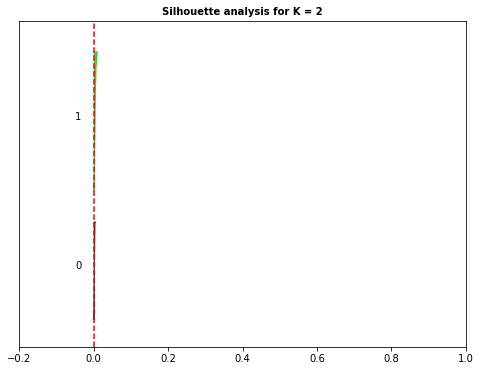

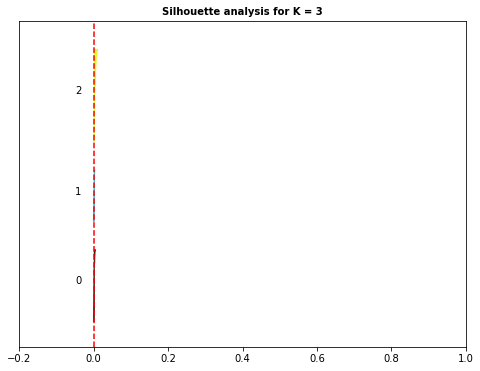

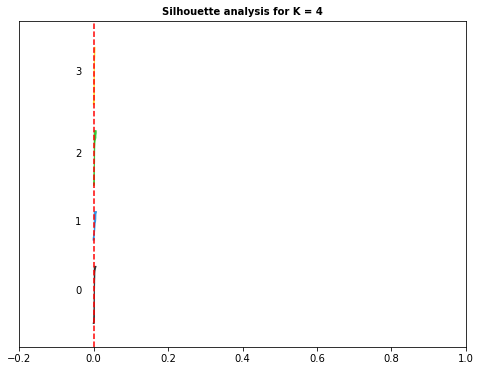

In [57]:
silhouette(kmeans_results, final_df, plot=True)

In [58]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

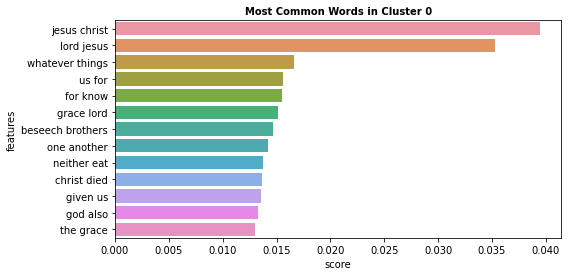

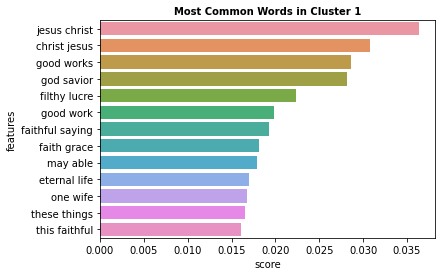

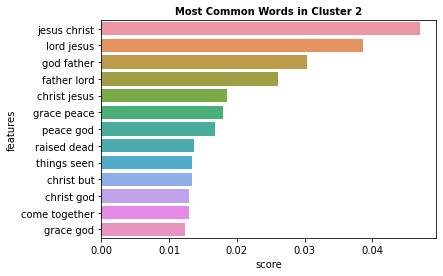

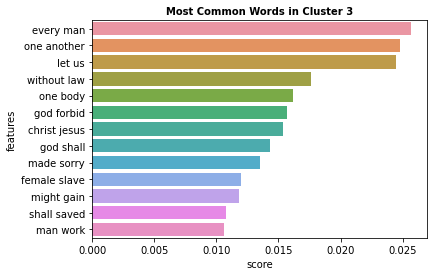

In [59]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [60]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

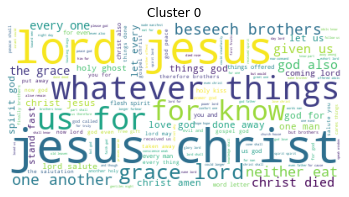

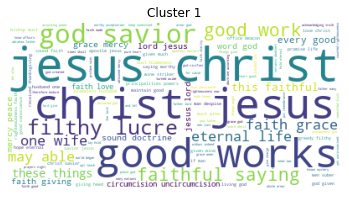

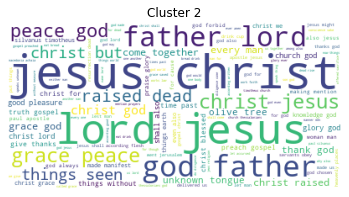

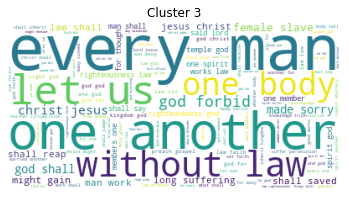

In [61]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [22]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Romanos_1,"'paul', ',', 'servant', 'jesus', 'christ', ','...",2
101,Romanos_2,"'therefore', 'inexcusable', ',', 'man', ',', '...",2
102,Romanos_3,"'advantage', 'jew', '?', 'profit', 'circumcisi...",1
103,Romanos_4,"'shall', 'say', 'abraham', 'father', ',', 'per...",3
104,Romanos_5,"'therefore', 'justified', 'faith', ',', 'peace...",0


In [23]:
print(df)

            Autor                                              Livro  label
100     Romanos_1  'paul', ',', 'servant', 'jesus', 'christ', ','...      2
101     Romanos_2  'therefore', 'inexcusable', ',', 'man', ',', '...      2
102     Romanos_3  'advantage', 'jew', '?', 'profit', 'circumcisi...      1
103     Romanos_4  'shall', 'say', 'abraham', 'father', ',', 'per...      3
104     Romanos_5  'therefore', 'justified', 'faith', ',', 'peace...      0
..            ...                                                ...    ...
181  II_Timoteo_3  'know', 'also', ',', 'last', 'days', 'perilous...      3
182  II_Timoteo_4  'charge', 'therefore', 'god', ',', 'lord', 'je...      1
183        Tito_1  'paul', ',', 'servant', 'god', ',', 'apostle',...      2
184        Tito_2  'speak', 'things', 'become', 'sound', 'doctrin...      1
185        Tito_3  'put', 'mind', 'subject', 'principalities', 'p...      1

[86 rows x 3 columns]
